# Exploring parameters

#### density plots, post predictive checks etc.

In [1]:
%load_ext autoreload
%autoreload 2
import os.path as op
import tempfile

import matplotlib.pyplot as plt


import hnn_core
from hnn_core import simulate_dipole, jones_2009_model
from hnn_core.viz import plot_dipole


import sys
sys.path.append('../code/')
#sys.path.append('../code/utils/')
#sys.path.append('../code/sbi/')
#sys.path.append('../../results_cluster/')


import numpy as np
import torch

# visualization
import matplotlib as mpl
import matplotlib.pyplot as plt


import os

#work_dir = '/home/ubuntu/sbi_for_eeg_data/code/'

#os.chdir(work_dir)

#from utils.plot import cov, compare_vars, plot_varchanges
#from utils.plot import compare_KLs, plot_KLs
#from sbi.inference import potentials
import utils.sbi_modulated_functions

# sbi
from sbi import utils as utils
from sbi import analysis as analysis
from sbi.inference.base import infer
from sbi.inference import SNPE, prepare_for_sbi, simulate_for_sbi

from sbi.analysis import conditional_pairplot, conditional_corrcoeff



# import the summary statistics that you want to investigate
from summary_features.calculate_summary_features import calculate_summary_statistics_alternative as alternative_sumstats
from summary_features.calculate_summary_features import calculate_summary_stats_temporal as temporal_sumstats
from summary_features.calculate_summary_features import calculate_summary_stats_number as number_sumstats
from summary_features.calculate_summary_features import calculate_summary_stats_temporal


In [2]:
print(torch.__version__)

1.9.1+cu102


In [3]:
## defining neuronal network model
num_params = 17
from utils.simulation_wrapper import set_network_default, SimulationWrapper
sim_wrapper = SimulationWrapper(num_params)


In [4]:
window_len = 30

if num_params == 25:
    prior_min = [0, 0, 0, 0, 0, 0, 0, 0, 13.3,    # prox1 weights
                 0, 0, 0, 0, 0, 0, 51.980,            # distal weights
                 0, 0, 0, 0, 0, 0, 0, 0, 112.13]       # prox2 weights


    # ampa, nmda [0.927, 0.160, 2.093, 0.0519,        1.0, 1.0, 1.0, 1.0, 35.9,
    #           0.0394, 0.000042, 0.039372,           0.854, 0.117,  0.480, 75.08,
    #            0.000018, 8.633, 0.05375, 4.104,     1.0, 1.0, 1.0, 1.0, 162.110]

    prior_max = [0.927, 1.0, 0.160, 1.0,  2.093, 1.0, 0.0519, 1.0, 35.9,
                 0.0394, 0.117, 0.000042, 0.025902, 0.854, 0.480, 75.08,
                 0.000018, 1.0, 8.633, 1.0, 0.05375, 1.0, 4.104,  1.0, 162.110]

    true_params = torch.tensor([[0.277, 0.3739, 0.0399, 0.0, 0.6244, 0.3739, 0.034, 0.0, 18.977,
                                 0.011467, 0.06337, 0.000012, 0.013407, 0.466095, 0.0767, 63.08,
                                 0.000005, 0.116706, 4.6729, 0.016733, 0.011468, 0.061556, 2.33, 0.0679, 120.86]])
    
if num_params == 17:
    
    prior_min = [0, 0, 0, 0, 0, 13.3,  0, 0, 0, 0, 0, 51.980, 0, 0, 0, 0, 112.13]
    prior_max = [0.927, 0.160, 2.093, 1.0, 1.0, 35.9, 0.000042, 0.039372, 0.025902,  0.480, 0.117, 75.08, 8.633, 4.104, 1.0, 1.0, 162.110]

    true_params = torch.tensor([[0.277, 0.0399, 0.6244, 0.3739, 0.0, 18.977, 0.000012, 0.0115, 0.0134,  0.0767, 0.06337, 63.08, 4.6729, 2.33, 0.016733, 0.0679, 120.86]])


prior = utils.torchutils.BoxUniform(low=prior_min, high=prior_max)

#number_simulations = 10
density_estimator = 'nsf'


In [5]:

#assert (prior.event_shape==torch.Size([25]))
from utils import inference

In [6]:
from utils import inference

import pickle
from data_load_writer import *
from data_load_writer import load_from_file as lf

import os

work_dir = '/home/ubuntu/'

os.chdir(work_dir)



import os

print(os.getcwd())

#os.chdir('/home/kathi/Documents/Master_thesis/results_cluster/')



#print(os.getcwd())

#os.chdir('/home/kathi/Documents/Master_thesis/results_cluster')

## loading simulations from previously saved computations
#file = 'ERP_sequential_3params/step3'
#file = 'ERP_save_sim_nsf_num_params3'
#file = 'eval_features'
#file = '10000_multi_round_num_params_25newparams'

file = '10000_sims_17_fake_obs_calc_temporal'


print(os.getcwd())

os.chdir('results')


print(os.getcwd())
  

thetas = torch.load('{}/thetas.pt'.format(file))

posterior = torch.load('{}/posterior.pt'.format(file))

#neural_dens = torch.load('{}/neural_dens.pt'.format(file))
x_without = torch.load('{}/obs_without.pt'.format(file))

x = calculate_summary_stats_temporal(x_without)


#true_params = torch.tensor([[0.0274, 19.01, 0.1369, 61.89, 0.1435, 120.86]])
#true_params = torch.tensor([[  18.9700, 63.5300, 137.1200]])
#true_params = torch.load('results/{}/true_params.pt'.format(file))
#true_params = torch.tensor([[0.277, 0.0399, 0.3739, 0.034, 18.977, 0.0115, 0.000012, 0.466, 0.06337, 0.0134, 0.0766, 63.08, 0.000005, 4.6729, 0.0115, 0.3308, 120.86]])

#obs_real = torch.load('{}/obs_real.pt'.format(file))

/home/ubuntu
/home/ubuntu
/home/ubuntu/results
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size(

batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch sh

batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch sh

batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch sh

batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch sh

batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch sh

batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch sh

batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch sh

batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch sh

batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch sh

batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch sh

batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch sh

batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch sh

batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch sh

batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch sh

batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch sh

batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch sh

batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch sh

batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch sh

batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch sh

batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch sh

batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch sh

batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch sh

batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch sh

batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch sh

batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch sh

batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch sh

batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch sh

batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch sh

batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch sh

batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch sh

batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch sh

batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch sh

batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch sh

batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch sh

batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch sh

batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch sh

batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch sh

batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch sh

batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch sh

batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch sh

batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch sh

batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch sh

batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch sh

batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch sh

batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch sh

batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch sh

batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch sh

batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch sh

batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch sh

batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch sh

batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch sh

batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch sh

batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch sh

batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch sh

batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch sh

batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch sh

batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch sh

batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch sh

batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch sh

batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch sh

batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch sh

batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch sh

batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch sh

batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch sh

batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch sh

batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch sh

batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch sh

batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch sh

## Inference step:

In [7]:
density_estimator = 'nsf'

obs_real_stat = posterior.default_x

#inf = SNPE(prior=prior, density_estimator = density_estimator)

#inf = SNPE_C(prior, density_estimator="nsf")

#inf = inf.append_simulations(thetas, x)

#density_estimator = inf.train()

#posterior = inf.build_posterior(neural_dens)


#true_params = torch.tensor([[26.61, 63.53,  137.12]])

## Simulation under 'true parameters'

In [8]:
#obs_real = inference.run_only_sim(true_params, simulation_wrapper = sim_wrapper)
#obs_real = torch.load('{}/obs_real.pt'.format(file))

#obs_real_stat = obs_real

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
early stop 200.0
param size  17
joblib will run over 1 jobs
Loading custom mechanism files from /home/ubuntu/miniconda3/envs/sbi_env/lib/python3.7/site-packages/hnn_core/mod/x86_64/.libs/libnrnmech.so
Building the NEURON model
[Done]
running trial 1 on 1 cores
Simulation time: 0.03 ms...
Simulation time: 10.0 ms...
Simulation time: 20.0 ms...
Simulation time: 30.0 ms...
Simulation time: 40.0 ms...
Simulation time: 50.0 ms...
Simulation time: 60.0 ms...
Simulation time: 70.0 ms...
Simulation time: 80.0 ms...
Simulation time: 90.0 ms...
Simulation time: 100.0 ms...
Simulation time: 110.0 ms...
Simulation time: 120.0 ms...
Simulation time: 130.0 ms...
Simulation time: 140.0 ms...
Simulation time: 150.0 ms...
Simulation time: 160.0 ms...
Simulation time: 170.0 ms...
Simulation time: 180.0 ms...
Simulation time: 190.0 ms...
obs [-0.58830266 -0.4901258  -0.45094053 ... 11.01389494 10.97281975
 10.88582174]
[Para

In [49]:
#obs_real_stat = calculate_summary_stats_temporal(obs_real[0])

samples = posterior.sample((10000,), x=obs_real_stat)

Drawing 10000 posterior samples:   0%|          | 0/10000 [00:00<?, ?it/s]

In [50]:
parameter_names = ["prox1_ampa_l2_bas","prox1_ampa_l2_pyr","prox1_ampa_l5_bas","prox1_nmda_l5_bas", "prox1_nmda_l5_pyr",
 "t_prox1",
 "dist_ampa_l2_pyr","dist_ampa_l2_bas","dist_nmda_l2_pyr",
 "dist_nmda_l5_pyr","dist_nmda_l2_bas",
 "t_dist", 
 "prox2_ampa_l2_pyr","prox2_ampa_l5_pyr","prox2_nmda_l2_pyr","prox2_nmda_l5_pyr",
 "t_prox2"]

In [51]:
##better limits:

list_min = torch.min(samples, 0)[0]
list_max = torch.max(samples, 0)[0]

print(list_min)

print(list_max)

diff = torch.abs(list_max - list_min) * 0.1

print(diff)

list_min = list(list_min + diff)
list_max = list(list_max - diff)

limits = [list(tup) for tup in zip(list_min, list_max)]

tensor([ 9.7128e-03,  1.0165e-02, -7.3568e-01,  8.0141e-02, -1.5829e-03,
         2.4138e+01, -1.7880e-05, -2.5836e-03,  8.3594e-03,  4.8837e-02,
        -6.1026e-03,  6.1171e+01, -2.3056e+00, -5.2188e-02, -3.6569e-03,
        -4.6237e-03,  1.1581e+02])
tensor([4.2129e-01, 6.6112e-02, 1.8832e+00, 8.0125e-01, 1.3803e-02, 2.4401e+01,
        5.7261e-05, 4.1318e-02, 2.9285e-02, 1.5031e-01, 1.6983e-01, 6.2402e+01,
        9.4251e+00, 4.2024e+00, 1.1622e+00, 7.3280e-01, 1.3362e+02])
tensor([4.1158e-02, 5.5947e-03, 2.6188e-01, 7.2111e-02, 1.5386e-03, 2.6287e-02,
        7.5142e-06, 4.3901e-03, 2.0926e-03, 1.0147e-02, 1.7593e-02, 1.2314e-01,
        1.1731e+00, 4.2545e-01, 1.1659e-01, 7.3742e-02, 1.7810e+00])


In [12]:
limits = [list(tup) for tup in zip(prior_min, prior_max)]

In [30]:
print(true_params)

tensor([[2.7700e-01, 3.9900e-02, 6.2440e-01, 3.7390e-01, 0.0000e+00, 1.8977e+01,
         1.2000e-05, 1.1500e-02, 1.3400e-02, 7.6700e-02, 6.3370e-02, 6.3080e+01,
         4.6729e+00, 2.3300e+00, 1.6733e-02, 6.7900e-02, 1.2086e+02]])


<Figure size 432x288 with 0 Axes>

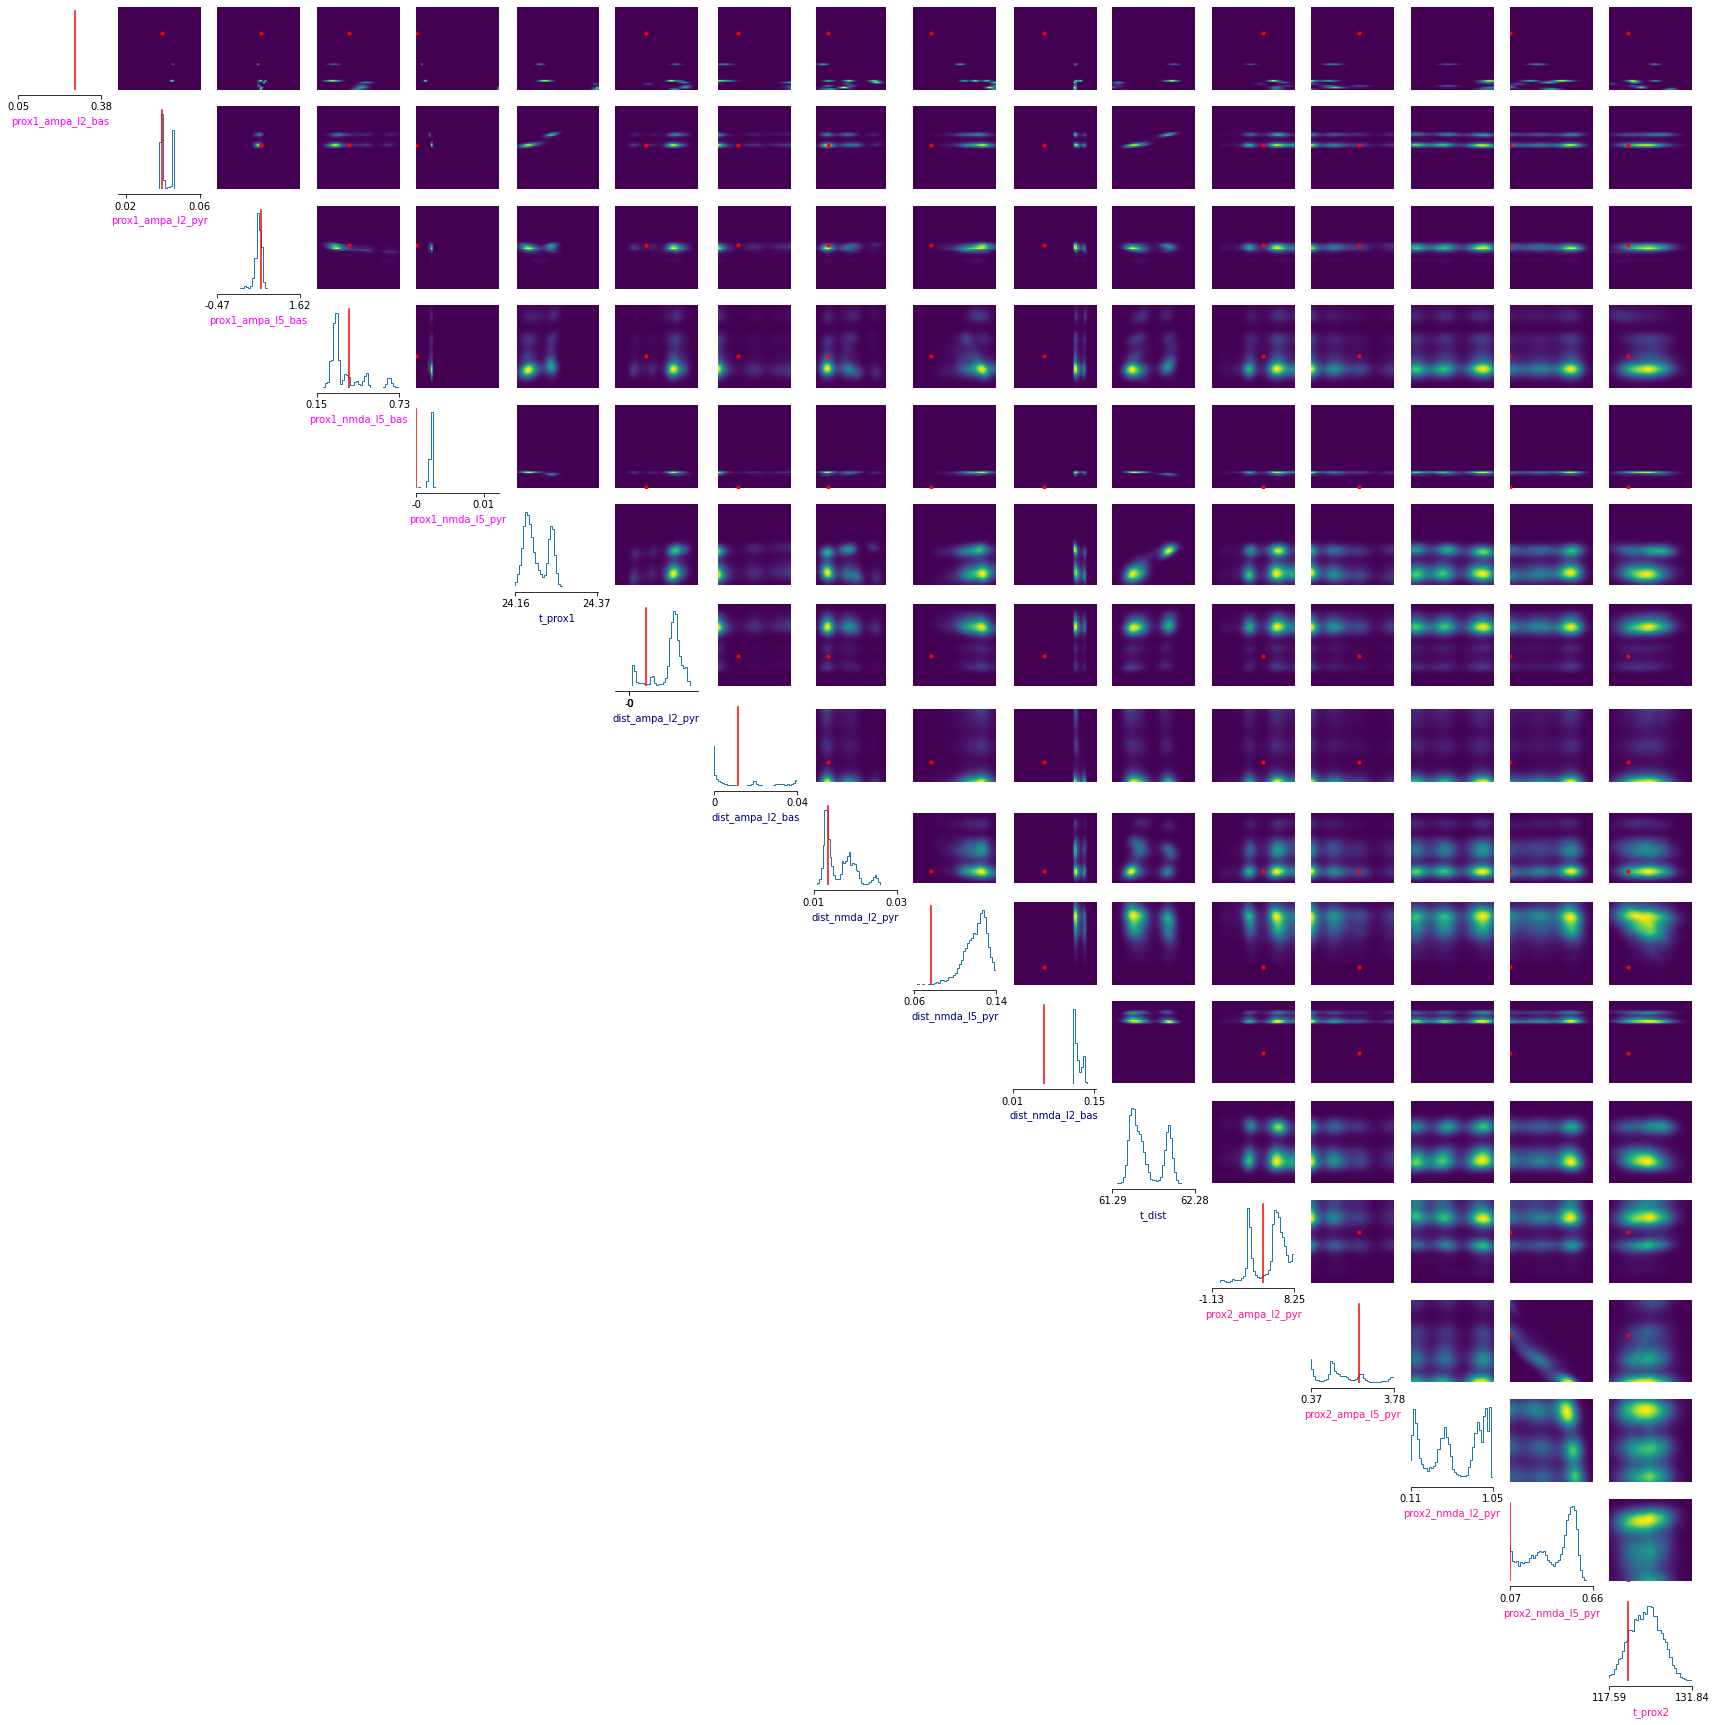

In [54]:
#limits = [list(tup) for tup in zip(prior_min, prior_max)]


plt.set_cmap('viridis')

fig, axes = analysis.pairplot(
    samples,
    limits=limits,
    upper = 'kde',
    ticks=np.round(limits,2),
    figsize=(30, 30),
    points=true_params,
    points_offdiag={"markersize": 6},
    points_colors="r",
    labels=parameter_names,
)

for i in range(5):
    axes[i][i].xaxis.label.set_color('magenta')
for i in range(5, 12):
    axes[i][i].xaxis.label.set_color('navy')
for i in range(12, 17):
    axes[i][i].xaxis.label.set_color('deeppink')

In [43]:
posterior.set_default_x(obs_real_stat)
condition = posterior.sample((1,))

Drawing 1 posterior samples:   0%|          | 0/1 [00:00<?, ?it/s]

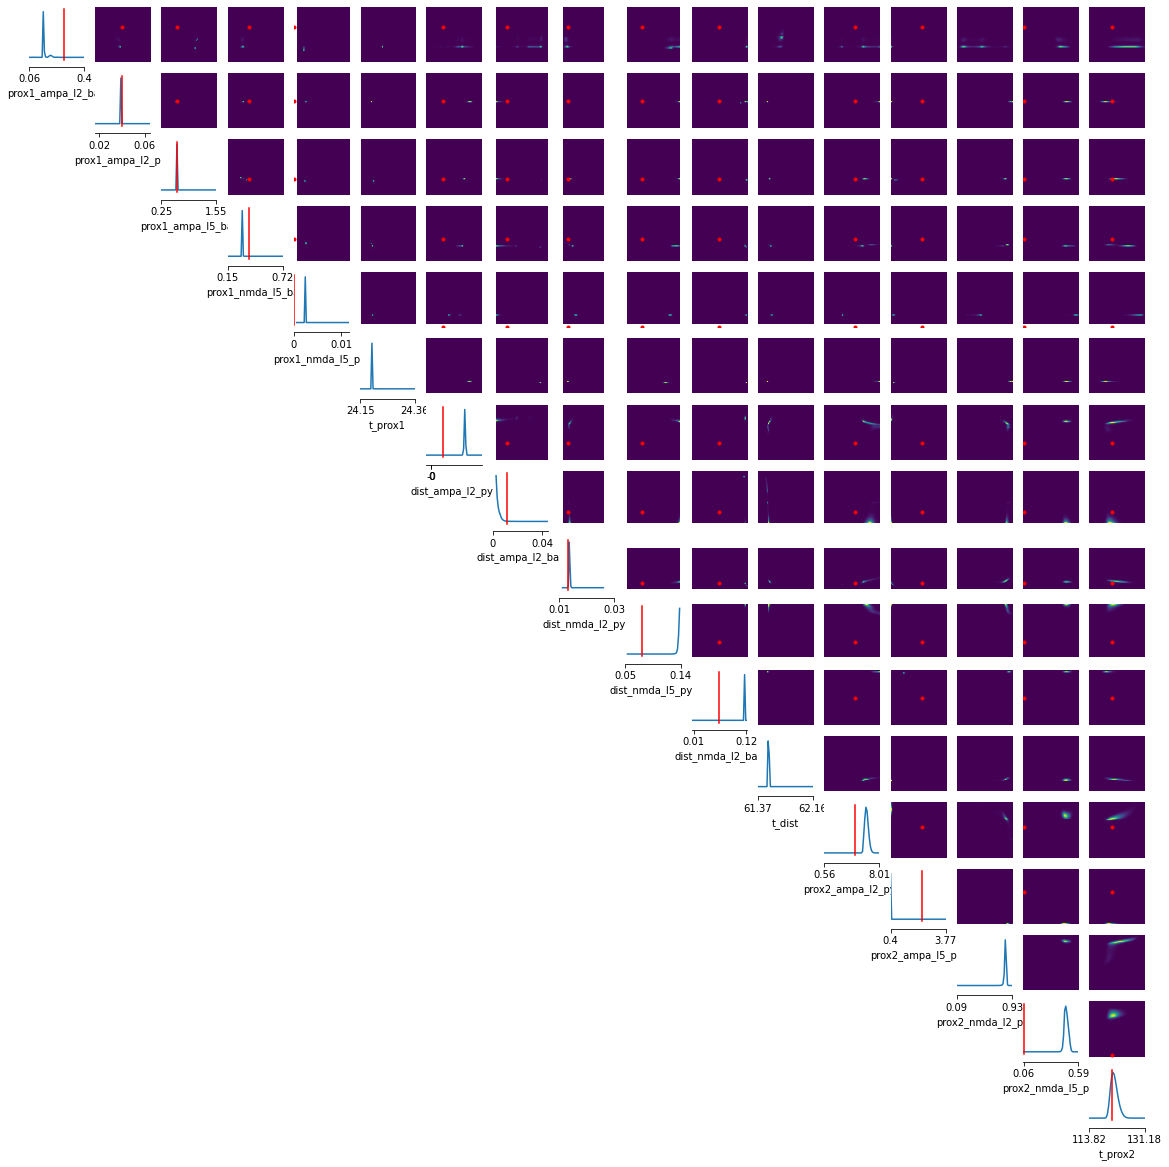

In [60]:
_ = analysis.conditional_pairplot(
    density=posterior,
    condition=condition,
    limits=limits,
    upper = 'kde',
    figsize=(20, 20),
    points=true_params,
    points_offdiag={"markersize": 6},
    points_colors="r",
    labels=parameter_names,
    ticks=np.round(limits,2),
    #color_map = ['Blues', 'Reds'],
    #alpha1 = 0.8,
    #alpha2 = 0.4
 
)


In [61]:
samples = posterior.sample((100,), x=obs_real_stat)

Drawing 100 posterior samples:   0%|          | 0/100 [00:00<?, ?it/s]

In [62]:
s_x = inference.run_only_sim(samples, simulation_wrapper=sim_wrapper, num_workers=8)

early stopearly stop  early stopearly stop200.0 
early stop200.0
 param size  17
200.0param size  
early stop200.0param size 200.0early stop
param size    17
17
 200.0early stop 
param size  17
200.0param size  
200.0

 param size 17
param size  17 
1717

joblib will run over 1 jobs
joblib will run over 1 jobsjoblib will run over 1 jobs

joblib will run over 1 jobsjoblib will run over 1 jobsjoblib will run over 1 jobs


joblib will run over 1 jobs
joblib will run over 1 jobs
[Parallel(n_jobs=8)]: Using backend MultiprocessingBackend with 8 concurrent workers.
Building the NEURON model
Building the NEURON model
Building the NEURON model
Building the NEURON modelBuilding the NEURON model

Building the NEURON model
Building the NEURON modelBuilding the NEURON model

[Done][Done]

running trial 1 on 1 cores
running trial 1 on 1 cores
[Done]Simulation time: 0.03 ms...

running trial 1 on 1 cores
Simulation time: 0.03 ms...
Simulation time: 0.03 ms...
[Done]
running trial 1 on 1 cores
Simula

Simulation time: 10.0 ms...
[Done]
running trial 1 on 1 coresSimulation time: 30.0 ms...

Simulation time: 0.03 ms...
Simulation time: 10.0 ms...
Simulation time: 40.0 ms...
Simulation time: 30.0 ms...
Simulation time: 20.0 ms...
Simulation time: 20.0 ms...
Simulation time: 40.0 ms...
Simulation time: 20.0 ms...
Simulation time: 50.0 ms...
Simulation time: 10.0 ms...
Simulation time: 40.0 ms...
Simulation time: 40.0 ms...
Simulation time: 30.0 ms...
Simulation time: 30.0 ms...
Simulation time: 60.0 ms...
Simulation time: 50.0 ms...
Simulation time: 20.0 ms...
Simulation time: 30.0 ms...
Simulation time: 50.0 ms...
Simulation time: 50.0 ms...
Simulation time: 40.0 ms...
Simulation time: 40.0 ms...
Simulation time: 70.0 ms...
Simulation time: 60.0 ms...
Simulation time: 30.0 ms...
Simulation time: 40.0 ms...
Simulation time: 60.0 ms...
Simulation time: 60.0 ms...
Simulation time: 50.0 ms...
Simulation time: 50.0 ms...
Simulation time: 80.0 ms...
Simulation time: 70.0 ms...
Simulation tim

Simulation time: 70.0 ms...
Simulation time: 70.0 ms...
Simulation time: 100.0 ms...
Simulation time: 70.0 ms...
Simulation time: 120.0 ms...
Simulation time: 80.0 ms...
Simulation time: 80.0 ms...
Simulation time: 120.0 ms...
Simulation time: 80.0 ms...
Simulation time: 80.0 ms...
Simulation time: 110.0 ms...
Simulation time: 80.0 ms...
Simulation time: 90.0 ms...
Simulation time: 130.0 ms...
Simulation time: 90.0 ms...
Simulation time: 130.0 ms...
Simulation time: 90.0 ms...
Simulation time: 90.0 ms...
Simulation time: 120.0 ms...
Simulation time: 100.0 ms...
Simulation time: 90.0 ms...
Simulation time: 140.0 ms...
Simulation time: 100.0 ms...
Simulation time: 100.0 ms...
Simulation time: 140.0 ms...
Simulation time: 130.0 ms...
Simulation time: 100.0 ms...
Simulation time: 100.0 ms...
Simulation time: 110.0 ms...
Simulation time: 150.0 ms...
Simulation time: 110.0 ms...
Simulation time: 110.0 ms...
Simulation time: 140.0 ms...
Simulation time: 150.0 ms...
Simulation time: 110.0 ms..

Simulation time: 150.0 ms...
Simulation time: 160.0 ms...
obs [-0.42721065 -0.51640758 -0.47251447 ... 28.20855519 28.14685962
 28.03183034]
early stop 200.0
param size  17
Simulation time: 120.0 ms...
joblib will run over 1 jobs
[Parallel(n_jobs=8)]: Done  25 tasks      | elapsed:  7.6min
Simulation time: 150.0 ms...
Simulation time: 170.0 ms...
Building the NEURON model
Simulation time: 130.0 ms...
Simulation time: 150.0 ms...
Simulation time: 160.0 ms...
Simulation time: 170.0 ms...
Simulation time: 160.0 ms...
Simulation time: 130.0 ms...
Simulation time: 180.0 ms...
Simulation time: 160.0 ms...
Simulation time: 140.0 ms...
Simulation time: 170.0 ms...
Simulation time: 180.0 ms...
Simulation time: 170.0 ms...
Simulation time: 140.0 ms...
[Done]
running trial 1 on 1 cores
Simulation time: 170.0 ms...
Simulation time: 0.03 ms...
Simulation time: 190.0 ms...
Simulation time: 150.0 ms...
Simulation time: 180.0 ms...
Simulation time: 190.0 ms...
Simulation time: 150.0 ms...
Simulation t

running trial 1 on 1 cores
Simulation time: 0.03 ms...
obs [-0.49683295 -0.4534815  -0.84681805 ... 24.4951491  24.37292803
 24.25357246]
early stop 200.0
param size  17
joblib will run over 1 jobs
[Parallel(n_jobs=8)]: Done  36 tasks      | elapsed: 10.0min
Building the NEURON model
Simulation time: 180.0 ms...
Simulation time: 180.0 ms...
Simulation time: 160.0 ms...
Simulation time: 190.0 ms...
Simulation time: 10.0 ms...
[Done]
running trial 1 on 1 cores
Simulation time: 0.03 ms...
[Done]
running trial 1 on 1 cores
Simulation time: 190.0 ms...
Simulation time: 0.03 ms...
obs [-0.49683295 -0.4534815  -0.84681805 ... 29.9032701  29.75655693
 29.61274723]
early stop 200.0
param size  17
joblib will run over 1 jobs
[Parallel(n_jobs=8)]: Done  37 tasks      | elapsed: 10.1min
Simulation time: 190.0 ms...
Simulation time: 170.0 ms...
Simulation time: 20.0 ms...
Building the NEURON model
[Done]
running trial 1 on 1 cores
Simulation time: 0.03 ms...
Simulation time: 10.0 ms...
obs [-0.4968

Simulation time: 190.0 ms...
[Done]
running trial 1 on 1 cores
Simulation time: 0.03 ms...
Building the NEURON model
Simulation time: 10.0 ms...
Simulation time: 30.0 ms...
Simulation time: 20.0 ms...
Simulation time: 30.0 ms...
[Done]
running trial 1 on 1 cores
Simulation time: 0.03 ms...
obs [-0.75566943 -0.75820701 -0.44281736 ... 29.14526288 29.17795399
 28.98915099]
early stop 200.0
param size  17
joblib will run over 1 jobs
Simulation time: 10.0 ms...
[Parallel(n_jobs=8)]: Done  48 tasks      | elapsed: 12.4min
Simulation time: 20.0 ms...
Building the NEURON model
Simulation time: 40.0 ms...
Simulation time: 30.0 ms...
Simulation time: 40.0 ms...
[Done]
running trial 1 on 1 cores
Simulation time: 0.03 ms...
Simulation time: 10.0 ms...
Simulation time: 20.0 ms...
Simulation time: 30.0 ms...
Simulation time: 50.0 ms...
Simulation time: 40.0 ms...
[Done]
running trial 1 on 1 cores
Simulation time: 0.03 ms...
Simulation time: 50.0 ms...
Simulation time: 30.0 ms...
Simulation time: 40

Simulation time: 60.0 ms...
Simulation time: 80.0 ms...
Simulation time: 30.0 ms...
Simulation time: 40.0 ms...
Simulation time: 70.0 ms...
Simulation time: 90.0 ms...
Simulation time: 50.0 ms...
Simulation time: 60.0 ms...
Simulation time: 70.0 ms...
Simulation time: 90.0 ms...
Simulation time: 50.0 ms...
Simulation time: 40.0 ms...
Simulation time: 80.0 ms...
Simulation time: 60.0 ms...
Simulation time: 100.0 ms...
Simulation time: 70.0 ms...
Simulation time: 100.0 ms...
Simulation time: 80.0 ms...
Simulation time: 60.0 ms...
Simulation time: 50.0 ms...
Simulation time: 90.0 ms...
Simulation time: 70.0 ms...
Simulation time: 110.0 ms...
Simulation time: 80.0 ms...
Simulation time: 110.0 ms...
Simulation time: 70.0 ms...
Simulation time: 90.0 ms...
Simulation time: 60.0 ms...
Simulation time: 100.0 ms...
Simulation time: 80.0 ms...
Simulation time: 120.0 ms...
Simulation time: 90.0 ms...
Simulation time: 120.0 ms...
Simulation time: 80.0 ms...
Simulation time: 70.0 ms...
Simulation ti

Simulation time: 100.0 ms...
Simulation time: 100.0 ms...
Simulation time: 150.0 ms...
Simulation time: 170.0 ms...
Simulation time: 120.0 ms...
Simulation time: 110.0 ms...
Simulation time: 140.0 ms...
Simulation time: 120.0 ms...
Simulation time: 110.0 ms...
Simulation time: 110.0 ms...
Simulation time: 160.0 ms...
Simulation time: 180.0 ms...
Simulation time: 130.0 ms...
Simulation time: 120.0 ms...
Simulation time: 150.0 ms...
Simulation time: 120.0 ms...
Simulation time: 130.0 ms...
Simulation time: 120.0 ms...
Simulation time: 170.0 ms...
Simulation time: 190.0 ms...
Simulation time: 140.0 ms...
Simulation time: 130.0 ms...
Simulation time: 130.0 ms...
Simulation time: 160.0 ms...
Simulation time: 140.0 ms...
Simulation time: 180.0 ms...
obs [-0.54377386 -0.56940409 -0.49951131 ... 27.32362997 27.15065948
 26.99917781]
early stop 200.0
param size  17
joblib will run over 1 jobs
[Parallel(n_jobs=8)]: Done  65 tasks      | elapsed: 17.8min
Simulation time: 130.0 ms...
Building the 

Simulation time: 0.03 ms...
Simulation time: 170.0 ms...
Simulation time: 130.0 ms...
Simulation time: 160.0 ms...
Simulation time: 180.0 ms...
[Done]
running trial 1 on 1 cores
Simulation time: 0.03 ms...
Simulation time: 160.0 ms...
Simulation time: 10.0 ms...
Simulation time: 160.0 ms...
Simulation time: 180.0 ms...
Simulation time: 140.0 ms...
Simulation time: 170.0 ms...
Simulation time: 190.0 ms...
Simulation time: 10.0 ms...
Simulation time: 20.0 ms...
Simulation time: 170.0 ms...
Simulation time: 170.0 ms...
Simulation time: 190.0 ms...
Simulation time: 150.0 ms...
Simulation time: 20.0 ms...
Simulation time: 180.0 ms...
obs [-0.58438416 -0.56796011 -0.7102222  ... 23.74509244 23.79895631
 23.46632993]
early stop 200.0
param size  17
joblib will run over 1 jobs
[Parallel(n_jobs=8)]: Done  75 tasks      | elapsed: 20.3min
Simulation time: 30.0 ms...
Building the NEURON model
Simulation time: 180.0 ms...
Simulation time: 180.0 ms...
obs [-0.58438416 -0.56796011 -0.7102222  ... 17

joblib will run over 1 jobs
[Parallel(n_jobs=8)]: Done  85 tasks      | elapsed: 22.5min
Building the NEURON model
[Done]
running trial 1 on 1 cores
Simulation time: 10.0 ms...
Simulation time: 0.03 ms...
Simulation time: 170.0 ms...
obs [-0.55091227 -0.81592502 -0.70652513 ... 25.29954985 25.29715901
 25.22439099]
early stop 200.0
param size  17
joblib will run over 1 jobs
[Parallel(n_jobs=8)]: Done  86 tasks      | elapsed: 22.5min
Building the NEURON model
Simulation time: 40.0 ms...
Simulation time: 190.0 ms...
Simulation time: 50.0 ms...
Simulation time: 10.0 ms...
Simulation time: 20.0 ms...
Simulation time: 180.0 ms...
[Done]
running trial 1 on 1 cores
Simulation time: 50.0 ms...
Simulation time: 0.03 ms...
obs [-0.55091227 -0.81592502 -0.70652513 ... 24.95036657 24.95103445
 24.88126136]
early stop 200.0
param size  17
joblib will run over 1 jobs
[Parallel(n_jobs=8)]: Done  87 tasks      | elapsed: 22.7min
Simulation time: 60.0 ms...
Building the NEURON model
Simulation time: 1

Simulation time: 140.0 ms...
Simulation time: 140.0 ms...
Simulation time: 100.0 ms...
Simulation time: 100.0 ms...
Simulation time: 150.0 ms...
Simulation time: 150.0 ms...
Simulation time: 110.0 ms...
Simulation time: 160.0 ms...
Simulation time: 110.0 ms...
Simulation time: 160.0 ms...
Simulation time: 120.0 ms...
Simulation time: 170.0 ms...
Simulation time: 120.0 ms...
Simulation time: 170.0 ms...
Simulation time: 130.0 ms...
Simulation time: 180.0 ms...
Simulation time: 130.0 ms...
Simulation time: 180.0 ms...
Simulation time: 190.0 ms...
Simulation time: 140.0 ms...
Simulation time: 140.0 ms...
obs [-0.35169848 -0.50857273 -0.61464895 ... 28.85718713 28.8024629
 28.73898664]
Simulation time: 190.0 ms...
[Parallel(n_jobs=8)]: Done  97 out of 100 | elapsed: 25.7min remaining:   47.6s
Simulation time: 150.0 ms...
Simulation time: 150.0 ms...
Simulation time: 160.0 ms...
obs [-0.35169848 -0.50857273 -0.61464895 ... 28.4878159  28.44139418
 28.38615873]
Simulation time: 160.0 ms...
S

In [63]:
### sample from prior now
num_samples = 100
samples_prior = []


for i in range(num_samples):
    sample = prior.sample()
    samples_prior.append(sample)
    

In [64]:
s_x_prior = inference.run_only_sim(samples_prior, sim_wrapper, num_workers=8)

early stop 200.0early stop
 early stop200.0 early stopparam size early stop 200.0200.0
 early stopearly stop

 param size 200.0 early stop200.017param size param size 

 
 param size  param size 200.0 
 171717param size 


17
   17200.0
17

param size  17
joblib will run over 1 jobs
joblib will run over 1 jobsjoblib will run over 1 jobsjoblib will run over 1 jobs


joblib will run over 1 jobs
joblib will run over 1 jobsjoblib will run over 1 jobs
joblib will run over 1 jobs

[Parallel(n_jobs=8)]: Using backend MultiprocessingBackend with 8 concurrent workers.
Building the NEURON modelBuilding the NEURON model
Building the NEURON model
Building the NEURON model
Building the NEURON modelBuilding the NEURON model

Building the NEURON model
Building the NEURON model

[Done]
running trial 1 on 1 cores
[Done]
running trial 1 on 1 cores
[Done]
running trial 1 on 1 cores
Simulation time: 0.03 ms...
[Done]
running trial 1 on 1 coresSimulation time: 0.03 ms...

Simulation time: 0.03 ms...
Simula

Simulation time: 10.0 ms...
Simulation time: 10.0 ms...
Simulation time: 40.0 ms...
Simulation time: 30.0 ms...
Simulation time: 10.0 ms...
Simulation time: 20.0 ms...
Simulation time: 10.0 ms...
Simulation time: 30.0 ms...
Simulation time: 20.0 ms...
Simulation time: 50.0 ms...
Simulation time: 20.0 ms...
Simulation time: 20.0 ms...
Simulation time: 40.0 ms...
Simulation time: 20.0 ms...
Simulation time: 30.0 ms...
Simulation time: 40.0 ms...
Simulation time: 30.0 ms...
Simulation time: 60.0 ms...
Simulation time: 30.0 ms...
Simulation time: 30.0 ms...
Simulation time: 50.0 ms...
Simulation time: 50.0 ms...
Simulation time: 30.0 ms...
Simulation time: 40.0 ms...
Simulation time: 70.0 ms...
Simulation time: 40.0 ms...
Simulation time: 40.0 ms...
Simulation time: 40.0 ms...
Simulation time: 60.0 ms...
Simulation time: 60.0 ms...
Simulation time: 50.0 ms...
Simulation time: 40.0 ms...
Simulation time: 80.0 ms...
Simulation time: 50.0 ms...
Simulation time: 50.0 ms...
Simulation time: 50.

Simulation time: 70.0 ms...
Simulation time: 90.0 ms...
Simulation time: 90.0 ms...
Simulation time: 110.0 ms...
Simulation time: 120.0 ms...
Simulation time: 70.0 ms...
Simulation time: 70.0 ms...
Simulation time: 80.0 ms...
Simulation time: 100.0 ms...
Simulation time: 80.0 ms...
Simulation time: 100.0 ms...
Simulation time: 120.0 ms...
Simulation time: 130.0 ms...
Simulation time: 80.0 ms...
Simulation time: 90.0 ms...
Simulation time: 80.0 ms...
Simulation time: 110.0 ms...
Simulation time: 110.0 ms...
Simulation time: 130.0 ms...
Simulation time: 90.0 ms...
Simulation time: 140.0 ms...
Simulation time: 90.0 ms...
Simulation time: 100.0 ms...
Simulation time: 90.0 ms...
Simulation time: 120.0 ms...
Simulation time: 120.0 ms...
Simulation time: 140.0 ms...
Simulation time: 100.0 ms...
Simulation time: 150.0 ms...
Simulation time: 100.0 ms...
Simulation time: 110.0 ms...
Simulation time: 130.0 ms...
Simulation time: 100.0 ms...Simulation time: 130.0 ms...

Simulation time: 150.0 ms..

Simulation time: 120.0 ms...
Simulation time: 140.0 ms...
obs [-0.4079413  -0.49590684 -0.4507308  ... 57.84635362 57.70912416
 57.51846327]
early stop 200.0
param size  17
joblib will run over 1 jobs
[Parallel(n_jobs=8)]: Done  25 tasks      | elapsed:  7.8min
Building the NEURON model
obs [-0.42721065 -0.51640758 -0.47251447 ... 57.49557541 57.34430379
 57.13974517]
early stop 200.0
param size  17
joblib will run over 1 jobs
[Parallel(n_jobs=8)]: Done  26 tasks      | elapsed:  7.8min
Simulation time: 130.0 ms...
Building the NEURON model
Simulation time: 140.0 ms...
Simulation time: 160.0 ms...
Simulation time: 130.0 ms...
Simulation time: 130.0 ms...
Simulation time: 150.0 ms...
Simulation time: 140.0 ms...
Simulation time: 150.0 ms...
Simulation time: 170.0 ms...
Simulation time: 140.0 ms...
Simulation time: 140.0 ms...
[Done]
running trial 1 on 1 cores
Simulation time: 0.03 ms...
Simulation time: 160.0 ms...
[Done]
running trial 1 on 1 cores
Simulation time: 0.03 ms...
Simulation

param size  17
joblib will run over 1 jobs
[Parallel(n_jobs=8)]: Done  35 tasks      | elapsed: 10.3min
Simulation time: 20.0 ms...
Simulation time: 170.0 ms...
Simulation time: 180.0 ms...
Simulation time: 170.0 ms...
Building the NEURON model
Simulation time: 180.0 ms...
Simulation time: 170.0 ms...
Simulation time: 40.0 ms...
Simulation time: 30.0 ms...
Simulation time: 190.0 ms...
Simulation time: 180.0 ms...
Simulation time: 180.0 ms...
Simulation time: 190.0 ms...
Simulation time: 180.0 ms...
Simulation time: 50.0 ms...
Simulation time: 40.0 ms...
[Done]
running trial 1 on 1 cores
Simulation time: 0.03 ms...
obs [-0.49683295 -0.4534815  -0.84681805 ... 36.24681224 36.08737324
 35.9307947 ]
early stop 200.0
param size  17
joblib will run over 1 jobs
[Parallel(n_jobs=8)]: Done  36 tasks      | elapsed: 10.5min
Simulation time: 190.0 ms...
Simulation time: 190.0 ms...
obs [-0.49683295 -0.4534815  -0.84681805 ... 49.75267731 49.5127806
 49.27598532]
early stop 200.0
param size  17
jo

Simulation time: 80.0 ms...
Simulation time: 60.0 ms...
Building the NEURON model
Simulation time: 190.0 ms...
Simulation time: 20.0 ms...
obs [-0.75566943 -0.75820701 -0.44281736 ... 25.60242781 25.63338133
 25.44290478]
early stop 200.0
param size  17
joblib will run over 1 jobs
[Parallel(n_jobs=8)]: Done  47 tasks      | elapsed: 12.7min
Building the NEURON model
Simulation time: 10.0 ms...
obs [-0.75566943 -0.75820701 -0.44281736 ... 47.21250421 47.16387911
 46.89395088]
early stop 200.0
param size  17
joblib will run over 1 jobs
[Parallel(n_jobs=8)]: Done  48 tasks      | elapsed: 12.8min
Simulation time: 90.0 ms...
Building the NEURON model
Simulation time: 70.0 ms...
Simulation time: 30.0 ms...
[Done]
running trial 1 on 1 cores
Simulation time: 0.03 ms...
[Done]
running trial 1 on 1 cores
Simulation time: 0.03 ms...
Simulation time: 20.0 ms...
Simulation time: 40.0 ms...
Simulation time: 100.0 ms...
[Done]
running trial 1 on 1 cores
Simulation time: 80.0 ms...
Simulation time: 0

Simulation time: 70.0 ms...
Simulation time: 30.0 ms...
Simulation time: 60.0 ms...
Simulation time: 10.0 ms...
Simulation time: 20.0 ms...
Simulation time: 120.0 ms...
Simulation time: 40.0 ms...
Simulation time: 120.0 ms...
Simulation time: 40.0 ms...
Simulation time: 80.0 ms...
Simulation time: 70.0 ms...
Simulation time: 20.0 ms...
Simulation time: 30.0 ms...
Simulation time: 130.0 ms...
Simulation time: 50.0 ms...
Simulation time: 130.0 ms...
Simulation time: 50.0 ms...
Simulation time: 90.0 ms...
Simulation time: 80.0 ms...
Simulation time: 30.0 ms...
Simulation time: 140.0 ms...
Simulation time: 40.0 ms...
Simulation time: 60.0 ms...
Simulation time: 140.0 ms...
Simulation time: 60.0 ms...
Simulation time: 100.0 ms...
Simulation time: 90.0 ms...
Simulation time: 40.0 ms...
Simulation time: 150.0 ms...
Simulation time: 50.0 ms...
Simulation time: 150.0 ms...
Simulation time: 70.0 ms...
Simulation time: 70.0 ms...
Simulation time: 110.0 ms...
Simulation time: 160.0 ms...
Simulatio

Simulation time: 110.0 ms...
Simulation time: 90.0 ms...
Simulation time: 140.0 ms...
Simulation time: 70.0 ms...
Simulation time: 80.0 ms...
obs [-0.54377386 -0.56940409 -0.49951131 ... 70.27654569 69.98641379
 69.71774865]
early stop 200.0
param size  17
joblib will run over 1 jobs
[Parallel(n_jobs=8)]: Done  65 tasks      | elapsed: 18.1min
Simulation time: 120.0 ms...
Simulation time: 190.0 ms...
Simulation time: 120.0 ms...
Building the NEURON model
Simulation time: 100.0 ms...
Simulation time: 150.0 ms...
Simulation time: 80.0 ms...
Simulation time: 90.0 ms...
Simulation time: 130.0 ms...
Simulation time: 110.0 ms...
obs [-0.54377386 -0.56940409 -0.49951131 ... 21.29488956 21.13396248
 20.99461137]
early stop 200.0
param size  17
joblib will run over 1 jobs
Simulation time: 130.0 ms...
[Parallel(n_jobs=8)]: Done  66 tasks      | elapsed: 18.2min
Building the NEURON model
Simulation time: 160.0 ms...
[Done]
running trial 1 on 1 cores
Simulation time: 90.0 ms...
Simulation time: 0.

Simulation time: 190.0 ms...
Simulation time: 20.0 ms...
Simulation time: 120.0 ms...Simulation time: 110.0 ms...

Simulation time: 160.0 ms...
Simulation time: 150.0 ms...
Simulation time: 20.0 ms...
Simulation time: 170.0 ms...
obs [-0.5671597  -0.54960899 -0.6907024  ... 53.83831362 53.81154907
 53.39808051]
early stop 200.0
param size  17
joblib will run over 1 jobs
[Parallel(n_jobs=8)]: Done  75 tasks      | elapsed: 20.7min
Simulation time: 130.0 ms...
Simulation time: 120.0 ms...
Simulation time: 30.0 ms...
Building the NEURON model
Simulation time: 170.0 ms...
Simulation time: 160.0 ms...
Simulation time: 30.0 ms...
Simulation time: 40.0 ms...
Simulation time: 180.0 ms...
Simulation time: 140.0 ms...
Simulation time: 130.0 ms...
Simulation time: 180.0 ms...
Simulation time: 170.0 ms...
[Done]
running trial 1 on 1 cores
Simulation time: 0.03 ms...
Simulation time: 40.0 ms...
Simulation time: 50.0 ms...
Simulation time: 190.0 ms...
Simulation time: 150.0 ms...
Simulation time: 19

Simulation time: 150.0 ms...
joblib will run over 1 jobs
[Parallel(n_jobs=8)]: Done  85 tasks      | elapsed: 23.1min
Building the NEURON model
Building the NEURON model
Simulation time: 50.0 ms...
obs [-0.44994843 -0.71273669 -0.60112163 ... 37.71732057 37.68064964
 37.57357053]
early stop 200.0
param size  17
Simulation time: 30.0 ms...
joblib will run over 1 jobs
[Parallel(n_jobs=8)]: Done  86 tasks      | elapsed: 23.2min
Simulation time: 160.0 ms...
Building the NEURON model
Simulation time: 70.0 ms...
Simulation time: 160.0 ms...
Simulation time: 40.0 ms...
Simulation time: 60.0 ms...
Simulation time: 80.0 ms...
Simulation time: 170.0 ms...
[Done]
running trial 1 on 1 cores
Simulation time: 0.03 ms...
Simulation time: 170.0 ms...
[Done]
running trial 1 on 1 cores
Simulation time: 0.03 ms...
Simulation time: 50.0 ms...
[Done]
running trial 1 on 1 cores
Simulation time: 0.03 ms...
Simulation time: 70.0 ms...
Simulation time: 10.0 ms...
Simulation time: 90.0 ms...
Simulation time: 1

Simulation time: 150.0 ms...
Simulation time: 80.0 ms...
Simulation time: 130.0 ms...
Simulation time: 110.0 ms...
Simulation time: 160.0 ms...
Simulation time: 90.0 ms...
Simulation time: 140.0 ms...
Simulation time: 120.0 ms...
Simulation time: 170.0 ms...
Simulation time: 100.0 ms...
Simulation time: 150.0 ms...
Simulation time: 130.0 ms...
Simulation time: 180.0 ms...
Simulation time: 110.0 ms...
Simulation time: 140.0 ms...
Simulation time: 160.0 ms...
Simulation time: 190.0 ms...
Simulation time: 120.0 ms...
Simulation time: 150.0 ms...
Simulation time: 170.0 ms...
obs [-0.35169848 -0.50857273 -0.61464895 ... 69.7650711  69.56999996
 69.36630579]
[Parallel(n_jobs=8)]: Done  97 out of 100 | elapsed: 26.3min remaining:   48.8s
Simulation time: 130.0 ms...
Simulation time: 180.0 ms...
Simulation time: 160.0 ms...
Simulation time: 140.0 ms...
Simulation time: 190.0 ms...
Simulation time: 170.0 ms...
Simulation time: 150.0 ms...
obs [-0.35169848 -0.50857273 -0.61464895 ... 52.92139413

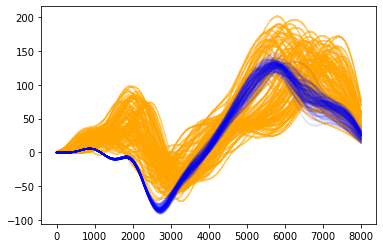

In [65]:
for i in range(100):
    plt.plot(s_x_prior[i], color='orange', alpha=0.6)
    
for i in range(100):
    plt.plot(s_x[i], color='blue', alpha=0.1)

In [68]:
s_x_torch = torch.stack(([s_x[i] for i in range(len(s_x))]))
s_x_prior_torch = torch.stack(([s_x_prior[i] for i in range(len(s_x_prior))]))


mean = torch.mean(s_x_torch, 0)
std = torch.std(s_x_torch, 0)

mean_prior = torch.mean(s_x_prior_torch, 0)
std_prior = torch.std(s_x_prior_torch, 0)

lower = mean - 2 * std


upper = mean + 2 * std


lower_prior = mean_prior - 2 * std_prior


upper_prior = mean_prior + 2 * std_prior



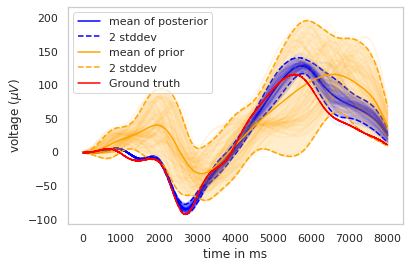

In [71]:


import seaborn as sns

sns.set() 

sns.set_style("whitegrid", {'axes.grid' : False})
#sns.set_style('ticks')

fig1, ax = plt.subplots(1, 1)
#ax.set_title("Comparing signal")

    
plt.plot(mean, color ='blue', label='mean of posterior')

for s in s_x:
    plt.plot(s, alpha=0.05, color='blue')
    #plt.ylim(-30,30)


plt.plot(lower, color='blue', linestyle='dashed', label='2 stddev')
plt.plot(upper, color='blue', linestyle='dashed')
plt.fill_between(x= torch.arange(len(mean_prior)), y1=lower, y2=upper, color='blue', alpha=0.1)



plt.plot(mean_prior, color ='orange', label='mean of prior')


for x_w in s_x_prior:
    plt.plot(x_w, alpha=0.05, color='orange')

plt.plot(lower_prior, color='orange', linestyle='dashed', label='2 stddev')
plt.plot(upper_prior, color='orange', linestyle='dashed')
plt.fill_between(x= torch.arange(len(mean_prior)), y1=lower_prior, y2=upper_prior, color='orange', alpha=0.2)


plt.xlabel('time in ms')
#plt.ylabel('voltage ()')

fig1.gca().set_ylabel(r'voltage ($\mu V$)')
    
plt.plot(obs_real[0], label='Ground truth', color='red')



plt.legend()



## Simulation-based calibration

In [8]:
from sbi.analysis.sbc import check_sbc, run_sbc, get_nltp
from sbi.analysis.plot import sbc_rank_plot
from sbi.inference import SNPE, SNPE_C, prepare_for_sbi, simulate_for_sbi
from sbi.simulators import linear_gaussian, diagonal_linear_gaussian

In [2]:
torch.save(samples_prior, 'samples_prior.pt')
torch.save(s_x_prior, 's_x_prior')
torch.save(posterior_samples, 'posterior_samples.pt')
torch.save(s_x, 's_x.pt')

NameError: name 'torch' is not defined

In [9]:
samples_prior = torch.load('samples_prior.pt')
s_x_prior = torch.load('s_x_prior')
posterior_samples = torch.load('posterior_samples.pt')
s_x = torch.load('s_x.pt')

In [13]:
s_x_torch = torch.stack(([s_x[i] for i in range(len(s_x))]))
s_x_prior_torch = torch.stack(([s_x_prior[i] for i in range(len(s_x_prior))]))

samples_prior_torch = torch.stack(([samples_prior[i] for i in range(len(samples_prior))]))
posterior_samples_torch = torch.stack(([posterior_samples[i] for i in range(len(posterior_samples))]))


In [15]:
s_x_torch.shape

torch.Size([100, 8001])

In [11]:
#posterior_samples = posterior.sample((100,), x = obs_real_stat)
# Generate predictive samples by simulating from posterior samples.
posterior_predictive_samples = posterior_samples_torch

In [16]:
# generate ground truth parameters and corresponding simulated observations for SBC.
thetas = prior.sample((1000,))
xs = inference.run_only_sim(thetas, sim_wrapper, num_workers=8)

early stop early stop200.0 early stop 
200.0early stop200.0param size 

param size   1717

param size  early stop200.0early stop 200.0
param size early stop 17
 17early stop  200.0 
200.0param size  17


param size 
 param size 200.0
17param size 
  1717

joblib will run over 1 jobsjoblib will run over 1 jobs

joblib will run over 1 jobsjoblib will run over 1 jobs

joblib will run over 1 jobs

joblib will run over 1 jobsjoblib will run over 1 jobs
joblib will run over 1 jobs[Parallel(n_jobs=8)]: Using backend MultiprocessingBackend with 8 concurrent workers.

Loading custom mechanism files from /home/ubuntu/miniconda3/envs/sbi_env/lib/python3.7/site-packages/hnn_core/mod/x86_64/.libs/libnrnmech.so
Building the NEURON model
Loading custom mechanism files from /home/ubuntu/miniconda3/envs/sbi_env/lib/python3.7/site-packages/hnn_core/mod/x86_64/.libs/libnrnmech.so
Building the NEURON modelLoading custom mechanism files from /home/ubuntu/miniconda3/envs/sbi_env/lib/python3.7/site-packages/

param size  17
joblib will run over 1 jobs
[Parallel(n_jobs=8)]: Done   7 tasks      | elapsed:  1.6min
Building the NEURON model
Building the NEURON model
obs [-0.5533605  -0.48421398 -0.50695314 ... 29.03250686 28.70282768
 28.75252085]
early stop 200.0
param size  17
joblib will run over 1 jobs
[Parallel(n_jobs=8)]: Done   8 tasks      | elapsed:  1.6min
Building the NEURON model
[Done]
running trial 1 on 1 cores
Simulation time: 0.03 ms...
[Done]
running trial 1 on 1 cores
[Done]
running trial 1 on 1 cores
Simulation time: 0.03 ms...
Simulation time: 0.03 ms...
[Done]
running trial 1 on 1 cores
Simulation time: 0.03 ms...
[Done]
running trial 1 on 1 cores
Simulation time: 0.03 ms...Simulation time: 10.0 ms...

Simulation time: 10.0 ms...
[Done]
running trial 1 on 1 cores
Simulation time: 0.03 ms...
Simulation time: 10.0 ms...
[Done]
running trial 1 on 1 cores
Simulation time: 0.03 ms...
[Done]
running trial 1 on 1 cores
Simulation time: 0.03 ms...
Simulation time: 10.0 ms...
Simula

Simulation time: 30.0 ms...
Simulation time: 30.0 ms...
Simulation time: 30.0 ms...
Simulation time: 30.0 ms...
Simulation time: 50.0 ms...
Simulation time: 60.0 ms...
Simulation time: 30.0 ms...
Simulation time: 40.0 ms...
Simulation time: 40.0 ms...
Simulation time: 40.0 ms...
Simulation time: 40.0 ms...
Simulation time: 60.0 ms...
Simulation time: 40.0 ms...
Simulation time: 70.0 ms...
Simulation time: 40.0 ms...
Simulation time: 50.0 ms...
Simulation time: 50.0 ms...
Simulation time: 50.0 ms...
Simulation time: 70.0 ms...
Simulation time: 50.0 ms...
Simulation time: 50.0 ms...
Simulation time: 80.0 ms...
Simulation time: 50.0 ms...
Simulation time: 60.0 ms...
Simulation time: 60.0 ms...
Simulation time: 60.0 ms...
Simulation time: 80.0 ms...
Simulation time: 60.0 ms...
Simulation time: 90.0 ms...
Simulation time: 60.0 ms...
Simulation time: 60.0 ms...
Simulation time: 70.0 ms...
Simulation time: 70.0 ms...
Simulation time: 70.0 ms...
Simulation time: 90.0 ms...
Simulation time: 70.

Simulation time: 100.0 ms...
Simulation time: 90.0 ms...
Simulation time: 100.0 ms...
Simulation time: 90.0 ms...
Simulation time: 140.0 ms...
Simulation time: 130.0 ms...
Simulation time: 90.0 ms...
Simulation time: 100.0 ms...
Simulation time: 110.0 ms...
Simulation time: 100.0 ms...
Simulation time: 100.0 ms...
Simulation time: 110.0 ms...
Simulation time: 150.0 ms...
Simulation time: 140.0 ms...
Simulation time: 100.0 ms...
Simulation time: 110.0 ms...
Simulation time: 120.0 ms...
Simulation time: 110.0 ms...
Simulation time: 110.0 ms...
Simulation time: 160.0 ms...
Simulation time: 120.0 ms...
Simulation time: 150.0 ms...
Simulation time: 110.0 ms...
Simulation time: 120.0 ms...
Simulation time: 130.0 ms...
Simulation time: 120.0 ms...
Simulation time: 120.0 ms...
Simulation time: 170.0 ms...
Simulation time: 130.0 ms...
Simulation time: 120.0 ms...
Simulation time: 160.0 ms...
Simulation time: 130.0 ms...
Simulation time: 140.0 ms...
Simulation time: 180.0 ms...
Simulation time: 

param size  17
joblib will run over 1 jobs
Simulation time: 160.0 ms...
[Parallel(n_jobs=8)]: Done  33 tasks      | elapsed:  7.7min
Simulation time: 160.0 ms...
Simulation time: 160.0 ms...
Simulation time: 150.0 ms...
Building the NEURON model
Simulation time: 140.0 ms...
obs [-0.57680821 -0.62534621 -0.5844374  ... 52.45294955 52.28076555
 52.12735449]
early stop 200.0
param size  17
joblib will run over 1 jobs
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:  7.8min
Building the NEURON model
Simulation time: 170.0 ms...
Simulation time: 170.0 ms...
Simulation time: 160.0 ms...
Simulation time: 170.0 ms...
Simulation time: 160.0 ms...
Simulation time: 150.0 ms...
Simulation time: 180.0 ms...
Simulation time: 180.0 ms...
Simulation time: 160.0 ms...
Simulation time: 170.0 ms...
[Done]
running trial 1 on 1 cores
Simulation time: 0.03 ms...
Simulation time: 180.0 ms...
Simulation time: 170.0 ms...
[Done]
running trial 1 on 1 cores
Simulation time: 190.0 ms...
Simulation time: 0.03 

Simulation time: 180.0 ms...
Simulation time: 190.0 ms...
obs [-0.53654558 -0.43499982 -0.46100949 ... 23.48463687 23.34812779
 23.35927977]
early stop 200.0
param size  17
joblib will run over 1 jobs
[Parallel(n_jobs=8)]: Done  44 tasks      | elapsed:  9.7min
Building the NEURON model
[Done]
running trial 1 on 1 cores
Simulation time: 0.03 ms...
obs [-0.74063045 -0.64348283 -0.67399545 ... 26.08261571 25.93783798
 25.94073772]
early stopSimulation time: 30.0 ms... 200.0

param size  17
joblib will run over 1 jobs
[Parallel(n_jobs=8)]: Done  45 tasks      | elapsed:  9.7min
Simulation time: 190.0 ms...
Simulation time: 190.0 ms...
Simulation time: 30.0 ms...
Building the NEURON model
obs [-0.74063045 -0.64348283 -0.67399545 ... 33.81121747 33.64310952
 33.62271065]
early stop 200.0
param size  17
joblib will run over 1 jobs
[Parallel(n_jobs=8)]: Done  46 tasks      | elapsed:  9.8min
Building the NEURON model
Simulation time: 10.0 ms...
Simulation time: 40.0 ms...
obs [-0.74063045 -0.

Building the NEURON model
Simulation time: 20.0 ms...
Simulation time: 50.0 ms...
Simulation time: 70.0 ms...
Simulation time: 30.0 ms...
[Done]
running trial 1 on 1 cores
Simulation time: 0.03 ms...
Simulation time: 60.0 ms...
[Done]
running trial 1 on 1 cores
Simulation time: 0.03 ms...
Simulation time: 80.0 ms...
[Done]
running trial 1 on 1 cores
Simulation time: 0.03 ms...
Simulation time: 10.0 ms...[Done]

running trial 1 on 1 cores
Simulation time: 0.03 ms...
[Done]
running trial 1 on 1 cores
Simulation time: 70.0 ms...
Simulation time: 0.03 ms...
Simulation time: 40.0 ms...
Simulation time: 10.0 ms...
Simulation time: 90.0 ms...
Simulation time: 10.0 ms...
Simulation time: 10.0 ms...
Simulation time: 20.0 ms...
Simulation time: 10.0 ms...
Simulation time: 80.0 ms...
Simulation time: 50.0 ms...
Simulation time: 20.0 ms...
Simulation time: 100.0 ms...
Simulation time: 20.0 ms...
Simulation time: 20.0 ms...
Simulation time: 30.0 ms...
Simulation time: 20.0 ms...
Simulation time: 90

Simulation time: 150.0 ms...
Simulation time: 60.0 ms...
Simulation time: 60.0 ms...
Simulation time: 40.0 ms...
Simulation time: 110.0 ms...
Simulation time: 40.0 ms...
Simulation time: 90.0 ms...
Simulation time: 160.0 ms...
Simulation time: 60.0 ms...
Simulation time: 70.0 ms...
Simulation time: 70.0 ms...
Simulation time: 50.0 ms...
Simulation time: 120.0 ms...
Simulation time: 50.0 ms...
Simulation time: 100.0 ms...
Simulation time: 170.0 ms...
Simulation time: 70.0 ms...
Simulation time: 80.0 ms...
Simulation time: 80.0 ms...
Simulation time: 60.0 ms...
Simulation time: 130.0 ms...
Simulation time: 60.0 ms...
Simulation time: 110.0 ms...
Simulation time: 180.0 ms...
Simulation time: 80.0 ms...
Simulation time: 90.0 ms...
Simulation time: 90.0 ms...
Simulation time: 140.0 ms...
Simulation time: 70.0 ms...
Simulation time: 70.0 ms...
Simulation time: 120.0 ms...
Simulation time: 190.0 ms...
Simulation time: 100.0 ms...
Simulation time: 90.0 ms...
Simulation time: 100.0 ms...
Simula

Simulation time: 120.0 ms...
Simulation time: 120.0 ms...
Simulation time: 90.0 ms...
Simulation time: 150.0 ms...
Simulation time: 100.0 ms...
Simulation time: 110.0 ms...
Simulation time: 170.0 ms...
Simulation time: 130.0 ms...
Simulation time: 130.0 ms...
Simulation time: 100.0 ms...
Simulation time: 160.0 ms...
Simulation time: 110.0 ms...
Simulation time: 180.0 ms...
Simulation time: 120.0 ms...
[Done]
running trial 1 on 1 cores
Simulation time: 0.03 ms...
Simulation time: 140.0 ms...
Simulation time: 170.0 ms...
Simulation time: 140.0 ms...
Simulation time: 110.0 ms...
Simulation time: 120.0 ms...
Simulation time: 190.0 ms...
Simulation time: 130.0 ms...
Simulation time: 10.0 ms...
Simulation time: 150.0 ms...
Simulation time: 180.0 ms...
Simulation time: 150.0 ms...
Simulation time: 120.0 ms...
Simulation time: 130.0 ms...
obs [-0.58890917 -0.69364686 -0.63422528 ... 29.72816824 29.36076238
 29.31370022]
early stop 200.0
param size  17
joblib will run over 1 jobs
[Parallel(n_jo

joblib will run over 1 jobs
[Parallel(n_jobs=8)]: Done  83 tasks      | elapsed: 17.8min
Building the NEURON model
Simulation time: 170.0 ms...
[Done]
running trial 1 on 1 cores
Simulation time: 0.03 ms...
Simulation time: 190.0 ms...
Simulation time: 150.0 ms...
Simulation time: 50.0 ms...
Simulation time: 130.0 ms...
Simulation time: 160.0 ms...
Simulation time: 180.0 ms...
Simulation time: 10.0 ms...
obs [-0.70591333 -0.72801579 -0.53927662 ... 19.80999164 19.93869345
 19.74850397]
early stop 200.0
param size  17
joblib will run over 1 jobs
[Parallel(n_jobs=8)]: Done  84 tasks      | elapsed: 18.0min
Simulation time: 160.0 ms...
Building the NEURON model
Simulation time: 60.0 ms...
Simulation time: 140.0 ms...
Simulation time: 170.0 ms...
[Done]
running trial 1 on 1 cores
Simulation time: 0.03 ms...
Simulation time: 190.0 ms...
Simulation time: 20.0 ms...
Simulation time: 170.0 ms...
Simulation time: 70.0 ms...
Simulation time: 180.0 ms...
Simulation time: 10.0 ms...
Simulation time

running trial 1 on 1 cores
Simulation time: 0.03 ms...
Simulation time: 80.0 ms...
Simulation time: 50.0 ms...
Simulation time: 190.0 ms...
Simulation time: 30.0 ms...
Simulation time: 20.0 ms...
obs [-0.52645917 -0.76672134 -0.61718251 ... 24.53873905 24.29868545
 24.07959637]
early stop 200.0
param size  17
joblib will run over 1 jobs
[Parallel(n_jobs=8)]: Done  94 tasks      | elapsed: 19.9min
Simulation time: 170.0 ms...
Building the NEURON model
Simulation time: 10.0 ms...
Simulation time: 60.0 ms...
Simulation time: 40.0 ms...
obs [-0.52645917 -0.76672134 -0.61718251 ... 26.90471979 26.65985744
 26.43604747]
early stop 200.0
param size  17
joblib will run over 1 jobs
[Parallel(n_jobs=8)]: Done  95 tasks      | elapsed: 20.0min
Simulation time: 90.0 ms...
Building the NEURON model
Simulation time: 30.0 ms...
Simulation time: 20.0 ms...
Simulation time: 180.0 ms...
Simulation time: 70.0 ms...
Simulation time: 50.0 ms...
Simulation time: 100.0 ms...
[Done]
running trial 1 on 1 cores

Building the NEURON model
Simulation time: 10.0 ms...
Simulation time: 40.0 ms...
Simulation time: 120.0 ms...
Simulation time: 50.0 ms...
Simulation time: 100.0 ms...
Simulation time: 20.0 ms...
Simulation time: 70.0 ms...
Simulation time: 20.0 ms...
Simulation time: 50.0 ms...
Simulation time: 110.0 ms...
Simulation time: 130.0 ms...
Simulation time: 30.0 ms...
Simulation time: 60.0 ms...
[Done]
running trial 1 on 1 cores
Simulation time: 0.03 ms...
Simulation time: 80.0 ms...
Simulation time: 30.0 ms...
Simulation time: 60.0 ms...
Simulation time: 120.0 ms...
Simulation time: 40.0 ms...
Simulation time: 140.0 ms...
Simulation time: 70.0 ms...
Simulation time: 10.0 ms...
Simulation time: 90.0 ms...
Simulation time: 40.0 ms...
Simulation time: 130.0 ms...
Simulation time: 70.0 ms...
Simulation time: 50.0 ms...
Simulation time: 150.0 ms...
Simulation time: 80.0 ms...
Simulation time: 20.0 ms...
Simulation time: 50.0 ms...
Simulation time: 100.0 ms...
Simulation time: 140.0 ms...
Simula

Simulation time: 110.0 ms...
Simulation time: 190.0 ms...
Simulation time: 90.0 ms...
Simulation time: 50.0 ms...
Simulation time: 140.0 ms...
Simulation time: 70.0 ms...
Simulation time: 110.0 ms...
Simulation time: 120.0 ms...
Simulation time: 160.0 ms...
obs [-0.54760587 -0.46291882 -0.8542248  ... 29.63117176 29.44049469
 29.26676334]
early stop 200.0
param size  17
joblib will run over 1 jobs
[Parallel(n_jobs=8)]: Done 113 tasks      | elapsed: 24.2min
Building the NEURON model
Simulation time: 100.0 ms...
Simulation time: 60.0 ms...
Simulation time: 150.0 ms...
Simulation time: 130.0 ms...
Simulation time: 120.0 ms...
Simulation time: 80.0 ms...
Simulation time: 170.0 ms...
Simulation time: 110.0 ms...
Simulation time: 160.0 ms...
Simulation time: 70.0 ms...
Simulation time: 140.0 ms...
Simulation time: 130.0 ms...
Simulation time: 180.0 ms...
Simulation time: 90.0 ms...
[Done]
running trial 1 on 1 cores
Simulation time: 0.03 ms...
Simulation time: 170.0 ms...
Simulation time: 12

Simulation time: 160.0 ms...
Simulation time: 150.0 ms...
Simulation time: 90.0 ms...
Simulation time: 140.0 ms...
Simulation time: 30.0 ms...
Simulation time: 180.0 ms...
Simulation time: 120.0 ms...
Simulation time: 170.0 ms...
Simulation time: 160.0 ms...
Simulation time: 100.0 ms...
Simulation time: 150.0 ms...
Simulation time: 40.0 ms...
[Done]
running trial 1 on 1 cores
Simulation time: 0.03 ms...
Simulation time: 190.0 ms...
Simulation time: 130.0 ms...
Simulation time: 180.0 ms...
Simulation time: 170.0 ms...
Simulation time: 110.0 ms...
Simulation time: 10.0 ms...
Simulation time: 160.0 ms...
Simulation time: 50.0 ms...
obs [-0.51997467 -0.57664325 -0.73282352 ... 60.65248221 60.45351447
 60.40248029]
early stop 200.0
Simulation time: 140.0 ms...param size 
 17
joblib will run over 1 jobs
[Parallel(n_jobs=8)]: Done 123 tasks      | elapsed: 26.4min
Building the NEURON model
Simulation time: 190.0 ms...
Simulation time: 180.0 ms...
Simulation time: 120.0 ms...
Simulation time: 

Simulation time: 180.0 ms...
Simulation time: 190.0 ms...
[Done]
running trial 1 on 1 cores
Simulation time: 0.03 ms...
Simulation time: 150.0 ms...
obs [-0.59690956 -0.4409388  -0.67738583 ... 29.53090707 29.30220968
 29.15997126]
early stop 200.0
param size  17
joblib will run over 1 jobs
[Parallel(n_jobs=8)]: Done 133 tasks      | elapsed: 28.3min
Simulation time: 70.0 ms...
Building the NEURON model
Simulation time: 30.0 ms...
Simulation time: 190.0 ms...
obs [-0.59716915 -0.44124265 -0.67773832 ... 30.03611313 29.81084957
 29.67206323]
early stop 200.0
param size  17
joblib will run over 1 jobs
[Done]
running trial 1 on 1 cores
[Parallel(n_jobs=8)]: Done 134 tasks      | elapsed: 28.3min
Simulation time: 0.03 ms...
Simulation time: 160.0 ms...
Building the NEURON model
Simulation time: 10.0 ms...
Simulation time: 80.0 ms...
obs [-0.59716915 -0.44124265 -0.67773832 ... 22.68407599 22.49006123
 22.38246097]
early stop 200.0
param size  17
joblib will run over 1 jobs
[Parallel(n_jobs

Simulation time: 180.0 ms...
Simulation time: 70.0 ms...
Simulation time: 10.0 ms...
Simulation time: 130.0 ms...
Simulation time: 20.0 ms...
[Done]
running trial 1 on 1 cores
Simulation time: 0.03 ms...
Simulation time: 10.0 ms...
Simulation time: 40.0 ms...
Simulation time: 190.0 ms...
Simulation time: 80.0 ms...
Simulation time: 140.0 ms...
Simulation time: 20.0 ms...
Simulation time: 30.0 ms...
Simulation time: 10.0 ms...
Simulation time: 20.0 ms...
Simulation time: 50.0 ms...
Simulation time: 90.0 ms...
Simulation time: 150.0 ms...
obs [-4.64332888e-02  4.56867333e-02 -8.11277405e-03 ...  7.96976239e+01
  7.95623133e+01  7.93942260e+01]
early stop 200.0
param size  17
joblib will run over 1 jobs
[Parallel(n_jobs=8)]: Done 144 tasks      | elapsed: 30.4min
Simulation time: 30.0 ms...
Simulation time: 40.0 ms...
Building the NEURON model
Simulation time: 30.0 ms...
Simulation time: 20.0 ms...
Simulation time: 60.0 ms...
Simulation time: 160.0 ms...
Simulation time: 100.0 ms...
Simul

Simulation time: 10.0 ms...
Simulation time: 60.0 ms...
Simulation time: 180.0 ms...
Simulation time: 70.0 ms...
Simulation time: 70.0 ms...
Simulation time: 50.0 ms...
Simulation time: 90.0 ms...
Simulation time: 20.0 ms...
Simulation time: 130.0 ms...
Simulation time: 70.0 ms...
Simulation time: 190.0 ms...
Simulation time: 80.0 ms...
Simulation time: 80.0 ms...
Simulation time: 60.0 ms...
Simulation time: 100.0 ms...
Simulation time: 30.0 ms...
Simulation time: 140.0 ms...
Simulation time: 80.0 ms...
obs [-0.4747718  -0.59965347 -0.42013039 ... 18.28234739 18.21116187
 18.08919358]
early stop 200.0
param size  17
joblib will run over 1 jobs
[Parallel(n_jobs=8)]: Done 153 tasks      | elapsed: 32.5min
Building the NEURON model
Simulation time: 90.0 ms...
Simulation time: 70.0 ms...
Simulation time: 90.0 ms...
Simulation time: 110.0 ms...
Simulation time: 40.0 ms...
Simulation time: 150.0 ms...
Simulation time: 90.0 ms...
Simulation time: 100.0 ms...
Simulation time: 120.0 ms...
Simul

Simulation time: 80.0 ms...
Simulation time: 120.0 ms...
Simulation time: 150.0 ms...
Simulation time: 110.0 ms...
Simulation time: 130.0 ms...
Simulation time: 10.0 ms...
Simulation time: 180.0 ms...
Simulation time: 120.0 ms...
Simulation time: 90.0 ms...
Simulation time: 130.0 ms...
Simulation time: 160.0 ms...
Simulation time: 120.0 ms...
Simulation time: 140.0 ms...
Simulation time: 20.0 ms...
Simulation time: 190.0 ms...
Simulation time: 100.0 ms...
Simulation time: 130.0 ms...
Simulation time: 140.0 ms...
Simulation time: 130.0 ms...
Simulation time: 170.0 ms...
Simulation time: 150.0 ms...
Simulation time: 30.0 ms...
obs [-0.49743654 -0.4345023  -0.68950943 ... 54.77137354 54.79129321
 54.56267835]
early stop 200.0
param size  17
Simulation time: 110.0 ms...
joblib will run over 1 jobs
[Parallel(n_jobs=8)]: Done 162 tasks      | elapsed: 34.7min
Simulation time: 140.0 ms...
Building the NEURON model
Simulation time: 150.0 ms...
Simulation time: 140.0 ms...
Simulation time: 180.

Simulation time: 60.0 ms...
obs [-0.61565456 -0.64740052 -0.6713287  ... 47.34265169 47.17637982
 47.02345474]
early stop 200.0
param size Simulation time: 20.0 ms... 
17
joblib will run over 1 jobs
[Parallel(n_jobs=8)]: Done 171 tasks      | elapsed: 36.6min
Simulation time: 160.0 ms...
Building the NEURON model
Simulation time: 190.0 ms...
Simulation time: 180.0 ms...
Simulation time: 150.0 ms...
Simulation time: 170.0 ms...
Simulation time: 70.0 ms...
Simulation time: 30.0 ms...
Simulation time: 170.0 ms...
obs [-0.61565456 -0.64740052 -0.6713287  ... 43.16099247 42.98383047
 42.82016811]
early stop 200.0
param size  17
joblib will run over 1 jobs
[Parallel(n_jobs=8)]: Done 172 tasks      | elapsed: 36.7min
Simulation time: 190.0 ms...
Building the NEURON model
Simulation time: 160.0 ms...
Simulation time: 80.0 ms...
Simulation time: 180.0 ms...
Simulation time: 180.0 ms...
[Done]
running trial 1 on 1 cores
Simulation time: 0.03 ms...
Simulation time: 40.0 ms...
obs [-0.61565456 -0.

  4.36296268e+01  4.31825626e+01]
early stop 200.0
param size  17
joblib will run over 1 jobs
[Parallel(n_jobs=8)]: Done 182 tasks      | elapsed: 38.6min
Building the NEURON model
Simulation time: 20.0 ms...
Simulation time: 110.0 ms...
Simulation time: 10.0 ms...
Simulation time: 190.0 ms...
obs [-0.77617941 -0.50491964 -0.5324568  ... 37.11220567 37.08203599
 36.67823711]
early stop 200.0
param size  17
joblib will run over 1 jobs
[Parallel(n_jobs=8)]: Done 183 tasks      | elapsed: 38.6min
Simulation time: 60.0 ms...
Building the NEURON model
[Done]
running trial 1 on 1 cores
Simulation time: 0.03 ms...
Simulation time: 30.0 ms...
Simulation time: 20.0 ms...
Simulation time: 120.0 ms...
obs [-0.77617941 -0.50491964 -0.5324568  ... 43.99001765 43.92201239
 43.48043567]
early stop 200.0
param size  17
joblib will run over 1 jobs
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed: 38.7min
Building the NEURON model
Simulation time: 70.0 ms...
Simulation time: 10.0 ms...
[Done]
running

Simulation time: 60.0 ms...
Simulation time: 60.0 ms...
[Done]
running trial 1 on 1 cores
Simulation time: 0.03 ms...
Simulation time: 20.0 ms...
Simulation time: 40.0 ms...
Simulation time: 10.0 ms...
Simulation time: 100.0 ms...
Simulation time: 70.0 ms...
Simulation time: 70.0 ms...
Simulation time: 170.0 ms...
Simulation time: 10.0 ms...
Simulation time: 30.0 ms...
Simulation time: 50.0 ms...
Simulation time: 20.0 ms...
Simulation time: 110.0 ms...
Simulation time: 80.0 ms...
Simulation time: 80.0 ms...
Simulation time: 20.0 ms...
Simulation time: 180.0 ms...
Simulation time: 40.0 ms...
Simulation time: 60.0 ms...
Simulation time: 30.0 ms...
Simulation time: 120.0 ms...
Simulation time: 90.0 ms...
Simulation time: 90.0 ms...
Simulation time: 30.0 ms...
Simulation time: 190.0 ms...
Simulation time: 50.0 ms...
Simulation time: 70.0 ms...
Simulation time: 40.0 ms...
Simulation time: 100.0 ms...
Simulation time: 100.0 ms...
Simulation time: 130.0 ms...
Simulation time: 40.0 ms...
obs [

Simulation time: 60.0 ms...
Simulation time: 130.0 ms...
Building the NEURON model
Simulation time: 130.0 ms...
Simulation time: 150.0 ms...
Simulation time: 100.0 ms...
Simulation time: 80.0 ms...
Simulation time: 60.0 ms...
Simulation time: 140.0 ms...
Simulation time: 70.0 ms...
Simulation time: 140.0 ms...
Simulation time: 160.0 ms...
Simulation time: 110.0 ms...
Simulation time: 90.0 ms...
Simulation time: 70.0 ms...
[Done]
running trial 1 on 1 cores
Simulation time: 0.03 ms...
Simulation time: 150.0 ms...
Simulation time: 80.0 ms...
Simulation time: 170.0 ms...
Simulation time: 150.0 ms...
Simulation time: 120.0 ms...
Simulation time: 100.0 ms...
Simulation time: 160.0 ms...
Simulation time: 80.0 ms...
Simulation time: 10.0 ms...
Simulation time: 90.0 ms...
Simulation time: 180.0 ms...
Simulation time: 160.0 ms...
Simulation time: 130.0 ms...
Simulation time: 110.0 ms...
Simulation time: 90.0 ms...
Simulation time: 170.0 ms...
Simulation time: 100.0 ms...
Simulation time: 20.0 ms

Simulation time: 190.0 ms...
Simulation time: 30.0 ms...
Simulation time: 120.0 ms...
Simulation time: 120.0 ms...
Simulation time: 160.0 ms...
Simulation time: 120.0 ms...
Simulation time: 190.0 ms...
obs [-0.66944997 -0.54361436 -0.71105204 ... 22.85004296 22.67464895
 22.72959202]
early stop 200.0
param size  17
joblib will run over 1 jobs
[Parallel(n_jobs=8)]: Done 211 tasks      | elapsed: 45.0min
[Done]
running trial 1 on 1 cores
Simulation time: 40.0 ms...
Simulation time: 0.03 ms...
Simulation time: 130.0 ms...
Simulation time: 130.0 ms...
Building the NEURON model
Simulation time: 170.0 ms...
obs [-0.66944997 -0.54361436 -0.71105204 ... 49.04424592 48.76813561
 48.722631  ]
early stop 200.0
param size  17
joblib will run over 1 jobs
[Parallel(n_jobs=8)]: Done 212 tasks      | elapsed: 45.0min
Simulation time: 130.0 ms...
Building the NEURON model
Simulation time: 50.0 ms...
Simulation time: 10.0 ms...
Simulation time: 140.0 ms...
Simulation time: 140.0 ms...
Simulation time: 1

Simulation time: 160.0 ms...
Simulation time: 90.0 ms...
Simulation time: 20.0 ms...
Simulation time: 40.0 ms...
Simulation time: 160.0 ms...
Simulation time: 190.0 ms...
Simulation time: 40.0 ms...
Simulation time: 160.0 ms...
Simulation time: 100.0 ms...
Simulation time: 170.0 ms...
Simulation time: 30.0 ms...
Simulation time: 50.0 ms...
Simulation time: 170.0 ms...
Simulation time: 170.0 ms...
Simulation time: 50.0 ms...
obs [-0.39455111 -0.64534073 -0.582059   ... 33.1746462  33.10467358
 33.08054568]
early stop 200.0
param size  17
joblib will run over 1 jobs
[Parallel(n_jobs=8)]: Done 221 tasks      | elapsed: 47.1min
Simulation time: 110.0 ms...
Building the NEURON model
Simulation time: 180.0 ms...
Simulation time: 40.0 ms...
Simulation time: 60.0 ms...
Simulation time: 180.0 ms...
Simulation time: 180.0 ms...
Simulation time: 60.0 ms...
Simulation time: 120.0 ms...
Simulation time: 190.0 ms...
Simulation time: 50.0 ms...
Simulation time: 190.0 ms...
Simulation time: 70.0 ms...

 38.69064504]
early stop 200.0
param size  17
joblib will run over 1 jobs
Simulation time: 80.0 ms...
[Parallel(n_jobs=8)]: Done 231 tasks      | elapsed: 49.0min
Building the NEURON model
Simulation time: 160.0 ms...
[Done]
running trial 1 on 1 cores
Simulation time: 0.03 ms...
obs [-0.47182324 -0.67053847 -0.59521851 ... 39.02717441 39.08006989
 38.94935804]
early stop 200.0
param size  17
joblib will run over 1 jobs
[Parallel(n_jobs=8)]: Done 232 tasks      | elapsed: 49.1min
Simulation time: 100.0 ms...
Building the NEURON model
Simulation time: 70.0 ms...
Simulation time: 90.0 ms...
Simulation time: 10.0 ms...
Simulation time: 110.0 ms...
Simulation time: 170.0 ms...
[Done]
running trial 1 on 1 cores
Simulation time: 0.03 ms...
Simulation time: 80.0 ms...
Simulation time: 120.0 ms...
Simulation time: 20.0 ms...
Simulation time: 100.0 ms...
Simulation time: 180.0 ms...
[Done]
running trial 1 on 1 cores
Simulation time: 0.03 ms...
[Done]
running trial 1 on 1 cores
Simulation time: 0

Simulation time: 10.0 ms...
Simulation time: 140.0 ms...
Simulation time: 20.0 ms...
Simulation time: 30.0 ms...
Simulation time: 120.0 ms...
[Done]
running trial 1 on 1 cores
Simulation time: 0.03 ms...
Simulation time: 110.0 ms...
Simulation time: 30.0 ms...
Simulation time: 20.0 ms...
Simulation time: 150.0 ms...
Simulation time: 30.0 ms...
Simulation time: 130.0 ms...
Simulation time: 40.0 ms...
Simulation time: 10.0 ms...
Simulation time: 120.0 ms...
Simulation time: 40.0 ms...
Simulation time: 30.0 ms...
Simulation time: 160.0 ms...
Simulation time: 40.0 ms...
Simulation time: 140.0 ms...
Simulation time: 50.0 ms...
Simulation time: 20.0 ms...
Simulation time: 130.0 ms...
Simulation time: 50.0 ms...
Simulation time: 40.0 ms...
Simulation time: 50.0 ms...
Simulation time: 150.0 ms...
Simulation time: 170.0 ms...
Simulation time: 60.0 ms...
Simulation time: 30.0 ms...
Simulation time: 140.0 ms...
Simulation time: 60.0 ms...
Simulation time: 50.0 ms...
Simulation time: 60.0 ms...
Si

 12.9086633 ]
early stop 200.0
param size  17
joblib will run over 1 jobs
[Parallel(n_jobs=8)]: Done 250 tasks      | elapsed: 53.3min
Building the NEURON model
Simulation time: 90.0 ms...
Simulation time: 80.0 ms...
Simulation time: 180.0 ms...
Simulation time: 90.0 ms...
Simulation time: 50.0 ms...
Simulation time: 100.0 ms...
Simulation time: 190.0 ms...
Simulation time: 100.0 ms...
Simulation time: 190.0 ms...
Simulation time: 100.0 ms...
Simulation time: 90.0 ms...
Simulation time: 60.0 ms...
Simulation time: 110.0 ms...
[Done]
running trial 1 on 1 cores
Simulation time: 0.03 ms...
obs [-0.68296472 -0.55626312 -0.56521017 ... 45.40960721 45.35289349
 45.09223071]
early stop 200.0
param size  17
joblib will run over 1 jobs
[Parallel(n_jobs=8)]: Done 251 tasks      | elapsed: 53.4min
Building the NEURON model
obs [-0.68296472 -0.55626312 -0.56521017 ... 56.43328114 56.29121929
 55.94548538]
early stop 200.0
param size  17
joblib will run over 1 jobs
[Parallel(n_jobs=8)]: Done 252 ta

Simulation time: 140.0 ms...
Simulation time: 130.0 ms...
Simulation time: 10.0 ms...
[Done]
running trial 1 on 1 cores
Simulation time: 0.03 ms...
Simulation time: 90.0 ms...
Simulation time: 10.0 ms...
Simulation time: 150.0 ms...
Simulation time: 130.0 ms...
Simulation time: 150.0 ms...
Simulation time: 140.0 ms...
Simulation time: 20.0 ms...
Simulation time: 10.0 ms...
Simulation time: 100.0 ms...
Simulation time: 20.0 ms...
Simulation time: 160.0 ms...
Simulation time: 140.0 ms...
Simulation time: 30.0 ms...
Simulation time: 160.0 ms...
Simulation time: 150.0 ms...
Simulation time: 20.0 ms...
Simulation time: 110.0 ms...
Simulation time: 170.0 ms...
Simulation time: 30.0 ms...
Simulation time: 40.0 ms...
Simulation time: 150.0 ms...
Simulation time: 170.0 ms...
Simulation time: 160.0 ms...
Simulation time: 30.0 ms...
Simulation time: 180.0 ms...
Simulation time: 120.0 ms...
Simulation time: 40.0 ms...
Simulation time: 50.0 ms...
Simulation time: 160.0 ms...
Simulation time: 180.0 

 36.86135926]
early stop 200.0
param size  17
joblib will run over 1 jobs
[Parallel(n_jobs=8)]: Done 269 tasks      | elapsed: 57.5min
Simulation time: 180.0 ms...
obs [-0.57786083 -0.6893144  -0.35002545 ... 41.68973482 41.50789046
 41.19954642]
early stop 200.0
param size  17
joblib will run over 1 jobs
[Parallel(n_jobs=8)]: Done 270 tasks      | elapsed: 57.5min
Building the NEURON model
Building the NEURON model
obs [ 0.70750946  0.61593691  0.97531255 ... 43.9909621  43.77669624
 43.43617529]
early stop 200.0
param size  17
joblib will run over 1 jobs
[Parallel(n_jobs=8)]: Done 271 tasks      | elapsed: 57.6min
Simulation time: 140.0 ms...
Simulation time: 100.0 ms...
Building the NEURON model
Simulation time: 70.0 ms...
Simulation time: 80.0 ms...
Simulation time: 110.0 ms...
Simulation time: 190.0 ms...
Simulation time: 150.0 ms...
Simulation time: 120.0 ms...
Simulation time: 80.0 ms...
[Done]
running trial 1 on 1 cores
Simulation time: 0.03 ms...
Simulation time: 90.0 ms...
[D

Simulation time: 100.0 ms...
Simulation time: 170.0 ms...
Simulation time: 10.0 ms...
Simulation time: 10.0 ms...
Simulation time: 140.0 ms...
Simulation time: 110.0 ms...
Simulation time: 20.0 ms...
[Done]
running trial 1 on 1 cores
Simulation time: 0.03 ms...
Simulation time: 180.0 ms...Simulation time: 110.0 ms...

Simulation time: 20.0 ms...
Simulation time: 20.0 ms...
Simulation time: 150.0 ms...
Simulation time: 120.0 ms...
Simulation time: 30.0 ms...
Simulation time: 10.0 ms...
Simulation time: 30.0 ms...
Simulation time: 190.0 ms...
Simulation time: 30.0 ms...
Simulation time: 120.0 ms...
Simulation time: 130.0 ms...
Simulation time: 160.0 ms...
Simulation time: 40.0 ms...
Simulation time: 40.0 ms...
Simulation time: 20.0 ms...
Simulation time: 40.0 ms...
obs [-0.49234246 -0.51172686 -0.6195922  ... 30.83759455 30.58922643
 30.52580694]
early stop 200.0
param size  17
joblib will run over 1 jobs
[Parallel(n_jobs=8)]: Done 281 tasks      | elapsed: 59.7min
Simulation time: 130.0

Simulation time: 170.0 ms...
Simulation time: 50.0 ms...
Simulation time: 160.0 ms...
Simulation time: 90.0 ms...
Simulation time: 150.0 ms...
Simulation time: 80.0 ms...
Simulation time: 10.0 ms...
Simulation time: 80.0 ms...
Simulation time: 180.0 ms...
Simulation time: 60.0 ms...
Simulation time: 170.0 ms...
Simulation time: 100.0 ms...
Simulation time: 160.0 ms...
Simulation time: 90.0 ms...
Simulation time: 20.0 ms...
Simulation time: 90.0 ms...
Simulation time: 190.0 ms...
Simulation time: 70.0 ms...
Simulation time: 110.0 ms...
Simulation time: 180.0 ms...
Simulation time: 170.0 ms...
Simulation time: 100.0 ms...
Simulation time: 30.0 ms...
Simulation time: 100.0 ms...
obs [-0.5503775  -0.71898822 -0.64916032 ... 32.08329033 31.89197806
 31.71051112]
early stop 200.0
param size  17
joblib will run over 1 jobs
[Parallel(n_jobs=8)]: Done 290 tasks      | elapsed: 61.9min
Building the NEURON model
Simulation time: 120.0 ms...
Simulation time: 80.0 ms...
Simulation time: 190.0 ms...

Simulation time: 130.0 ms...
Simulation time: 90.0 ms...
Building the NEURON model
Simulation time: 130.0 ms...
Simulation time: 10.0 ms...
Simulation time: 140.0 ms...
Simulation time: 190.0 ms...
Simulation time: 60.0 ms...
Simulation time: 100.0 ms...
Simulation time: 140.0 ms...
Simulation time: 20.0 ms...
Simulation time: 140.0 ms...
Simulation time: 150.0 ms...
Simulation time: 70.0 ms...
[Done]
running trial 1 on 1 cores
obs [-0.76517524 -0.51332206 -0.65824922 ... 29.82046383 29.64608607
 29.37999527]
early stop 200.0
param size  17
Simulation time: 0.03 ms...
joblib will run over 1 jobs
[Parallel(n_jobs=8)]: Done 300 tasks      | elapsed: 63.9min
Simulation time: 110.0 ms...
Building the NEURON model
Simulation time: 150.0 ms...
Simulation time: 30.0 ms...
Simulation time: 150.0 ms...
Simulation time: 160.0 ms...
Simulation time: 80.0 ms...
Simulation time: 10.0 ms...
Simulation time: 120.0 ms...
Simulation time: 160.0 ms...
Simulation time: 40.0 ms...
Simulation time: 160.0 m

joblib will run over 1 jobs
[Parallel(n_jobs=8)]: Done 309 tasks      | elapsed: 65.8min
Simulation time: 10.0 ms...
Simulation time: 60.0 ms...
Building the NEURON model
Simulation time: 180.0 ms...
Simulation time: 30.0 ms...
Simulation time: 110.0 ms...
Simulation time: 170.0 ms...
Simulation time: 160.0 ms...
Simulation time: 20.0 ms...
Simulation time: 70.0 ms...
Simulation time: 190.0 ms...
Simulation time: 40.0 ms...
Simulation time: 120.0 ms...
Simulation time: 170.0 ms...
Simulation time: 30.0 ms...
[Done]
running trial 1 on 1 cores
Simulation time: 0.03 ms...
Simulation time: 180.0 ms...
obs [-0.55593148 -0.42671943 -0.56716114 ... 29.32660663 29.32349409
 28.96234873]
early stop 200.0
param size  17
joblib will run over 1 jobs
[Parallel(n_jobs=8)]: Done 310 tasks      | elapsed: 66.0min
Simulation time: 80.0 ms...
Simulation time: 50.0 ms...
Building the NEURON model
Simulation time: 130.0 ms...
Simulation time: 180.0 ms...
Simulation time: 10.0 ms...
Simulation time: 40.0 m

param size  17
joblib will run over 1 jobs
Simulation time: 20.0 ms...
[Parallel(n_jobs=8)]: Done 319 tasks      | elapsed: 67.9min
obs [-0.55925877 -0.60360321 -0.66849935 ... 39.10335221 39.02740604
 38.86542729]
early stop 200.0
param size  17
joblib will run over 1 jobs
[Parallel(n_jobs=8)]: Done 320 tasks      | elapsed: 67.9min
Simulation time: 150.0 ms...
Building the NEURON model
Simulation time: 80.0 ms...
Building the NEURON model
Simulation time: 20.0 ms...
Simulation time: 130.0 ms...
Simulation time: 70.0 ms...
Simulation time: 30.0 ms...
Simulation time: 160.0 ms...
Simulation time: 90.0 ms...
Simulation time: 140.0 ms...
Simulation time: 30.0 ms...
Simulation time: 80.0 ms...
Simulation time: 40.0 ms...
[Done]
running trial 1 on 1 cores
Simulation time: 0.03 ms...
Simulation time: 100.0 ms...
Simulation time: 170.0 ms...
Simulation time: 150.0 ms...
[Done]
running trial 1 on 1 cores
Simulation time: 0.03 ms...
Simulation time: 40.0 ms...
Simulation time: 90.0 ms...
Simul

 33.44133584]
early stop 200.0Simulation time: 120.0 ms...
param size 
 17
joblib will run over 1 jobs
[Parallel(n_jobs=8)]: Done 329 tasks      | elapsed: 70.0min
Simulation time: 60.0 ms...
Simulation time: 50.0 ms...
Building the NEURON model
Simulation time: 30.0 ms...
Simulation time: 70.0 ms...
Simulation time: 170.0 ms...
Simulation time: 130.0 ms...
Simulation time: 60.0 ms...
Simulation time: 130.0 ms...
Simulation time: 70.0 ms...
Simulation time: 40.0 ms...
Simulation time: 80.0 ms...
Simulation time: 140.0 ms...
Simulation time: 180.0 ms...
Simulation time: 70.0 ms...
Simulation time: 140.0 ms...
Simulation time: 50.0 ms...
Simulation time: 80.0 ms...
[Done]
running trial 1 on 1 cores
Simulation time: 0.03 ms...
Simulation time: 90.0 ms...
Simulation time: 150.0 ms...
Simulation time: 190.0 ms...
Simulation time: 80.0 ms...
Simulation time: 60.0 ms...
Simulation time: 150.0 ms...
Simulation time: 90.0 ms...
Simulation time: 10.0 ms...
Simulation time: 100.0 ms...
Simulation

Simulation time: 80.0 ms...
Simulation time: 110.0 ms...
Simulation time: 20.0 ms...
Simulation time: 190.0 ms...
Simulation time: 180.0 ms...
Simulation time: 90.0 ms...
Simulation time: 90.0 ms...
Simulation time: 140.0 ms...
Simulation time: 120.0 ms...
Simulation time: 30.0 ms...
[Done]
running trial 1 on 1 cores
obs [-0.60726741 -0.58038903 -0.37480872 ... 26.39529663 26.29374761
 26.30199247]
early stop 200.0
param size Simulation time: 0.03 ms... 
17
joblib will run over 1 jobs
[Parallel(n_jobs=8)]: Done 339 tasks      | elapsed: 72.2min
Simulation time: 190.0 ms...
Building the NEURON model
Simulation time: 100.0 ms...
Simulation time: 150.0 ms...
Simulation time: 100.0 ms...
Simulation time: 130.0 ms...
Simulation time: 40.0 ms...
Simulation time: 10.0 ms...
obs [-0.60726741 -0.58038903 -0.37480872 ... 50.01355658 49.8419166
 49.78010175]
early stop 200.0
param size  17
joblib will run over 1 jobs
[Parallel(n_jobs=8)]: Done 340 tasks      | elapsed: 72.3min
Simulation time: 11

Simulation time: 140.0 ms...
Simulation time: 150.0 ms...
Simulation time: 20.0 ms...
obs [-0.53196295 -0.6675459  -0.36610379 ... 33.46475545 33.25495522
 33.12696193]
early stop 200.0
param size  17
joblib will run over 1 jobs
[Parallel(n_jobs=8)]: Done 349 tasks      | elapsed: 74.2min
Simulation time: 30.0 ms...
Simulation time: 140.0 ms...
Building the NEURON model
Simulation time: 70.0 ms...
Simulation time: 150.0 ms...
[Done]
running trial 1 on 1 cores
Simulation time: 0.03 ms...
Simulation time: 160.0 ms...
Simulation time: 30.0 ms...
Simulation time: 40.0 ms...
Simulation time: 150.0 ms...
Simulation time: 80.0 ms...
Simulation time: 160.0 ms...
Simulation time: 170.0 ms...
Simulation time: 50.0 ms...
Simulation time: 10.0 ms...
Simulation time: 40.0 ms...
[Done]
running trial 1 on 1 cores
Simulation time: 0.03 ms...
Simulation time: 160.0 ms...
Simulation time: 90.0 ms...
Simulation time: 170.0 ms...
Simulation time: 60.0 ms...
Simulation time: 180.0 ms...
Simulation time: 20

 17
Simulation time: 40.0 ms...
joblib will run over 1 jobs
[Parallel(n_jobs=8)]: Done 358 tasks      | elapsed: 76.3min
Simulation time: 60.0 ms...
Building the NEURON model
Simulation time: 190.0 ms...
Simulation time: 120.0 ms...
Simulation time: 30.0 ms...
Simulation time: 110.0 ms...
Simulation time: 50.0 ms...
Simulation time: 190.0 ms...
Simulation time: 70.0 ms...
obs [-0.62832491 -0.51680633 -0.54048415 ... 25.59889204 25.64319352
 25.71836745]
early stop 200.0
param size  17
joblib will run over 1 jobs
[Parallel(n_jobs=8)]: Done 359 tasks      | elapsed: 76.4min
Simulation time: 40.0 ms...
Simulation time: 130.0 ms...
Simulation time: 120.0 ms...
Building the NEURON model
Simulation time: 80.0 ms...
Simulation time: 60.0 ms...
[Done]
running trial 1 on 1 cores
obs [-0.62832491 -0.51680633 -0.54048415 ... 33.33025778 33.34554582
 33.39165523]
early stop 200.0
param size  17
Simulation time: 0.03 ms...
joblib will run over 1 jobs
[Parallel(n_jobs=8)]: Done 360 tasks      | elap

Simulation time: 30.0 ms...
[Done]
running trial 1 on 1 cores
Simulation time: 70.0 ms...
Simulation time: 0.03 ms...
Simulation time: 90.0 ms...
Simulation time: 10.0 ms...
Simulation time: 100.0 ms...
Simulation time: 170.0 ms...
Simulation time: 170.0 ms...
Simulation time: 40.0 ms...
Simulation time: 100.0 ms...
Simulation time: 80.0 ms...
Simulation time: 10.0 ms...
Simulation time: 20.0 ms...
Simulation time: 110.0 ms...
Simulation time: 180.0 ms...
Simulation time: 180.0 ms...
Simulation time: 50.0 ms...
Simulation time: 110.0 ms...
Simulation time: 90.0 ms...
Simulation time: 20.0 ms...Simulation time: 30.0 ms...

Simulation time: 120.0 ms...
Simulation time: 190.0 ms...
Simulation time: 190.0 ms...
Simulation time: 60.0 ms...
Simulation time: 120.0 ms...
Simulation time: 100.0 ms...
Simulation time: 40.0 ms...
Simulation time: 30.0 ms...
Simulation time: 130.0 ms...
obs [-0.64287211 -0.65262911 -0.53338442 ... 39.44063818 39.22538703
 39.16425525]
early stop 200.0
param size  

 49.85768649]
early stop 200.0
param size  17
joblib will run over 1 jobs
[Parallel(n_jobs=8)]: Done 378 tasks      | elapsed: 80.5min
Simulation time: 80.0 ms...
Simulation time: 160.0 ms...
Building the NEURON model
[Done]
running trial 1 on 1 cores
Simulation time: 0.03 ms...
Simulation time: 130.0 ms...
Simulation time: 60.0 ms...
Simulation time: 70.0 ms...Simulation time: 160.0 ms...

Simulation time: 90.0 ms...
Simulation time: 170.0 ms...
Simulation time: 10.0 ms...
Simulation time: 140.0 ms...
Simulation time: 70.0 ms...
Simulation time: 80.0 ms...
Simulation time: 170.0 ms...
Simulation time: 100.0 ms...
[Done]
running trial 1 on 1 cores
Simulation time: 0.03 ms...
Simulation time: 180.0 ms...
Simulation time: 20.0 ms...
Simulation time: 150.0 ms...
Simulation time: 90.0 ms...
Simulation time: 80.0 ms...
Simulation time: 180.0 ms...
Simulation time: 110.0 ms...
Simulation time: 10.0 ms...
Simulation time: 190.0 ms...
Simulation time: 30.0 ms...
Simulation time: 160.0 ms...
Si

Simulation time: 100.0 ms...
obs [ 0.55014806  0.53064932  0.55600475 ... 19.46311118 19.42228989
 19.42263943]
early stop 200.0
param size  17
joblib will run over 1 jobs
Simulation time: 180.0 ms...[Parallel(n_jobs=8)]: Done 388 tasks      | elapsed: 82.6min

Simulation time: 50.0 ms...
Building the NEURON model
Simulation time: 30.0 ms...
Simulation time: 140.0 ms...
Simulation time: 130.0 ms...
Simulation time: 190.0 ms...
Simulation time: 60.0 ms...
Simulation time: 110.0 ms...
Simulation time: 40.0 ms...
[Done]
running trial 1 on 1 cores
Simulation time: 0.03 ms...
obs [ 0.14944644  0.12216764  0.13933392 ... 21.50355734 21.45892662
 21.45543712]
early stop 200.0
param size  17
joblib will run over 1 jobs
[Parallel(n_jobs=8)]: Done 389 tasks      | elapsed: 82.8min
Simulation time: 150.0 ms...
Simulation time: 70.0 ms...
Building the NEURON model
Simulation time: 140.0 ms...
[Done]
running trial 1 on 1 cores
Simulation time: 0.03 ms...
Simulation time: 120.0 ms...
Simulation time

Simulation time: 170.0 ms...
Simulation time: 90.0 ms...
Simulation time: 170.0 ms...
Simulation time: 30.0 ms...
Simulation time: 20.0 ms...
Simulation time: 20.0 ms...
Simulation time: 100.0 ms...
Simulation time: 160.0 ms...
Simulation time: 180.0 ms...
Simulation time: 180.0 ms...
Simulation time: 40.0 ms...
Simulation time: 100.0 ms...
Simulation time: 30.0 ms...
Simulation time: 30.0 ms...
Simulation time: 110.0 ms...
Simulation time: 190.0 ms...Simulation time: 170.0 ms...

Simulation time: 190.0 ms...
Simulation time: 50.0 ms...
Simulation time: 110.0 ms...
Simulation time: 40.0 ms...
Simulation time: 40.0 ms...
Simulation time: 180.0 ms...
Simulation time: 120.0 ms...
obs [-0.72915045 -0.42519012 -0.63488235 ... 38.27908298 37.99973026
 38.08452927]
early stop 200.0
param size  17
joblib will run over 1 jobs
[Parallel(n_jobs=8)]: Done 398 tasks      | elapsed: 85.0min
Building the NEURON model
obs [-0.73074745 -0.42702975 -0.63699081 ... 22.46575351 22.19595918
 22.29062688]
e

Simulation time: 130.0 ms...
Building the NEURON model
Simulation time: 60.0 ms...
Simulation time: 70.0 ms...
Simulation time: 140.0 ms...
Simulation time: 140.0 ms...
[Done]
running trial 1 on 1 cores
Simulation time: 0.03 ms...
Simulation time: 70.0 ms...
Simulation time: 70.0 ms...
Simulation time: 80.0 ms...
[Done]
running trial 1 on 1 cores
Simulation time: 0.03 ms...
Simulation time: 150.0 ms...
Simulation time: 10.0 ms...
Simulation time: 80.0 ms...
Simulation time: 150.0 ms...
[Done]
running trial 1 on 1 cores
Simulation time: 0.03 ms...
Simulation time: 80.0 ms...
Simulation time: 90.0 ms...
Simulation time: 10.0 ms...
Simulation time: 90.0 ms...
Simulation time: 10.0 ms...
Simulation time: 20.0 ms...
Simulation time: 160.0 ms...
Simulation time: 160.0 ms...
Simulation time: 90.0 ms...
Simulation time: 100.0 ms...
Simulation time: 20.0 ms...
Simulation time: 20.0 ms...
Simulation time: 100.0 ms...
Simulation time: 30.0 ms...
Simulation time: 170.0 ms...
Simulation time: 170.0

Simulation time: 130.0 ms...
Simulation time: 120.0 ms...
Simulation time: 60.0 ms...
Simulation time: 140.0 ms...
obs [-0.44894407 -0.41722417 -0.49910424 ... 21.05810169 21.17186712
 21.23792689]
early stop 200.0
param size  17
Simulation time: 190.0 ms...
joblib will run over 1 jobs
[Parallel(n_jobs=8)]: Done 417 tasks      | elapsed: 89.2min
Simulation time: 50.0 ms...
Simulation time: 70.0 ms...
Building the NEURON model
Simulation time: 140.0 ms...
Simulation time: 150.0 ms...
Simulation time: 130.0 ms...
Simulation time: 70.0 ms...
Simulation time: 60.0 ms...
obs [-0.57131201 -0.54181032 -0.62594345 ... 40.27873974 40.34214102
 40.35778867]
early stop 200.0
param size  17
joblib will run over 1 jobs
[Parallel(n_jobs=8)]: Done 418 tasks      | elapsed: 89.3min
Simulation time: 80.0 ms...
Simulation time: 150.0 ms...
Building the NEURON model
Simulation time: 160.0 ms...
Simulation time: 140.0 ms...
Simulation time: 80.0 ms...
Simulation time: 70.0 ms...
[Done]
running trial 1 on 

Simulation time: 100.0 ms...
Simulation time: 30.0 ms...
Simulation time: 90.0 ms...
Simulation time: 10.0 ms...
Simulation time: 170.0 ms...
Simulation time: 190.0 ms...
Simulation time: 110.0 ms...
obs [-0.72530184 -0.5604731  -0.69602782 ... 31.48982804 31.52466207
 31.43842555]
early stop 200.0
param size  17
joblib will run over 1 jobs
[Parallel(n_jobs=8)]: Done 427 tasks      | elapsed: 91.4min
Simulation time: 110.0 ms...
Simulation time: 40.0 ms...
Building the NEURON model
Simulation time: 100.0 ms...
Simulation time: 20.0 ms...
Simulation time: 180.0 ms...
obs [-0.72530184 -0.5604731  -0.69602782 ... 48.21985694 48.18568817
 48.03077918]
early stop 200.0
param size  17
joblib will run over 1 jobs
[Parallel(n_jobs=8)]: Done 428 tasks      | elapsed: 91.4min
Simulation time: 120.0 ms...
Building the NEURON model
Simulation time: 50.0 ms...
Simulation time: 120.0 ms...
Simulation time: 30.0 ms...
Simulation time: 110.0 ms...
Simulation time: 190.0 ms...
Simulation time: 130.0 ms

Simulation time: 130.0 ms...
Simulation time: 50.0 ms...
Simulation time: 10.0 ms...
[Done]
running trial 1 on 1 cores
Simulation time: 0.03 ms...
[Done]
running trial 1 on 1 cores
Simulation time: 150.0 ms...
Simulation time: 0.03 ms...
Simulation time: 80.0 ms...
Simulation time: 150.0 ms...
Simulation time: 140.0 ms...
Simulation time: 60.0 ms...
Simulation time: 20.0 ms...
Simulation time: 10.0 ms...
Simulation time: 160.0 ms...Simulation time: 10.0 ms...

Simulation time: 90.0 ms...
Simulation time: 150.0 ms...
Simulation time: 160.0 ms...
Simulation time: 30.0 ms...
Simulation time: 70.0 ms...
Simulation time: 20.0 ms...
Simulation time: 100.0 ms...
Simulation time: 170.0 ms...
Simulation time: 20.0 ms...
Simulation time: 160.0 ms...
Simulation time: 40.0 ms...
Simulation time: 170.0 ms...
Simulation time: 80.0 ms...
Simulation time: 30.0 ms...
Simulation time: 110.0 ms...
Simulation time: 180.0 ms...
Simulation time: 30.0 ms...
Simulation time: 170.0 ms...
Simulation time: 50.0 

obs [-0.4673988  -0.48874858 -0.51850228 ... 33.10067388 33.17874458
 33.13023705]
early stop 200.0
param size  17
joblib will run over 1 jobs
[Parallel(n_jobs=8)]: Done 447 tasks      | elapsed: 95.6min
Simulation time: 100.0 ms...
Simulation time: 70.0 ms...
Simulation time: 50.0 ms...
Building the NEURON model
Simulation time: 40.0 ms...
Simulation time: 140.0 ms...
obs [-0.24314797 -0.25988021 -0.28490902 ... 37.19939888 37.25063146
 37.17538486]
early stop 200.0
param size  17
joblib will run over 1 jobs
[Parallel(n_jobs=8)]: Done 448 tasks      | elapsed: 95.6min
Simulation time: 80.0 ms...
Simulation time: 110.0 ms...
Simulation time: 60.0 ms...
Building the NEURON model
Simulation time: 50.0 ms...
[Done]
running trial 1 on 1 cores
Simulation time: 0.03 ms...
Simulation time: 150.0 ms...
[Done]
running trial 1 on 1 cores
Simulation time: 120.0 ms...
Simulation time: 0.03 ms...
Simulation time: 90.0 ms...
Simulation time: 70.0 ms...
Simulation time: 10.0 ms...
Simulation time: 60

 62.54256375]
early stop 200.0
param size  17
joblib will run over 1 jobs
[Parallel(n_jobs=8)]: Done 457 tasks      | elapsed: 97.7min
Simulation time: 100.0 ms...
Simulation time: 30.0 ms...
Simulation time: 30.0 ms...
Building the NEURON model
Simulation time: 150.0 ms...
Simulation time: 90.0 ms...
Simulation time: 100.0 ms...
Simulation time: 30.0 ms...
Simulation time: 100.0 ms...
Simulation time: 40.0 ms...
Simulation time: 110.0 ms...
Simulation time: 160.0 ms...
Simulation time: 40.0 ms...
Simulation time: 110.0 ms...
Simulation time: 40.0 ms...
Simulation time: 110.0 ms...
[Done]
running trial 1 on 1 cores
Simulation time: 0.03 ms...
Simulation time: 170.0 ms...
Simulation time: 50.0 ms...
Simulation time: 120.0 ms...
Simulation time: 50.0 ms...
Simulation time: 120.0 ms...
Simulation time: 120.0 ms...
Simulation time: 50.0 ms...
Simulation time: 10.0 ms...
Simulation time: 180.0 ms...
Simulation time: 60.0 ms...
Simulation time: 60.0 ms...
Simulation time: 130.0 ms...
Simulat

Building the NEURON model
Simulation time: 150.0 ms...
Simulation time: 80.0 ms...
Simulation time: 40.0 ms...
Simulation time: 140.0 ms...
Simulation time: 70.0 ms...
Simulation time: 80.0 ms...
Simulation time: 170.0 ms...
Simulation time: 160.0 ms...
Simulation time: 90.0 ms...
Simulation time: 50.0 ms...
Simulation time: 150.0 ms...
Simulation time: 80.0 ms...
Simulation time: 180.0 ms...
Simulation time: 90.0 ms...
[Done]
running trial 1 on 1 cores
Simulation time: 0.03 ms...
Simulation time: 170.0 ms...
Simulation time: 100.0 ms...
Simulation time: 60.0 ms...
Simulation time: 160.0 ms...
Simulation time: 90.0 ms...
Simulation time: 190.0 ms...
Simulation time: 100.0 ms...
Simulation time: 10.0 ms...
Simulation time: 180.0 ms...
Simulation time: 110.0 ms...
Simulation time: 70.0 ms...
Simulation time: 170.0 ms...
obs [-0.69309728 -0.87734094 -0.56233009 ... 55.92782369 55.85015303
 55.73735055]
early stop 200.0
param size  17
joblib will run over 1 jobs
[Parallel(n_jobs=8)]: Done 

Simulation time: 80.0 ms...
Simulation time: 120.0 ms...
Simulation time: 100.0 ms...
[Done]
running trial 1 on 1 cores
Simulation time: 0.03 ms...
Simulation time: 130.0 ms...
obs [-0.69624447 -0.47606811 -0.51014216 ... 22.99709131 22.81703409
 22.93900554]
early stop 200.0
param size  17
joblib will run over 1 jobs
[Parallel(n_jobs=8)]: Done 477 tasks      | elapsed: 102.1min
[Done]
running trial 1 on 1 cores
Simulation time: 0.03 ms...
Simulation time: 40.0 ms...
Simulation time: 90.0 ms...
Building the NEURON model
Simulation time: 130.0 ms...
Simulation time: 110.0 ms...
Simulation time: 10.0 ms...
Simulation time: 140.0 ms...
Simulation time: 50.0 ms...
Simulation time: 10.0 ms...
Simulation time: 100.0 ms...
Simulation time: 140.0 ms...
Simulation time: 120.0 ms...
Simulation time: 20.0 ms...
Simulation time: 150.0 ms...
Simulation time: 60.0 ms...
[Done]
running trial 1 on 1 cores
Simulation time: 0.03 ms...
Simulation time: 150.0 ms...
Simulation time: 110.0 ms...
Simulation 

Simulation time: 30.0 ms...
Simulation time: 30.0 ms...
Simulation time: 100.0 ms...
Simulation time: 150.0 ms...
Simulation time: 150.0 ms...
Simulation time: 30.0 ms...
Simulation time: 190.0 ms...
Simulation time: 190.0 ms...
Simulation time: 40.0 ms...
Simulation time: 40.0 ms...
Simulation time: 160.0 ms...
Simulation time: 110.0 ms...
Simulation time: 160.0 ms...
obs [-0.59409115 -0.67267642 -0.55608915 ... 38.85889259 38.80182575
 38.5634369 ]
early stop 200.0
param size  Simulation time: 40.0 ms...17

joblib will run over 1 jobs
[Parallel(n_jobs=8)]: Done 486 tasks      | elapsed: 104.4min
obs [-0.59409115 -0.67267642 -0.55608915 ... 33.61192413 33.58347122
 33.37360744]
early stop 200.0
param size  17
Building the NEURON model
Simulation time: 50.0 ms...
joblib will run over 1 jobs
[Parallel(n_jobs=8)]: Done 487 tasks      | elapsed: 104.4min
Simulation time: 50.0 ms...
Building the NEURON model
Simulation time: 170.0 ms...
Simulation time: 120.0 ms...
Simulation time: 170.0 m

Simulation time: 140.0 ms...
Simulation time: 50.0 ms...
Building the NEURON model
Simulation time: 60.0 ms...
Simulation time: 180.0 ms...
Simulation time: 80.0 ms...
Simulation time: 20.0 ms...
Simulation time: 10.0 ms...
Simulation time: 150.0 ms...
Simulation time: 60.0 ms...
Simulation time: 70.0 ms...
Simulation time: 190.0 ms...
Simulation time: 30.0 ms...
Simulation time: 90.0 ms...
Simulation time: 20.0 ms...
[Done]
running trial 1 on 1 cores
Simulation time: 0.03 ms...
Simulation time: 160.0 ms...
Simulation time: 80.0 ms...
Simulation time: 70.0 ms...
obs [-0.63139191 -0.45924217 -0.66456301 ... 44.08470272 43.9069366
 43.68866028]
early stop 200.0
param size  17
joblib will run over 1 jobs
[Parallel(n_jobs=8)]: Done 497 tasks      | elapsed: 106.5min
Simulation time: 40.0 ms...
Building the NEURON model
Simulation time: 100.0 ms...
Simulation time: 10.0 ms...
Simulation time: 30.0 ms...
Simulation time: 170.0 ms...
Simulation time: 90.0 ms...
Simulation time: 80.0 ms...
Sim

 40.69316516]
early stop 200.0
param size  17
joblib will run over 1 jobs
[Parallel(n_jobs=8)]: Done 506 tasks      | elapsed: 108.5min
Building the NEURON model
Simulation time: 80.0 ms...
Simulation time: 120.0 ms...
Simulation time: 20.0 ms...
Simulation time: 70.0 ms...
Simulation time: 120.0 ms...
Simulation time: 30.0 ms...
Simulation time: 120.0 ms...
Simulation time: 90.0 ms...
Simulation time: 130.0 ms...
Simulation time: 30.0 ms...
Simulation time: 80.0 ms...
Simulation time: 130.0 ms...
Simulation time: 130.0 ms...
Simulation time: 40.0 ms...
[Done]
running trial 1 on 1 cores
Simulation time: 0.03 ms...
Simulation time: 100.0 ms...
Simulation time: 140.0 ms...
Simulation time: 40.0 ms...
Simulation time: 140.0 ms...
Simulation time: 90.0 ms...
Simulation time: 140.0 ms...
Simulation time: 50.0 ms...
Simulation time: 10.0 ms...
Simulation time: 110.0 ms...
Simulation time: 150.0 ms...
Simulation time: 50.0 ms...
Simulation time: 150.0 ms...
Simulation time: 100.0 ms...
Simula

Simulation time: 70.0 ms...
Simulation time: 60.0 ms...
Simulation time: 150.0 ms...
Simulation time: 190.0 ms...
Simulation time: 190.0 ms...
Simulation time: 170.0 ms...
Simulation time: 40.0 ms...
Simulation time: 80.0 ms...
Simulation time: 150.0 ms...
Simulation time: 70.0 ms...
Simulation time: 160.0 ms...
obs [-0.57862346 -0.48034233 -0.54959684 ... 39.05713608 39.03253151
 38.86148064]
early stop 200.0
param size  17
joblib will run over 1 jobs
[Parallel(n_jobs=8)]: Done 515 tasks      | elapsed: 110.8min
Building the NEURON model
obs [-0.56719953 -0.46814925 -0.53659428 ... 47.81656154 47.76070123
 47.55837803]
early stop 200.0
param size  17
joblib will run over 1 jobs
[Parallel(n_jobs=8)]: Done 516 tasks      | elapsed: 110.8min
Simulation time: 180.0 ms...
Simulation time: 50.0 ms...
Building the NEURON model
Simulation time: 80.0 ms...
Simulation time: 90.0 ms...
Simulation time: 160.0 ms...
Simulation time: 170.0 ms...
Simulation time: 190.0 ms...
Simulation time: 90.0 ms

Simulation time: 120.0 ms...
Simulation time: 190.0 ms...
[Done]
running trial 1 on 1 cores
Simulation time: 0.03 ms...
Simulation time: 120.0 ms...
Simulation time: 130.0 ms...
[Done]
running trial 1 on 1 cores
Simulation time: 0.03 ms...
Simulation time: 190.0 ms...
Simulation time: 80.0 ms...
obs [-0.44606055 -0.48947753 -0.60521249 ... 52.70538841 52.54171076
 52.00170443]
early stop 200.0
param size  17[Done]

running trial 1 on 1 cores
joblib will run over 1 jobs
Simulation time: 0.03 ms...
[Parallel(n_jobs=8)]: Done 526 tasks      | elapsed: 112.8min
Simulation time: 130.0 ms...
Simulation time: 10.0 ms...
Building the NEURON model
Simulation time: 140.0 ms...
Simulation time: 10.0 ms...
obs [-0.41499448 -0.45698888 -0.57119696 ... 27.98150095 27.91837989
 27.47874633]
early stop 200.0
param size  17
joblib will run over 1 jobs
[Parallel(n_jobs=8)]: Done 527 tasks      | elapsed: 112.8min
Simulation time: 90.0 ms...
Building the NEURON model
Simulation time: 140.0 ms...
Simulati

Simulation time: 10.0 ms...
Simulation time: 180.0 ms...
Simulation time: 110.0 ms...
Simulation time: 30.0 ms...
Simulation time: 40.0 ms...
Simulation time: 150.0 ms...
Simulation time: 60.0 ms...
Simulation time: 30.0 ms...
Simulation time: 20.0 ms...
Simulation time: 190.0 ms...
Simulation time: 120.0 ms...
Simulation time: 160.0 ms...
Simulation time: 50.0 ms...
Simulation time: 40.0 ms...
Simulation time: 70.0 ms...
Simulation time: 40.0 ms...
Simulation time: 30.0 ms...
obs [-0.52981967 -0.35789973 -0.79968822 ... 70.5551169  70.38015536
 70.21090977]
early stop 200.0
param size  17
joblib will run over 1 jobs
[Parallel(n_jobs=8)]: Done 536 tasks      | elapsed: 115.0min
Simulation time: 130.0 ms...
Simulation time: 170.0 ms...
Building the NEURON model
Simulation time: 60.0 ms...
Simulation time: 50.0 ms...
Simulation time: 80.0 ms...
Simulation time: 40.0 ms...
Simulation time: 50.0 ms...
Simulation time: 140.0 ms...
Simulation time: 70.0 ms...
Simulation time: 180.0 ms...
Sim

Simulation time: 0.03 ms...
Simulation time: 100.0 ms...
Simulation time: 160.0 ms...
Simulation time: 110.0 ms...
obs [-0.66455874 -0.54948133 -0.41058714 ... 57.87606479 57.72552067
 57.64925313]
early stop 200.0Simulation time: 130.0 ms...

param size  17
joblib will run over 1 jobs
[Parallel(n_jobs=8)]: Done 545 tasks      | elapsed: 117.0min
Simulation time: 70.0 ms...
Simulation time: 80.0 ms...
Building the NEURON model
Simulation time: 10.0 ms...
Simulation time: 110.0 ms...
Simulation time: 170.0 ms...
Simulation time: 120.0 ms...
Simulation time: 140.0 ms...
Simulation time: 90.0 ms...
Simulation time: 80.0 ms...
Simulation time: 20.0 ms...
Simulation time: 120.0 ms...
Simulation time: 180.0 ms...
Simulation time: 150.0 ms...
Simulation time: 130.0 ms...
Simulation time: 100.0 ms...
Simulation time: 90.0 ms...
[Done]
running trial 1 on 1 cores
Simulation time: 0.03 ms...
Simulation time: 30.0 ms...
Simulation time: 130.0 ms...
Simulation time: 190.0 ms...
Simulation time: 160

Simulation time: 10.0 ms...
Simulation time: 120.0 ms...
Simulation time: 150.0 ms...
Simulation time: 60.0 ms...
obs [-0.68974986 -0.46697595 -0.6590772  ... 45.04307587 44.90623646
 44.88963084]
early stop 200.0
param size  17
joblib will run over 1 jobs
[Parallel(n_jobs=8)]: Done 555 tasks      | elapsed: 119.2min
Simulation time: 150.0 ms...
Building the NEURON model
Simulation time: 20.0 ms...
Simulation time: 160.0 ms...
Simulation time: 110.0 ms...
Simulation time: 130.0 ms...
[Done]
running trial 1 on 1 cores
Simulation time: 0.03 ms...
Simulation time: 30.0 ms...
Simulation time: 70.0 ms...
Simulation time: 160.0 ms...
Simulation time: 170.0 ms...
Simulation time: 140.0 ms...
Simulation time: 120.0 ms...
[Done]
running trial 1 on 1 cores
Simulation time: 10.0 ms...
Simulation time: 0.03 ms...
Simulation time: 40.0 ms...
Simulation time: 170.0 ms...
Simulation time: 80.0 ms...
Simulation time: 180.0 ms...
Simulation time: 150.0 ms...
Simulation time: 130.0 ms...
Simulation time

Building the NEURON model
Simulation time: 110.0 ms...
obs [-0.44682102 -0.47532375 -0.59357546 ... 43.12101802 43.07671402
 42.92479032]
early stop 200.0
param size  17
joblib will run over 1 jobs
[Parallel(n_jobs=8)]: Done 565 tasks      | elapsed: 121.3min
Building the NEURON model
Simulation time: 70.0 ms...
Simulation time: 170.0 ms...
Simulation time: 140.0 ms...
Simulation time: 20.0 ms...
Simulation time: 40.0 ms...
Simulation time: 120.0 ms...
Simulation time: 80.0 ms...
Simulation time: 150.0 ms...
Simulation time: 180.0 ms...
Simulation time: 30.0 ms...
[Done]
running trial 1 on 1 cores
Simulation time: 0.03 ms...
Simulation time: 50.0 ms...
Simulation time: 90.0 ms...
Simulation time: 130.0 ms...
Simulation time: 160.0 ms...
[Done]
running trial 1 on 1 cores
Simulation time: 0.03 ms...
Simulation time: 40.0 ms...
Simulation time: 190.0 ms...
Simulation time: 10.0 ms...
Simulation time: 60.0 ms...
Simulation time: 100.0 ms...
Simulation time: 140.0 ms...
Simulation time: 170

Simulation time: 120.0 ms...
Simulation time: 30.0 ms...
Simulation time: 170.0 ms...
Simulation time: 180.0 ms...
Simulation time: 30.0 ms...
Simulation time: 70.0 ms...
Simulation time: 80.0 ms...
[Done]
running trial 1 on 1 cores
Simulation time: 0.03 ms...
Simulation time: 130.0 ms...
Simulation time: 40.0 ms...
Simulation time: 180.0 ms...
Simulation time: 190.0 ms...
Simulation time: 80.0 ms...
Simulation time: 40.0 ms...
Simulation time: 90.0 ms...
Simulation time: 140.0 ms...
Simulation time: 10.0 ms...
Simulation time: 50.0 ms...
Simulation time: 190.0 ms...
obs [-0.35558457 -0.23194849 -0.24674651 ... 31.4928932  31.24028801
 31.28316949]
early stop 200.0
param size  17
joblib will run over 1 jobs
[Parallel(n_jobs=8)]: Done 575 tasks      | elapsed: 123.6min
Simulation time: 90.0 ms...
Building the NEURON model
Simulation time: 50.0 ms...
Simulation time: 100.0 ms...
Simulation time: 150.0 ms...
Simulation time: 20.0 ms...
Simulation time: 60.0 ms...
obs [ 0.38530153  0.51722

Simulation time: 40.0 ms...
Simulation time: 130.0 ms...
Simulation time: 170.0 ms...
Simulation time: 80.0 ms...
[Done]
running trial 1 on 1 cores
Simulation time: 0.03 ms...
Simulation time: 70.0 ms...
Simulation time: 140.0 ms...
Simulation time: 50.0 ms...
[Done]
running trial 1 on 1 cores
Simulation time: 0.03 ms...
Simulation time: 140.0 ms...
Simulation time: 180.0 ms...
Simulation time: 90.0 ms...
Simulation time: 10.0 ms...
Simulation time: 80.0 ms...
Simulation time: 60.0 ms...
Simulation time: 150.0 ms...
Simulation time: 10.0 ms...
Simulation time: 190.0 ms...
Simulation time: 100.0 ms...
Simulation time: 150.0 ms...
Simulation time: 20.0 ms...
Simulation time: 90.0 ms...
Simulation time: 70.0 ms...
Simulation time: 20.0 ms...
Simulation time: 160.0 ms...
obs [ 0.22889283  0.26175951  0.19680822 ... 38.85895724 38.85613472
 38.52116559]
early stop Simulation time: 110.0 ms...200.0

param size  17
joblib will run over 1 jobs
[Parallel(n_jobs=8)]: Done 585 tasks      | elapse

running trial 1 on 1 cores
Simulation time: 0.03 ms...
Simulation time: 120.0 ms...
obs [-0.61280683 -0.54176032 -0.54505651 ... 20.03138889 20.01008389
 19.94066157]
early stop 200.0
param size  17
joblib will run over 1 jobs
Simulation time: 40.0 ms...Simulation time: 100.0 ms...

[Parallel(n_jobs=8)]: Done 594 tasks      | elapsed: 127.8min
Building the NEURON model
Simulation time: 190.0 ms...
Simulation time: 50.0 ms...
Simulation time: 150.0 ms...
Simulation time: 10.0 ms...
Simulation time: 130.0 ms...
Simulation time: 110.0 ms...
Simulation time: 50.0 ms...
obs [-0.65090684 -0.58180611 -0.58705956 ... 35.27793549 35.21571691
 35.10534484]
early stop 200.0
param size  17
joblib will run over 1 jobs
[Parallel(n_jobs=8)]: Done 595 tasks      | elapsed: 127.9min
Simulation time: 20.0 ms...
Simulation time: 60.0 ms...
Building the NEURON model
Simulation time: 160.0 ms...
Simulation time: 140.0 ms...
Simulation time: 120.0 ms...
[Done]
running trial 1 on 1 cores
Simulation time: 0.0

Simulation time: 50.0 ms...
Simulation time: 140.0 ms...
Simulation time: 80.0 ms...
Simulation time: 10.0 ms...
Simulation time: 90.0 ms...
Simulation time: 190.0 ms...
Simulation time: 170.0 ms...
Simulation time: 50.0 ms...
Simulation time: 60.0 ms...
Simulation time: 150.0 ms...
Simulation time: 20.0 ms...
Simulation time: 90.0 ms...
Simulation time: 100.0 ms...
obs [-0.51135673 -0.80929187 -0.53834158 ... 39.02308729 39.08474668
 38.96983532]
early stop 200.0
param size  17
joblib will run over 1 jobs
[Parallel(n_jobs=8)]: Done 604 tasks      | elapsed: 130.0min
Building the NEURON model
Simulation time: 180.0 ms...
Simulation time: 60.0 ms...
Simulation time: 70.0 ms...
Simulation time: 160.0 ms...
Simulation time: 30.0 ms...
Simulation time: 110.0 ms...
Simulation time: 100.0 ms...
Simulation time: 190.0 ms...
Simulation time: 70.0 ms...
Simulation time: 80.0 ms...
Simulation time: 170.0 ms...
Simulation time: 40.0 ms...
Simulation time: 120.0 ms...
[Done]
running trial 1 on 1 c

Simulation time: 180.0 ms...
Building the NEURON model
Simulation time: 20.0 ms...
Simulation time: 100.0 ms...
Simulation time: 130.0 ms...
Simulation time: 60.0 ms...
Simulation time: 140.0 ms...
Simulation time: 100.0 ms...
Simulation time: 190.0 ms...
Simulation time: 110.0 ms...
Simulation time: 30.0 ms...
Simulation time: 140.0 ms...
Simulation time: 70.0 ms...
Simulation time: 150.0 ms...
[Done]
running trial 1 on 1 cores
Simulation time: 120.0 ms...
Simulation time: 0.03 ms...
Simulation time: 110.0 ms...
obs [-0.51808987 -0.38526273 -0.57057572 ... 50.21108613 49.99805158
 49.94537454]
early stop 200.0
param size  17
joblib will run over 1 jobs
[Parallel(n_jobs=8)]: Done 614 tasks      | elapsed: 132.2min
Simulation time: 40.0 ms...
Building the NEURON model
Simulation time: 150.0 ms...
Simulation time: 80.0 ms...
Simulation time: 160.0 ms...
Simulation time: 130.0 ms...
Simulation time: 10.0 ms...
Simulation time: 120.0 ms...
Simulation time: 50.0 ms...
Simulation time: 160.0

Simulation time: 150.0 ms...
Simulation time: 20.0 ms...
Simulation time: 170.0 ms...
Simulation time: 170.0 ms...
Simulation time: 80.0 ms...
Simulation time: 110.0 ms...
obs [-0.479314   -0.64943678 -0.50651853 ... 69.64890325 69.55061668
 69.16299886]
early stop 200.0
param size  17
joblib will run over 1 jobs
[Parallel(n_jobs=8)]: Done 623 tasks      | elapsed: 134.2min
Simulation time: 40.0 ms...
Building the NEURON model
Simulation time: 160.0 ms...
Simulation time: 30.0 ms...
Simulation time: 180.0 ms...
Simulation time: 180.0 ms...
Simulation time: 90.0 ms...
Simulation time: 120.0 ms...
Simulation time: 50.0 ms...
Simulation time: 170.0 ms...Simulation time: 40.0 ms...

Simulation time: 190.0 ms...
Simulation time: 190.0 ms...
Simulation time: 100.0 ms...
[Done]
running trial 1 on 1 cores
Simulation time: 0.03 ms...
Simulation time: 130.0 ms...
Simulation time: 60.0 ms...
Simulation time: 50.0 ms...
Simulation time: 180.0 ms...
obs [-0.772417   -0.62178065 -0.8016969  ... 42.4

Simulation time: 120.0 ms...
Simulation time: 140.0 ms...
Simulation time: 20.0 ms...
Simulation time: 190.0 ms...
Simulation time: 70.0 ms...
Simulation time: 70.0 ms...
[Done]
running trial 1 on 1 cores
Simulation time: 0.03 ms...
Simulation time: 150.0 ms...
Simulation time: 130.0 ms...
obs [-0.58802657 -0.50768603 -0.63768331 ... 34.85779675 34.66486298
 34.61210642]
early stop 200.0
param size  17
joblib will run over 1 jobs
[Parallel(n_jobs=8)]: Done 634 tasks      | elapsed: 136.3min
Simulation time: 30.0 ms...
Building the NEURON model
Simulation time: 10.0 ms...
Simulation time: 80.0 ms...
[Done]
running trial 1 on 1 cores
Simulation time: 0.03 ms...
Simulation time: 80.0 ms...
Simulation time: 160.0 ms...
Simulation time: 140.0 ms...
Simulation time: 40.0 ms...
Simulation time: 20.0 ms...
Simulation time: 10.0 ms...
Simulation time: 90.0 ms...
Simulation time: 170.0 ms...
Simulation time: 90.0 ms...
Simulation time: 150.0 ms...
[Done]
running trial 1 on 1 cores
Simulation tim

Simulation time: 50.0 ms...
Simulation time: 30.0 ms...
obs [-0.73835202 -0.67824448 -0.68955002 ... 48.26458523 48.24307306
 48.06818713]
early stop 200.0
param size  17
joblib will run over 1 jobs
Simulation time: 110.0 ms...
[Parallel(n_jobs=8)]: Done 643 tasks      | elapsed: 138.4min
Simulation time: 50.0 ms...
Simulation time: 120.0 ms...
Building the NEURON model
Simulation time: 180.0 ms...
Simulation time: 80.0 ms...
Simulation time: 60.0 ms...
Simulation time: 40.0 ms...
Simulation time: 60.0 ms...
Simulation time: 120.0 ms...
Simulation time: 130.0 ms...
Simulation time: 190.0 ms...
Simulation time: 90.0 ms...
Simulation time: 70.0 ms...
Simulation time: 50.0 ms...
[Done]
running trial 1 on 1 cores
Simulation time: 70.0 ms...
Simulation time: 0.03 ms...
Simulation time: 130.0 ms...
Simulation time: 140.0 ms...
obs [-0.31970865 -0.252477   -0.25656475 ... 31.80916076 31.85547715
 31.74832514]
early stop 200.0
param size  17
joblib will run over 1 jobs
[Parallel(n_jobs=8)]: Do

Simulation time: 100.0 ms...
[Done]
running trial 1 on 1 cores
Simulation time: 0.03 ms...
Simulation time: 160.0 ms...
Simulation time: 100.0 ms...
Simulation time: 80.0 ms...
Simulation time: 120.0 ms...
Simulation time: 170.0 ms...
Simulation time: 110.0 ms...
Simulation time: 40.0 ms...
Simulation time: 170.0 ms...
Simulation time: 10.0 ms...
Simulation time: 110.0 ms...
Simulation time: 90.0 ms...
Simulation time: 180.0 ms...
Simulation time: 130.0 ms...
Simulation time: 120.0 ms...
Simulation time: 50.0 ms...
Simulation time: 180.0 ms...
Simulation time: 20.0 ms...
Simulation time: 120.0 ms...
Simulation time: 100.0 ms...
Simulation time: 190.0 ms...
Simulation time: 140.0 ms...
Simulation time: 130.0 ms...
Simulation time: 190.0 ms...
Simulation time: 60.0 ms...
Simulation time: 30.0 ms...
Simulation time: 130.0 ms...
Simulation time: 110.0 ms...
obs [ 2.95671444e-01 -6.47190685e-03  9.58365138e-02 ...  5.03775244e+01
  5.01539146e+01  5.00339804e+01]
early stop 200.0
param size

Simulation time: 140.0 ms...
Simulation time: 120.0 ms...Simulation time: 160.0 ms...

Simulation time: 80.0 ms...
Simulation time: 150.0 ms...
Simulation time: 60.0 ms...
Simulation time: 90.0 ms...
Simulation time: 150.0 ms...
Simulation time: 130.0 ms...
Simulation time: 170.0 ms...
[Done]Simulation time: 70.0 ms...
running trial 1 on 1 cores

Simulation time: 0.03 ms...
Simulation time: 160.0 ms...
[Done]
running trial 1 on 1 cores
Simulation time: 0.03 ms...
Simulation time: 100.0 ms...
Simulation time: 160.0 ms...
Simulation time: 140.0 ms...
Simulation time: 180.0 ms...
Simulation time: 80.0 ms...
Simulation time: 10.0 ms...
Simulation time: 170.0 ms...
Simulation time: 10.0 ms...
Simulation time: 110.0 ms...
Simulation time: 170.0 ms...
Simulation time: 150.0 ms...
Simulation time: 90.0 ms...
Simulation time: 190.0 ms...
Simulation time: 180.0 ms...
Simulation time: 20.0 ms...
Simulation time: 20.0 ms...
Simulation time: 120.0 ms...
Simulation time: 180.0 ms...
Simulation time:

joblib will run over 1 jobs
[Parallel(n_jobs=8)]: Done 672 tasks      | elapsed: 144.8min
Building the NEURON model
Simulation time: 40.0 ms...
Simulation time: 170.0 ms...
Simulation time: 120.0 ms...
Simulation time: 30.0 ms...
Simulation time: 190.0 ms...
Simulation time: 140.0 ms...
[Done]
running trial 1 on 1 cores
Simulation time: 0.03 ms...
Simulation time: 180.0 ms...
Simulation time: 50.0 ms...
Simulation time: 130.0 ms...
Simulation time: 40.0 ms...
obs [-0.68572049 -0.68158746 -0.61032042 ... 42.82694073 42.67683385
 42.55531014]
early stop 200.0
param size  17
Simulation time: 150.0 ms...
joblib will run over 1 jobs
[Parallel(n_jobs=8)]: Done 673 tasks      | elapsed: 144.9min
Simulation time: 10.0 ms...
Building the NEURON model
[Done]
running trial 1 on 1 cores
Simulation time: 0.03 ms...
Simulation time: 190.0 ms...
Simulation time: 60.0 ms...
Simulation time: 140.0 ms...
Simulation time: 50.0 ms...
Simulation time: 160.0 ms...
Simulation time: 20.0 ms...
Simulation time

Simulation time: 180.0 ms...
[Done]
running trial 1 on 1 cores
Simulation time: 0.03 ms...
Simulation time: 90.0 ms...
Simulation time: 40.0 ms...
Simulation time: 160.0 ms...
[Done]
running trial 1 on 1 cores
Simulation time: 0.03 ms...
Simulation time: 40.0 ms...
Simulation time: 80.0 ms...
Simulation time: 10.0 ms...
Simulation time: 190.0 ms...
Simulation time: 100.0 ms...
Simulation time: 50.0 ms...
Simulation time: 170.0 ms...
Simulation time: 10.0 ms...
Simulation time: 50.0 ms...
Simulation time: 90.0 ms...
Simulation time: 20.0 ms...
obs [-0.52098851 -0.65458998 -0.5749216  ... 32.44996105 32.30647047
 32.12032493]
early stop 200.0
param size  17
joblib will run over 1 jobs
[Parallel(n_jobs=8)]: Done 683 tasks      | elapsed: 147.0min
Building the NEURON model
Simulation time: 60.0 ms...
Simulation time: 110.0 ms...
Simulation time: 180.0 ms...
Simulation time: 20.0 ms...
Simulation time: 60.0 ms...
Simulation time: 100.0 ms...
Simulation time: 30.0 ms...
Simulation time: 70.0

 33.84248401]
early stop 200.0
param size  17
Simulation time: 50.0 ms...
joblib will run over 1 jobs
[Parallel(n_jobs=8)]: Done 692 tasks      | elapsed: 149.0min
Simulation time: 90.0 ms...
Simulation time: 50.0 ms...
Building the NEURON model
Simulation time: 150.0 ms...
Simulation time: 10.0 ms...
Simulation time: 100.0 ms...
Simulation time: 130.0 ms...
Simulation time: 60.0 ms...
Simulation time: 60.0 ms...
Simulation time: 100.0 ms...
Simulation time: 20.0 ms...
Simulation time: 160.0 ms...
Simulation time: 110.0 ms...
Simulation time: 140.0 ms...
Simulation time: 70.0 ms...
[Done]
running trial 1 on 1 cores
Simulation time: 0.03 ms...
Simulation time: 70.0 ms...
Simulation time: 110.0 ms...
Simulation time: 30.0 ms...
Simulation time: 170.0 ms...
Simulation time: 120.0 ms...
Simulation time: 150.0 ms...
Simulation time: 10.0 ms...
Simulation time: 80.0 ms...
Simulation time: 80.0 ms...
Simulation time: 120.0 ms...
Simulation time: 40.0 ms...
Simulation time: 180.0 ms...
Simulat

 36.42028712]
early stop 200.0
param size  17
Simulation time: 150.0 ms...
joblib will run over 1 jobs
[Parallel(n_jobs=8)]: Done 701 tasks      | elapsed: 151.1min
Simulation time: 60.0 ms...
Building the NEURON model
Simulation time: 50.0 ms...
Simulation time: 110.0 ms...
Simulation time: 150.0 ms...
Simulation time: 170.0 ms...
Simulation time: 110.0 ms...
Simulation time: 160.0 ms...
Simulation time: 70.0 ms...
Simulation time: 60.0 ms...
Simulation time: 120.0 ms...
Simulation time: 160.0 ms...
Simulation time: 180.0 ms...
Simulation time: 170.0 ms...
Simulation time: 120.0 ms...
Simulation time: 80.0 ms...[Done]

running trial 1 on 1 cores
Simulation time: 0.03 ms...
Simulation time: 70.0 ms...
Simulation time: 130.0 ms...
Simulation time: 170.0 ms...
Simulation time: 190.0 ms...
Simulation time: 90.0 ms...Simulation time: 130.0 ms...

Simulation time: 180.0 ms...
Simulation time: 10.0 ms...
Simulation time: 80.0 ms...
Simulation time: 140.0 ms...
Simulation time: 180.0 ms...
ob

Simulation time: 20.0 ms...
Building the NEURON model
Simulation time: 150.0 ms...
Simulation time: 150.0 ms...
Simulation time: 190.0 ms...
Simulation time: 90.0 ms...
Simulation time: 30.0 ms...
Simulation time: 120.0 ms...
Simulation time: 160.0 ms...
Simulation time: 160.0 ms...
[Done]
running trial 1 on 1 cores
Simulation time: 0.03 ms...
obs [-0.64577508 -0.5979816  -0.52697209 ... 33.80181015 33.49523786
 33.43203224]
early stop 200.0
param size  17
joblib will run over 1 jobs
[Parallel(n_jobs=8)]: Done 712 tasks      | elapsed: 153.3min
Simulation time: 40.0 ms...
Building the NEURON model
Simulation time: 100.0 ms...
Simulation time: 170.0 ms...
Simulation time: 130.0 ms...
[Done]
running trial 1 on 1 cores
Simulation time: 0.03 ms...
Simulation time: 170.0 ms...
Simulation time: 10.0 ms...
Simulation time: 50.0 ms...
Simulation time: 180.0 ms...
Simulation time: 110.0 ms...
Simulation time: 10.0 ms...
Simulation time: 140.0 ms...
Simulation time: 180.0 ms...
Simulation time: 

early stop 200.0
param size  17
joblib will run over 1 jobs
[Parallel(n_jobs=8)]: Done 721 tasks      | elapsed: 155.3min
Simulation time: 50.0 ms...
Building the NEURON model
obs [-0.62304377 -0.68270283 -0.64469948 ... 54.9790444  54.88685429
 54.88921725]
early stop 200.0
param size  17
Simulation time: 80.0 ms...
joblib will run over 1 jobs
[Parallel(n_jobs=8)]: Done 722 tasks      | elapsed: 155.3min
Building the NEURON model
Simulation time: 10.0 ms...
Simulation time: 30.0 ms...
Simulation time: 170.0 ms...
Simulation time: 150.0 ms...
Simulation time: 90.0 ms...
Simulation time: 60.0 ms...
Simulation time: 20.0 ms...
Simulation time: 40.0 ms...
Simulation time: 180.0 ms...
Simulation time: 100.0 ms...
Simulation time: 160.0 ms...
[Done]
running trial 1 on 1 cores
Simulation time: 30.0 ms...
Simulation time: 0.03 ms...
Simulation time: 70.0 ms...
Simulation time: 50.0 ms...
[Done]
running trial 1 on 1 cores
Simulation time: 0.03 ms...
Simulation time: 110.0 ms...Simulation time:

Simulation time: 180.0 ms...
Simulation time: 130.0 ms...
Simulation time: 20.0 ms...
Simulation time: 20.0 ms...
Simulation time: 70.0 ms...
Simulation time: 100.0 ms...
Simulation time: 60.0 ms...
Simulation time: 190.0 ms...
Simulation time: 140.0 ms...
Simulation time: 30.0 ms...
Simulation time: 30.0 ms...
[Done]
running trial 1 on 1 cores
Simulation time: 110.0 ms...
Simulation time: 80.0 ms...
Simulation time: 0.03 ms...
Simulation time: 70.0 ms...
obs [-0.30313295 -0.51601882 -0.55735027 ... 37.79958531 37.75746105
 37.38110907]
early stop 200.0
param size  17
joblib will run over 1 jobs
[Parallel(n_jobs=8)]: Done 732 tasks      | elapsed: 157.5min
Simulation time: 150.0 ms...
Building the NEURON model
Simulation time: 40.0 ms...
Simulation time: 120.0 ms...
Simulation time: 40.0 ms...
Simulation time: 90.0 ms...
Simulation time: 10.0 ms...
Simulation time: 80.0 ms...
Simulation time: 160.0 ms...
Simulation time: 50.0 ms...
Simulation time: 130.0 ms...
Simulation time: 50.0 ms.

Simulation time: 120.0 ms...
Simulation time: 110.0 ms...
Simulation time: 80.0 ms...
Simulation time: 80.0 ms...
Simulation time: 10.0 ms...
Simulation time: 40.0 ms...
Simulation time: 190.0 ms...
Simulation time: 160.0 ms...
Simulation time: 130.0 ms...
Simulation time: 120.0 ms...
Simulation time: 90.0 ms...
Simulation time: 90.0 ms...
Simulation time: 20.0 ms...
Simulation time: 50.0 ms...
obs [-0.63814486 -0.55689397 -0.53006451 ... 59.12396887 58.8279901
 58.92934541]
early stop 200.0
param size  17
joblib will run over 1 jobs
[Parallel(n_jobs=8)]: Done 741 tasks      | elapsed: 159.7min
Building the NEURON model
Simulation time: 170.0 ms...
Simulation time: 140.0 ms...
Simulation time: 130.0 ms...
Simulation time: 100.0 ms...
Simulation time: 100.0 ms...
Simulation time: 30.0 ms...
Simulation time: 60.0 ms...
Simulation time: 180.0 ms...
Simulation time: 150.0 ms...
Simulation time: 140.0 ms...
Simulation time: 110.0 ms...
Simulation time: 40.0 ms...
Simulation time: 110.0 ms..

Simulation time: 170.0 ms...
Simulation time: 50.0 ms...
Building the NEURON model
Simulation time: 90.0 ms...
Simulation time: 170.0 ms...
Simulation time: 20.0 ms...
Simulation time: 140.0 ms...
Simulation time: 130.0 ms...
Simulation time: 60.0 ms...
Simulation time: 180.0 ms...
Simulation time: 100.0 ms...
Simulation time: 180.0 ms...
Simulation time: 30.0 ms...
Simulation time: 150.0 ms...
[Done]
running trial 1 on 1 cores
Simulation time: 0.03 ms...
Simulation time: 70.0 ms...
Simulation time: 140.0 ms...
Simulation time: 190.0 ms...
Simulation time: 110.0 ms...
Simulation time: 190.0 ms...
Simulation time: 40.0 ms...
Simulation time: 160.0 ms...
Simulation time: 80.0 ms...
Simulation time: 10.0 ms...
Simulation time: 150.0 ms...
obs [-0.47818047 -0.68133198 -0.47283857 ... 20.10401421 20.25274422
 20.03306676]
early stop 200.0
param size  17
joblib will run over 1 jobs
[Parallel(n_jobs=8)]: Done 751 tasks      | elapsed: 162.0min
Simulation time: 120.0 ms...
obs [-0.63832293 -0.

Simulation time: 110.0 ms...
Simulation time: 30.0 ms...
Simulation time: 170.0 ms...
Simulation time: 140.0 ms...
Simulation time: 70.0 ms...
[Done]
Simulation time: 120.0 ms...running trial 1 on 1 cores

Simulation time: 0.03 ms...
Simulation time: 190.0 ms...
[Done]
running trial 1 on 1 cores
Simulation time: 0.03 ms...
Simulation time: 40.0 ms...
Simulation time: 180.0 ms...
Simulation time: 150.0 ms...
Simulation time: 130.0 ms...
Simulation time: 80.0 ms...
Simulation time: 10.0 ms...
obs [ 0.60624083  0.71937752  0.55705849 ... 27.28877965 27.04744035
 26.87425203]
early stop 200.0
param size  17
joblib will run over 1 jobs
[Parallel(n_jobs=8)]: Done 761 tasks      | elapsed: 164.0min
Simulation time: 10.0 ms...
Simulation time: 50.0 ms...
Building the NEURON model
Simulation time: 190.0 ms...
Simulation time: 160.0 ms...
Simulation time: 140.0 ms...
Simulation time: 90.0 ms...
Simulation time: 20.0 ms...
Simulation time: 20.0 ms...
Simulation time: 60.0 ms...
Simulation time: 1

Simulation time: 170.0 ms...
Simulation time: 160.0 ms...
Simulation time: 120.0 ms...
Simulation time: 10.0 ms...
Simulation time: 40.0 ms...
Simulation time: 50.0 ms...
Simulation time: 90.0 ms...
[Done]
running trial 1 on 1 cores
Simulation time: 0.03 ms...
Simulation time: 180.0 ms...
Simulation time: 170.0 ms...
Simulation time: 130.0 ms...
Simulation time: 20.0 ms...
Simulation time: 50.0 ms...
Simulation time: 60.0 ms...
Simulation time: 100.0 ms...
Simulation time: 10.0 ms...
Simulation time: 140.0 ms...
Simulation time: 190.0 ms...
Simulation time: 180.0 ms...
Simulation time: 30.0 ms...
Simulation time: 60.0 ms...
Simulation time: 70.0 ms...
Simulation time: 110.0 ms...
Simulation time: 150.0 ms...
Simulation time: 20.0 ms...
Simulation time: 190.0 ms...
obs [-0.80883127 -0.52280308 -0.86909713 ... 40.3225942  40.15720441
 40.25575651]
early stop 200.0
param size  17
joblib will run over 1 jobs
[Parallel(n_jobs=8)]: Done 771 tasks      | elapsed: 166.2min
Simulation time: 40.

Simulation time: 40.0 ms...
Simulation time: 90.0 ms...
Simulation time: 140.0 ms...
Simulation time: 100.0 ms...
[Done]
running trial 1 on 1 cores
Simulation time: 100.0 ms...
Simulation time: 0.03 ms...
Simulation time: 50.0 ms...
Simulation time: 170.0 ms...
Simulation time: 50.0 ms...
Simulation time: 150.0 ms...
[Done]
running trial 1 on 1 cores
Simulation time: 0.03 ms...
Simulation time: 110.0 ms...
Simulation time: 110.0 ms...
Simulation time: 10.0 ms...
Simulation time: 60.0 ms...
Simulation time: 180.0 ms...
Simulation time: 160.0 ms...
Simulation time: 60.0 ms...
Simulation time: 120.0 ms...
Simulation time: 10.0 ms...
Simulation time: 120.0 ms...
Simulation time: 70.0 ms...
Simulation time: 20.0 ms...
Simulation time: 170.0 ms...
Simulation time: 190.0 ms...
Simulation time: 70.0 ms...
Simulation time: 130.0 ms...
Simulation time: 20.0 ms...
Simulation time: 130.0 ms...
Simulation time: 80.0 ms...
Simulation time: 180.0 ms...
Simulation time: 30.0 ms...
obs [-0.27997854 -0.

Simulation time: 140.0 ms...
Simulation time: 80.0 ms...
Building the NEURON model
Simulation time: 100.0 ms...
Simulation time: 40.0 ms...
Simulation time: 30.0 ms...
Simulation time: 150.0 ms...
Simulation time: 150.0 ms...
Simulation time: 50.0 ms...
Simulation time: 110.0 ms...
Simulation time: 90.0 ms...
[Done]
running trial 1 on 1 cores
Simulation time: 0.03 ms...
Simulation time: 40.0 ms...
Simulation time: 160.0 ms...
Simulation time: 160.0 ms...
Simulation time: 60.0 ms...
[Done]
running trial 1 on 1 cores
Simulation time: 0.03 ms...
Simulation time: 120.0 ms...
Simulation time: 10.0 ms...
Simulation time: 100.0 ms...
Simulation time: 50.0 ms...
Simulation time: 170.0 ms...
Simulation time: 170.0 ms...
Simulation time: 70.0 ms...
Simulation time: 10.0 ms...
Simulation time: 130.0 ms...
Simulation time: 20.0 ms...
Simulation time: 110.0 ms...
Simulation time: 60.0 ms...
Simulation time: 180.0 ms...
Simulation time: 180.0 ms...
Simulation time: 80.0 ms...
Simulation time: 20.0 m

Building the NEURON model
obs [-0.26396911 -0.56695115 -0.57467769 ... 56.75096609 56.73147095
 56.3475382 ]
early stop 200.0
param size  17
joblib will run over 1 jobs
[Parallel(n_jobs=8)]: Done 800 tasks      | elapsed: 172.5min
Simulation time: 160.0 ms...
Building the NEURON model
Simulation time: 40.0 ms...
Simulation time: 80.0 ms...
Simulation time: 110.0 ms...
Simulation time: 130.0 ms...
Simulation time: 30.0 ms...
Simulation time: 50.0 ms...
Simulation time: 90.0 ms...
Simulation time: 170.0 ms...
Simulation time: 120.0 ms...
[Done]
running trial 1 on 1 cores
Simulation time: 140.0 ms...
Simulation time: 0.03 ms...
Simulation time: 40.0 ms...
[Done]
running trial 1 on 1 cores
Simulation time: 0.03 ms...
Simulation time: 60.0 ms...
Simulation time: 100.0 ms...
Simulation time: 180.0 ms...
Simulation time: 130.0 ms...
Simulation time: 10.0 ms...
Simulation time: 150.0 ms...
Simulation time: 50.0 ms...
Simulation time: 10.0 ms...
Simulation time: 70.0 ms...
Simulation time: 110.

Simulation time: 0.03 ms...
Simulation time: 120.0 ms...
Simulation time: 70.0 ms...
Simulation time: 40.0 ms...
Simulation time: 30.0 ms...
Simulation time: 80.0 ms...
Simulation time: 150.0 ms...
Simulation time: 180.0 ms...
Simulation time: 10.0 ms...
Simulation time: 80.0 ms...
Simulation time: 130.0 ms...
Simulation time: 50.0 ms...
Simulation time: 40.0 ms...
Simulation time: 90.0 ms...
Simulation time: 160.0 ms...
Simulation time: 190.0 ms...
Simulation time: 20.0 ms...
Simulation time: 90.0 ms...
Simulation time: 140.0 ms...
Simulation time: 60.0 ms...
Simulation time: 50.0 ms...
Simulation time: 100.0 ms...
Simulation time: 170.0 ms...
obs [-0.26396911 -0.56695115 -0.57467769 ... 25.57902732 25.63029486
 25.31720002]
early stop 200.0
param size  17
joblib will run over 1 jobs
[Parallel(n_jobs=8)]: Done 810 tasks      | elapsed: 174.9min
Building the NEURON model
Simulation time: 100.0 ms...
Simulation time: 30.0 ms...
Simulation time: 70.0 ms...
Simulation time: 150.0 ms...
Si

Simulation time: 140.0 ms...
Simulation time: 80.0 ms...
Simulation time: 50.0 ms...
Simulation time: 130.0 ms...
Simulation time: 100.0 ms...
obs [-0.56375454 -0.39307938 -0.54005076 ... 36.87624587 36.93949624
 36.56165227]
early stop 200.0
param size  17
joblib will run over 1 jobs
Simulation time: 190.0 ms...
[Parallel(n_jobs=8)]: Done 819 tasks      | elapsed: 176.9min
Simulation time: 10.0 ms...
Building the NEURON model
Simulation time: 150.0 ms...
Simulation time: 90.0 ms...
Simulation time: 60.0 ms...
Simulation time: 140.0 ms...
Simulation time: 110.0 ms...
obs [-0.56375454 -0.39307938 -0.54005076 ... 19.57626041 19.71944308
 19.42134639]Simulation time: 20.0 ms...
early stop
 200.0
param size  17
[Parallel(n_jobs=8)]: Done 820 tasks      | elapsed: 177.0min
joblib will run over 1 jobs
Building the NEURON model
Simulation time: 160.0 ms...
Simulation time: 100.0 ms...
Simulation time: 70.0 ms...
Simulation time: 150.0 ms...
Simulation time: 120.0 ms...
[Done]
running trial 1 

Simulation time: 100.0 ms...
Simulation time: 30.0 ms...
Simulation time: 10.0 ms...
Simulation time: 170.0 ms...
Simulation time: 130.0 ms...
Simulation time: 60.0 ms...
Simulation time: 160.0 ms...
Simulation time: 180.0 ms...
Simulation time: 110.0 ms...
Simulation time: 40.0 ms...
Simulation time: 180.0 ms...
Simulation time: 20.0 ms...
Simulation time: 70.0 ms...
Simulation time: 140.0 ms...
Simulation time: 170.0 ms...
Simulation time: 190.0 ms...
Simulation time: 120.0 ms...
Simulation time: 50.0 ms...
Simulation time: 190.0 ms...
Simulation time: 30.0 ms...
Simulation time: 80.0 ms...
Simulation time: 150.0 ms...
Simulation time: 180.0 ms...
obs [-0.63847733 -0.69727641 -0.56504057 ... 30.4768083  30.39583914
 30.21944827]
early stop 200.0
param size  17
joblib will run over 1 jobs
obs [-0.63847733 -0.69727641 -0.56504057 ... 34.56730381 34.48851298
 34.31423767]
early stop 200.0
param size  17
[Parallel(n_jobs=8)]: Done 829 tasks      | elapsed: 179.2min
[Parallel(n_jobs=8)]: 

Simulation time: 60.0 ms...
obs [-0.68075121 -0.61544558 -0.55685477 ... 28.03970271 28.04466665
 27.9903366 ]
early stop 200.0
param size  17
Simulation time: 20.0 ms...
joblib will run over 1 jobs
[Parallel(n_jobs=8)]: Done 839 tasks      | elapsed: 181.2min
[Done]
running trial 1 on 1 cores
Simulation time: 0.03 ms...
Simulation time: 150.0 ms...
Building the NEURON model
Simulation time: 70.0 ms...
Simulation time: 180.0 ms...
Simulation time: 110.0 ms...
Simulation time: 70.0 ms...
Simulation time: 30.0 ms...
Simulation time: 10.0 ms...
Simulation time: 160.0 ms...
Simulation time: 80.0 ms...
Simulation time: 120.0 ms...
Simulation time: 190.0 ms...
Simulation time: 80.0 ms...
Simulation time: 20.0 ms...
Simulation time: 40.0 ms...
Simulation time: 170.0 ms...
Simulation time: 90.0 ms...
[Done]
running trial 1 on 1 cores
Simulation time: 0.03 ms...
Simulation time: 130.0 ms...
obs [-0.60328227 -0.36684463 -0.48389817 ... 40.25094616 40.06240168
 39.96849278]
early stop 200.0
param

Simulation time: 0.03 ms...
Simulation time: 40.0 ms...
Simulation time: 20.0 ms...
obs [-0.60029023 -0.84971724 -0.51057957 ... 25.66720788 25.58027197
 25.72830671]
early stop 200.0
param size  17
joblib will run over 1 jobs
[Parallel(n_jobs=8)]: Done 849 tasks      | elapsed: 183.3min
Simulation time: 150.0 ms...
Building the NEURON model
Simulation time: 120.0 ms...
Simulation time: 80.0 ms...
Simulation time: 110.0 ms...
Simulation time: 10.0 ms...
Simulation time: 50.0 ms...
Simulation time: 30.0 ms...
Simulation time: 160.0 ms...
Simulation time: 130.0 ms...
Simulation time: 90.0 ms...
Simulation time: 120.0 ms...
Simulation time: 20.0 ms...
Simulation time: 40.0 ms...
Simulation time: 60.0 ms...
[Done]
running trial 1 on 1 cores
Simulation time: 0.03 ms...
Simulation time: 140.0 ms...
Simulation time: 170.0 ms...
Simulation time: 30.0 ms...
Simulation time: 100.0 ms...
Simulation time: 130.0 ms...
Simulation time: 50.0 ms...
Simulation time: 10.0 ms...
Simulation time: 70.0 ms.

 34.13960392]
early stop 200.0
param size  17
joblib will run over 1 jobs
[Parallel(n_jobs=8)]: Done 858 tasks      | elapsed: 185.5min
Simulation time: 120.0 ms...
Simulation time: 180.0 ms...
Building the NEURON model
Simulation time: 160.0 ms...
Simulation time: 100.0 ms...
Simulation time: 40.0 ms...
Simulation time: 80.0 ms...
Simulation time: 70.0 ms...
Simulation time: 130.0 ms...
Simulation time: 190.0 ms...
Simulation time: 170.0 ms...
Simulation time: 50.0 ms...
Simulation time: 110.0 ms...
Simulation time: 90.0 ms...
Simulation time: 80.0 ms...
[Done]
running trial 1 on 1 cores
Simulation time: 0.03 ms...
Simulation time: 140.0 ms...
obs [-0.54157791 -0.5710601  -0.43299428 ... 31.60160462 31.70911031
 31.58687308]
early stop 200.0
param size  17
joblib will run over 1 jobs
[Parallel(n_jobs=8)]: Done 859 tasks      | elapsed: 185.6min
Building the NEURON model
Simulation time: 120.0 ms...
Simulation time: 180.0 ms...
Simulation time: 60.0 ms...
Simulation time: 100.0 ms...
S

running trial 1 on 1 cores
Simulation time: 0.03 ms...
Simulation time: 120.0 ms...
Building the NEURON model
Simulation time: 30.0 ms...
Simulation time: 160.0 ms...
Simulation time: 110.0 ms...
Simulation time: 80.0 ms...
Simulation time: 140.0 ms...
Simulation time: 130.0 ms...
Simulation time: 10.0 ms...
Simulation time: 40.0 ms...
Simulation time: 170.0 ms...
Simulation time: 120.0 ms...
Simulation time: 90.0 ms...
Simulation time: 150.0 ms...
[Done]
running trial 1 on 1 cores
Simulation time: 0.03 ms...
Simulation time: 140.0 ms...
Simulation time: 20.0 ms...
Simulation time: 50.0 ms...
Simulation time: 180.0 ms...
Simulation time: 130.0 ms...
Simulation time: 100.0 ms...
Simulation time: 10.0 ms...
Simulation time: 160.0 ms...
Simulation time: 150.0 ms...
Simulation time: 30.0 ms...
Simulation time: 190.0 ms...
Simulation time: 60.0 ms...
Simulation time: 140.0 ms...
Simulation time: 110.0 ms...
Simulation time: 20.0 ms...
Simulation time: 170.0 ms...
Simulation time: 160.0 ms..

Simulation time: 190.0 ms...
[Done]
running trial 1 on 1 cores
Simulation time: 0.03 ms...
Simulation time: 50.0 ms...
Simulation time: 80.0 ms...
Simulation time: 50.0 ms...
Simulation time: 130.0 ms...
Simulation time: 180.0 ms...
Simulation time: 170.0 ms...
obs [-0.64983166 -0.54171258 -0.69656771 ... 33.04463105 32.87643325
 32.59548736]
early stop 200.0
param size  17
joblib will run over 1 jobs
[Parallel(n_jobs=8)]: Done 878 tasks      | elapsed: 189.8min
Building the NEURON model
Simulation time: 10.0 ms...
Simulation time: 60.0 ms...
Simulation time: 90.0 ms...
Simulation time: 60.0 ms...
Simulation time: 140.0 ms...
Simulation time: 180.0 ms...
Simulation time: 190.0 ms...
Simulation time: 20.0 ms...
Simulation time: 100.0 ms...
Simulation time: 70.0 ms...
Simulation time: 70.0 ms...
Simulation time: 150.0 ms...
Simulation time: 190.0 ms...
obs [-0.49649953 -0.53026634 -0.59631956 ... 44.59021211 44.31416156
 44.3746843 ]
early stop 200.0
param size  17
joblib will run over 1

Simulation time: 80.0 ms...
Building the NEURON model
Simulation time: 120.0 ms...
Simulation time: 170.0 ms...
Simulation time: 80.0 ms...
Simulation time: 30.0 ms...
[Done]
running trial 1 on 1 cores
Simulation time: 0.03 ms...
Simulation time: 40.0 ms...
Simulation time: 90.0 ms...
Simulation time: 130.0 ms...
Simulation time: 40.0 ms...
Simulation time: 180.0 ms...
Simulation time: 90.0 ms...
Simulation time: 10.0 ms...
[Done]
running trial 1 on 1 cores
Simulation time: 0.03 ms...
Simulation time: 100.0 ms...
Simulation time: 50.0 ms...
Simulation time: 140.0 ms...
Simulation time: 50.0 ms...
Simulation time: 190.0 ms...
Simulation time: 100.0 ms...
Simulation time: 20.0 ms...
Simulation time: 10.0 ms...
Simulation time: 110.0 ms...
Simulation time: 60.0 ms...
Simulation time: 150.0 ms...
Simulation time: 60.0 ms...
obs [-0.64838071 -0.56017252 -0.71916652 ... 29.81717337 29.67206152
 29.53534789]
early stop 200.0
param size  17
joblib will run over 1 jobs
[Parallel(n_jobs=8)]: Don

Simulation time: 80.0 ms...
Simulation time: 40.0 ms...
Simulation time: 60.0 ms...
Simulation time: 170.0 ms...
Simulation time: 10.0 ms...
Simulation time: 130.0 ms...
Simulation time: 140.0 ms...
Simulation time: 90.0 ms...
Simulation time: 90.0 ms...
Simulation time: 50.0 ms...
Simulation time: 70.0 ms...
Simulation time: 180.0 ms...
Simulation time: 20.0 ms...
Simulation time: 140.0 ms...
Simulation time: 150.0 ms...
Simulation time: 100.0 ms...
Simulation time: 100.0 ms...
Simulation time: 60.0 ms...
Simulation time: 80.0 ms...
Simulation time: 190.0 ms...
Simulation time: 30.0 ms...
Simulation time: 150.0 ms...
Simulation time: 160.0 ms...
Simulation time: 110.0 ms...
Simulation time: 70.0 ms...
Simulation time: 110.0 ms...
Simulation time: 90.0 ms...
obs [-0.64838071 -0.56017252 -0.71916652 ... 45.4123255  45.22351339
 45.04301823]
early stop 200.0
param size  17
joblib will run over 1 jobs
[Parallel(n_jobs=8)]: Done 898 tasks      | elapsed: 194.3min
Simulation time: 160.0 ms.

Simulation time: 120.0 ms...
Simulation time: 20.0 ms...
Simulation time: 60.0 ms...
Simulation time: 100.0 ms...
Simulation time: 190.0 ms...
Simulation time: 130.0 ms...
Simulation time: 190.0 ms...
Simulation time: 140.0 ms...
Simulation time: 130.0 ms...
Simulation time: 30.0 ms...
Simulation time: 70.0 ms...
Simulation time: 110.0 ms...
obs [-0.60112585 -0.73913561 -0.49271564 ... 40.53757455 40.08560683
 40.23535605]
early stop 200.0
param size  17
joblib will run over 1 jobs
[Parallel(n_jobs=8)]: Done 907 tasks      | elapsed: 196.3min
Simulation time: 140.0 ms...
Building the NEURON model
obs [-0.54076298 -0.67670933 -0.42820859 ... 30.09564264 29.65113631
 29.80850157]
early stop 200.0
param size  17
joblib will run over 1 jobs
[Parallel(n_jobs=8)]: Done 908 tasks      | elapsed: 196.3min
Simulation time: 150.0 ms...
Building the NEURON model
Simulation time: 140.0 ms...
Simulation time: 40.0 ms...
Simulation time: 150.0 ms...
Simulation time: 120.0 ms...
Simulation time: 80.0

Simulation time: 190.0 ms...
Simulation time: 140.0 ms...
Simulation time: 10.0 ms...
Simulation time: 170.0 ms...
Simulation time: 70.0 ms...
Simulation time: 100.0 ms...
Simulation time: 180.0 ms...
Simulation time: 30.0 ms...
obs [-0.61852447 -0.5454428  -0.77979357 ... 27.24371733 27.12078116
 26.93059372]
early stop 200.0
param size  17
joblib will run over 1 jobs
[Parallel(n_jobs=8)]: Done 917 tasks      | elapsed: 198.4min
Building the NEURON model
Simulation time: 20.0 ms...
Simulation time: 150.0 ms...
Simulation time: 180.0 ms...
Simulation time: 80.0 ms...
Simulation time: 110.0 ms...
Simulation time: 40.0 ms...
Simulation time: 190.0 ms...
Simulation time: 160.0 ms...
Simulation time: 30.0 ms...
Simulation time: 190.0 ms...
Simulation time: 90.0 ms...
Simulation time: 50.0 ms...
Simulation time: 120.0 ms...
[Done]
running trial 1 on 1 cores
Simulation time: 0.03 ms...
obs [-0.51224657 -0.71454179 -0.5994491  ... 37.79975852 37.40524853
 37.62649271]
early stop 200.0
param s

Simulation time: 110.0 ms...
obs [-0.61852447 -0.5454428  -0.77979357 ... 25.30579092 25.18909188
 25.00513804]
early stop 200.0
param size  17
Simulation time: 140.0 ms...
joblib will run over 1 jobs
[Parallel(n_jobs=8)]: Done 927 tasks      | elapsed: 200.5min
Simulation time: 90.0 ms...
Building the NEURON model
Simulation time: 50.0 ms...
obs [-0.61852447 -0.5454428  -0.77979357 ... 25.56960865 25.45256327
 25.26824531]
early stop 200.0Simulation time: 50.0 ms...

param size  17
joblib will run over 1 jobs
[Parallel(n_jobs=8)]: Done 928 tasks      | elapsed: 200.5min
[Done]
running trial 1 on 1 cores
Simulation time: 0.03 ms...
Building the NEURON model
Simulation time: 120.0 ms...
Simulation time: 100.0 ms...
Simulation time: 150.0 ms...
Simulation time: 60.0 ms...
Simulation time: 60.0 ms...
Simulation time: 10.0 ms...
[Done]
running trial 1 on 1 cores
Simulation time: 0.03 ms...
Simulation time: 130.0 ms...
Simulation time: 110.0 ms...
Simulation time: 160.0 ms...
Simulation tim

Simulation time: 150.0 ms...
Simulation time: 20.0 ms...
Simulation time: 120.0 ms...
Simulation time: 120.0 ms...
Simulation time: 190.0 ms...
Simulation time: 50.0 ms...
Simulation time: 30.0 ms...
Simulation time: 90.0 ms...
Simulation time: 30.0 ms...
Simulation time: 160.0 ms...
Simulation time: 130.0 ms...
Simulation time: 130.0 ms...
Simulation time: 60.0 ms...
obs [-0.49293381 -0.8177136  -0.5397695  ... 53.61968155 53.65574393
 53.39122002]
early stop 200.0
param size  17
joblib will run over 1 jobs
[Parallel(n_jobs=8)]: Done 937 tasks      | elapsed: 202.8min
Simulation time: 40.0 ms...
Simulation time: 40.0 ms...
Simulation time: 100.0 ms...
Building the NEURON model
Simulation time: 170.0 ms...
Simulation time: 140.0 ms...
Simulation time: 140.0 ms...
Simulation time: 70.0 ms...
Simulation time: 50.0 ms...
Simulation time: 50.0 ms...
Simulation time: 110.0 ms...
Simulation time: 180.0 ms...
Simulation time: 150.0 ms...
Simulation time: 150.0 ms...
Simulation time: 80.0 ms..

Building the NEURON model
Simulation time: 60.0 ms...
Simulation time: 150.0 ms...
Simulation time: 110.0 ms...
Simulation time: 140.0 ms...
Simulation time: 20.0 ms...
Simulation time: 70.0 ms...
Simulation time: 180.0 ms...
Simulation time: 70.0 ms...
Simulation time: 120.0 ms...
Simulation time: 150.0 ms...
Simulation time: 160.0 ms...
Simulation time: 30.0 ms...
Simulation time: 190.0 ms...
[Done]
running trial 1 on 1 cores
Simulation time: 0.03 ms...
Simulation time: 80.0 ms...
Simulation time: 80.0 ms...
Simulation time: 130.0 ms...
Simulation time: 160.0 ms...
obs [-0.65661544 -0.57359349 -0.70466793 ... 42.20861659 42.16558666
 41.77520408]
early stop 200.0
param size  17
Simulation time: 40.0 ms...
joblib will run over 1 jobs
[Parallel(n_jobs=8)]: Done 947 tasks      | elapsed: 205.1min
Simulation time: 170.0 ms...
Simulation time: 90.0 ms...
Simulation time: 10.0 ms...
Building the NEURON model
Simulation time: 90.0 ms...
Simulation time: 140.0 ms...
Simulation time: 170.0 ms

Simulation time: 70.0 ms...
Simulation time: 20.0 ms...
Simulation time: 110.0 ms...
Simulation time: 40.0 ms...
Simulation time: 180.0 ms...
obs [-0.59424356 -0.72437198 -0.62510924 ... 14.58044372 14.66344939
 14.51006932]
early stop 200.0
param size  17
joblib will run over 1 jobs
[Parallel(n_jobs=8)]: Done 956 tasks      | elapsed: 207.1min
Building the NEURON model
Simulation time: 130.0 ms...
Simulation time: 190.0 ms...
Simulation time: 80.0 ms...
Simulation time: 50.0 ms...
Simulation time: 30.0 ms...
Simulation time: 120.0 ms...
Simulation time: 190.0 ms...
Simulation time: 140.0 ms...
obs [-0.59424356 -0.72437198 -0.62510924 ... 33.87789755 33.90549274
 33.69669274]
early stop 200.0
param size  17
joblib will run over 1 jobs
[Parallel(n_jobs=8)]: Done 957 tasks      | elapsed: 207.2min
Simulation time: 90.0 ms...
Building the NEURON model
Simulation time: 60.0 ms...
Simulation time: 40.0 ms...
Simulation time: 130.0 ms...
[Done]
running trial 1 on 1 cores
Simulation time: 0.0

Building the NEURON model
Simulation time: 140.0 ms...
Simulation time: 10.0 ms...
Simulation time: 20.0 ms...
Simulation time: 170.0 ms...
Simulation time: 50.0 ms...
Simulation time: 120.0 ms...
Simulation time: 100.0 ms...
Simulation time: 150.0 ms...
Simulation time: 20.0 ms...
Simulation time: 30.0 ms...
Simulation time: 180.0 ms...
Simulation time: 60.0 ms...[Done]

running trial 1 on 1 cores
Simulation time: 0.03 ms...
Simulation time: 130.0 ms...
Simulation time: 110.0 ms...
Simulation time: 30.0 ms...
Simulation time: 160.0 ms...
Simulation time: 40.0 ms...
Simulation time: 190.0 ms...
Simulation time: 10.0 ms...
Simulation time: 70.0 ms...
Simulation time: 140.0 ms...
Simulation time: 40.0 ms...
Simulation time: 120.0 ms...
Simulation time: 170.0 ms...
Simulation time: 50.0 ms...
Simulation time: 20.0 ms...
obs [-0.52184898 -0.68861518 -0.7390458  ... 20.49633792 20.50510522
 20.43857701]
early stop 200.0
param size  17
joblib will run over 1 jobs
[Parallel(n_jobs=8)]: Done 9

Simulation time: 150.0 ms...
obs [-0.54937195 -0.6426217  -0.51921534 ... 50.17549768 49.81463304
 49.70220041]
early stop 200.0
param size  17
joblib will run over 1 jobs
[Parallel(n_jobs=8)]: Done 976 tasks      | elapsed: 211.4min
Simulation time: 60.0 ms...
[Done]
running trial 1 on 1 cores
Simulation time: 0.03 ms...
Simulation time: 180.0 ms...
Simulation time: 80.0 ms...
Building the NEURON model
Simulation time: 100.0 ms...
Simulation time: 60.0 ms...
Simulation time: 160.0 ms...
Simulation time: 90.0 ms...
Simulation time: 70.0 ms...
Simulation time: 10.0 ms...
Simulation time: 190.0 ms...
Simulation time: 110.0 ms...
Simulation time: 70.0 ms...
Simulation time: 170.0 ms...
[Done]
running trial 1 on 1 cores
Simulation time: 0.03 ms...
Simulation time: 100.0 ms...
Simulation time: 20.0 ms...
Simulation time: 80.0 ms...
obs [-0.62758036 -0.54308333 -0.54427359 ... 25.81137025 25.69420255
 25.57922412]
early stop 200.0
param size  17
joblib will run over 1 jobs
[Parallel(n_jobs=8

Simulation time: 90.0 ms...
Building the NEURON model
Simulation time: 130.0 ms...
Simulation time: 40.0 ms...
Simulation time: 120.0 ms...
Simulation time: 100.0 ms...
[Done]
running trial 1 on 1 cores
Simulation time: 0.03 ms...
Simulation time: 100.0 ms...
Simulation time: 20.0 ms...
Simulation time: 140.0 ms...
Simulation time: 50.0 ms...
Simulation time: 110.0 ms...
Simulation time: 130.0 ms...
Simulation time: 110.0 ms...
[Done]
running trial 1 on 1 cores
Simulation time: 0.03 ms...
Simulation time: 10.0 ms...
Simulation time: 30.0 ms...
Simulation time: 60.0 ms...
Simulation time: 150.0 ms...
Simulation time: 120.0 ms...
Simulation time: 140.0 ms...
Simulation time: 120.0 ms...
Simulation time: 10.0 ms...
Simulation time: 20.0 ms...
Simulation time: 40.0 ms...
Simulation time: 70.0 ms...
Simulation time: 160.0 ms...
Simulation time: 130.0 ms...
Simulation time: 130.0 ms...
Simulation time: 150.0 ms...
Simulation time: 20.0 ms...
Simulation time: 30.0 ms...
Simulation time: 50.0 

Simulation time: 120.0 ms...
Simulation time: 150.0 ms...
Simulation time: 130.0 ms...
Simulation time: 160.0 ms...
Simulation time: 140.0 ms...
Simulation time: 170.0 ms...
Simulation time: 150.0 ms...
Simulation time: 180.0 ms...
Simulation time: 160.0 ms...
Simulation time: 190.0 ms...
Simulation time: 170.0 ms...
obs [-0.55258698 -0.56622166 -0.64514501 ... 75.38143448 75.23987347
 75.04814846]
Simulation time: 180.0 ms...
Simulation time: 190.0 ms...
obs [-0.03967898 -0.04544059 -0.11643561 ... 19.62775715 19.64446676
 19.61107511]
[Parallel(n_jobs=8)]: Done 1000 out of 1000 | elapsed: 216.3min remaining:    0.0s
[Parallel(n_jobs=8)]: Done 1000 out of 1000 | elapsed: 216.3min finished


In [39]:
torch.save(xs, '1000xs.pt')

In [17]:
torch.save(thetas, '1000thetas_prior.pt')

In [49]:
print(os.getcwd())
#os.chdir('home/ubuntu/results')
xs = torch.load('1000xs.pt')
thetas = torch.load('1000thetas_prior.pt')

/home/ubuntu/results


In [50]:
len(xs)

1000

In [53]:
xs1 = torch.stack(([xs[i] for i in range(len(xs))]))

xs_stat = calculate_summary_stats_temporal(xs1)

batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch sh

batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch sh

batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch sh

batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch sh

batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch sh

In [54]:
print(xs_stat.shape)
print(thetas.shape)

torch.Size([1000, 19])
torch.Size([1000, 17])


In [55]:
import sbi
print(sbi.__version__)

0.17.0


In [56]:
posterior.set_sample_with('rejection')

In [159]:
# run SBC: for each inference we draw 1000 posterior samples.
torch.manual_seed(77)
num_posterior_samples = 100
ranks, dap_samples = run_sbc(torch.cat((thetas[15:91], thetas[92:100], thetas[110:197], thetas[205:222],thetas[224:228], thetas[230:241], thetas[243:245], thetas[247:249], thetas[250:290], thetas[291:323], thetas[324:384], thetas[385:419], thetas[420:465], thetas[466:521], thetas[523:648])), 
                             torch.cat((xs_stat[15:91], xs_stat[92:100], xs_stat[110:197], xs_stat[205:222], xs_stat[224:228], xs_stat[230:241], xs_stat[243:245], xs_stat[247:249], xs_stat[250:290], xs_stat[291:323], xs_stat[324:384], xs_stat[385:419], xs_stat[420:465], xs_stat[466:521], xs_stat[523:648])), posterior, num_posterior_samples=num_posterior_samples)


Running 598 sbc samples.:   0%|          | 0/598 [00:00<?, ?it/s]

In [160]:
dap_samples.shape

xs_stat2 = torch.cat((xs_stat[15:91], xs_stat[92:100], xs_stat[110:197], xs_stat[205:222], xs_stat[224:228], xs_stat[230:241], xs_stat[243:245], xs_stat[247:249], xs_stat[250:290], xs_stat[291:323], xs_stat[324:384], xs_stat[385:419], xs_stat[420:465], xs_stat[466:521], xs_stat[523:648]))
thetas2 = torch.cat((thetas[15:91], thetas[92:100], thetas[110:197], thetas[205:222],thetas[224:228], thetas[230:241], thetas[243:245], thetas[247:249], thetas[250:290], thetas[291:323], thetas[324:384], thetas[385:419], thetas[420:465], thetas[466:521], thetas[523:648]))

In [161]:
check_stats = check_sbc(ranks, thetas2, dap_samples, num_posterior_samples=num_posterior_samples)


/home/ubuntu/miniconda3/envs/sbi_env/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/home/ubuntu/miniconda3/envs/sbi_env/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/home/ubuntu/miniconda3/envs/sbi_env/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/home/ubuntu/miniconda3/envs/sbi_env/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn

In [162]:
print(f"kolmogorov-smirnov p-values \ncheck_stats['ks_pvals'] = {check_stats['ks_pvals'].numpy()}")
print(f"c2st accuracies \ncheck_stats['c2st_ranks'] = {check_stats['c2st_ranks'].numpy()}")
print(f"- c2st accuracies check_stats['c2st_dap'] = {check_stats['c2st_dap'].numpy()}")


kolmogorov-smirnov p-values 
check_stats['ks_pvals'] = [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
c2st accuracies 
check_stats['c2st_ranks'] = [0.9264121  0.8879428  0.8628731  0.89044976 0.9891318  0.9632217
 0.8085286  0.8168968  0.8795676  0.95150626 0.9506799  0.93228036
 0.8963354  0.9297734  0.9464923  0.9122071  0.9356346 ]
- c2st accuracies check_stats['c2st_dap'] = [0.89799863 0.8294282  0.80853206 0.7558612  0.9774233  0.93896794
 0.8453173  0.9214017  0.8210565  0.799355   0.9531904  0.92225593
 0.9439819  0.9707357  0.9665551  0.8102266  0.76837516]


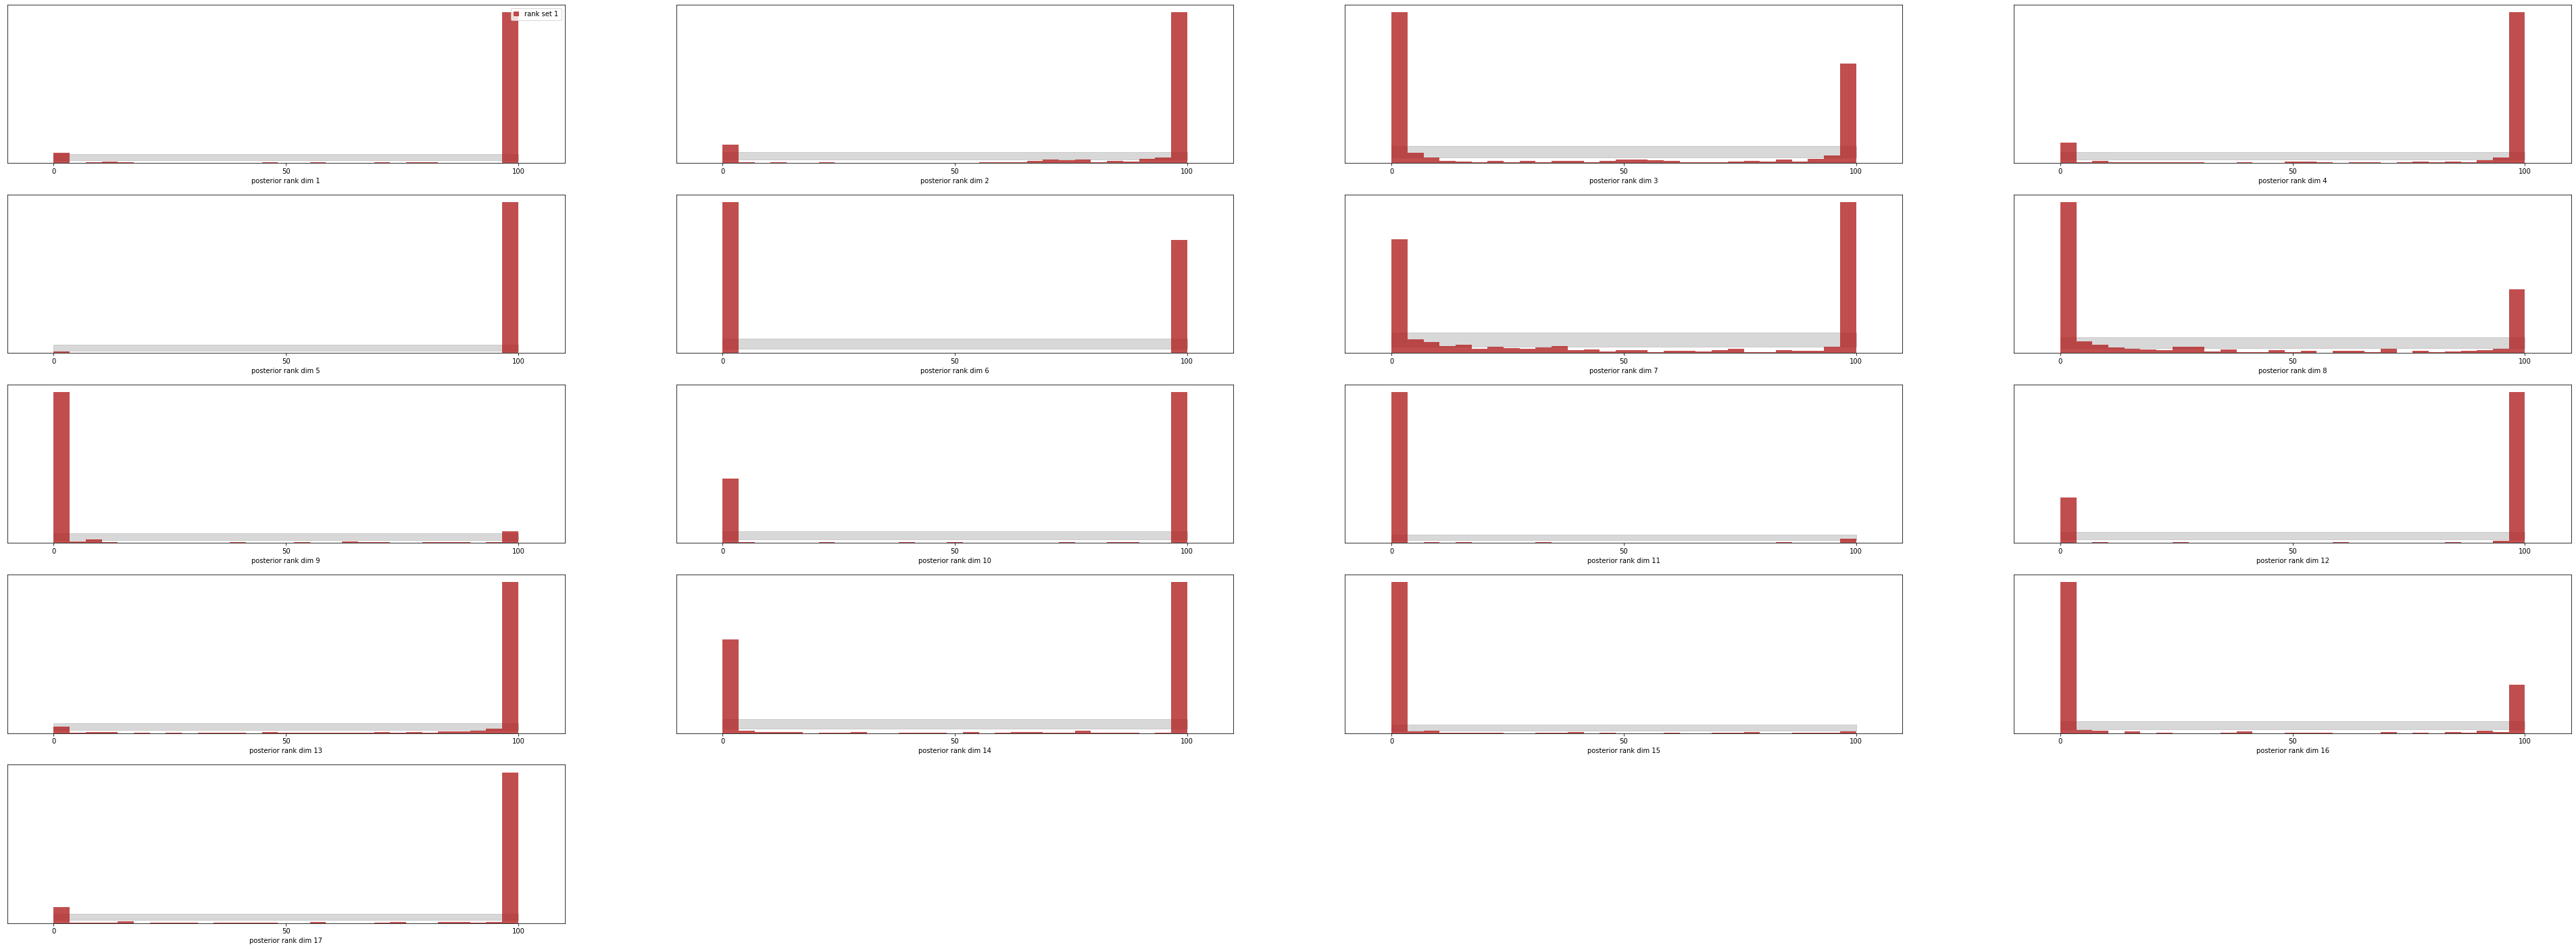

In [163]:
from sbi.analysis.plot import sbc_rank_plot

fig, ax = sbc_rank_plot(ranks=ranks,
                      num_posterior_samples=num_posterior_samples,
                      #num_bins=500,
                      plot_type="hist",
                      num_bins=None # by passing None we use a heuristic for the number of bins.
                      )


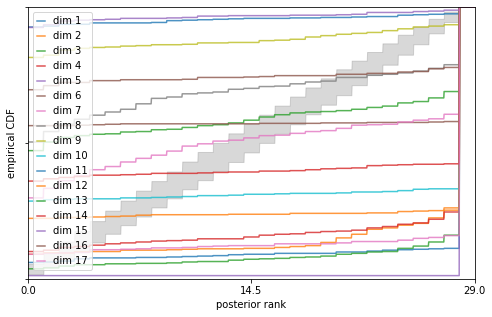

In [164]:
f, ax = sbc_rank_plot(ranks, 100, plot_type = "cdf")

## Correlation matrices

In [24]:
corr_matrix_marginal = np.corrcoef(posterior_samples.T)
fig, ax = plt.subplots(1,1, figsize=(4, 4))
im = plt.imshow(corr_matrix_marginal, clim=[-1, 1], cmap='PiYG')
_ = fig.colorbar(im)

NameError: name 'posterior_samples' is not defined

In [ ]:
condition = posterior.sample((1,))

_ = conditional_pairplot(
    density=posterior,
    condition=condition,
    limits=torch.tensor([[-2., 2.]]*3),
    figsize=(5,5)
)

## Evaluation of features

In [28]:
import matplotlib.cm as cm
import re
from mpl_toolkits.axes_grid1 import make_axes_locatable
from torch import Tensor
from typing import Tuple, List, Optional, Dict
from matplotlib.pyplot import Axes
from matplotlib.figure import Figure
from matplotlib.colors import LogNorm


In [68]:
t = obs_real_stat

t

tensor([[ 1.9490e+03,  2.7060e+03,  5.9300e+03,  2.1558e+01, -4.0164e+01,
          1.9919e+02,  1.5108e+01,  6.7586e+01,  1.9520e+02,  3.2594e+01,
          7.0213e+03,  1.2655e+01,  2.1028e+04, -1.1747e+04,  1.6931e+04,
         -2.2304e+04,  3.4816e+05,  0.0000e+00,  4.7747e+01,  7.9176e+00]],
       dtype=torch.float64)

In [74]:
# t.shape

t1 = torch.cat((t[:,:1], t[:,1+1:]), axis = 1)
print(t1)
t1.shape

tensor([[ 1.9490e+03,  5.9300e+03,  2.1558e+01, -4.0164e+01,  1.9919e+02,
          1.5108e+01,  6.7586e+01,  1.9520e+02,  3.2594e+01,  7.0213e+03,
          1.2655e+01,  2.1028e+04, -1.1747e+04,  1.6931e+04, -2.2304e+04,
          3.4816e+05,  0.0000e+00,  4.7747e+01,  7.9176e+00]],
       dtype=torch.float64)


torch.Size([1, 19])

In [54]:
posterior.set_default_x(obs_real_stat)

DirectPosterior(
               method_family=snpe,
               net=<a Flow, see `.net` for details>,
               prior=BoxUniform(Uniform(low: torch.Size([17]), high: torch.Size([17])), 1),
               x_shape=torch.Size([1, 20]))
               

In [55]:
thetas = posterior.sample((10000,))
thetas.shape

Drawing 10000 posterior samples:   0%|          | 0/10000 [00:00<?, ?it/s]

torch.Size([10000, 17])

In [79]:

for i in range(20):
    x = calculate_summary_stats_temporal(x_without)
    #leaving one summary statistic out
    x_c = torch.cat((x[:,:i], x[:,i+1:]), axis = 1)
    print(x_c.shape)
    print('t shape', t.shape)
    print(torch.cat((t[:i], t[i+1:]), axis = 0).shape)
    inf = SNPE(prior=prior, density_estimator = 'nsf')
    inf = inf.append_simulations(thetas, x_c)
    density_estimator = inf.train()
    posterior1 = inf.build_posterior(density_estimator)
    globals()['samples_%s' % i] = posterior1.sample((num_samples,), x=torch.cat((t[:,:i], t[:,i+1:]), axis = 1))


torch.Size([10000, 19])
t shape torch.Size([1, 20])
torch.Size([0, 20])
Neural network successfully converged after 32 epochs.


Drawing 100 posterior samples:   0%|          | 0/100 [00:00<?, ?it/s]

torch.Size([10000, 19])
t shape torch.Size([1, 20])
torch.Size([1, 20])
Neural network successfully converged after 34 epochs.


Drawing 100 posterior samples:   0%|          | 0/100 [00:00<?, ?it/s]

torch.Size([10000, 19])
t shape torch.Size([1, 20])
torch.Size([1, 20])
Neural network successfully converged after 32 epochs.


Drawing 100 posterior samples:   0%|          | 0/100 [00:00<?, ?it/s]

torch.Size([10000, 19])
t shape torch.Size([1, 20])
torch.Size([1, 20])
Neural network successfully converged after 30 epochs.


Drawing 100 posterior samples:   0%|          | 0/100 [00:00<?, ?it/s]

torch.Size([10000, 19])
t shape torch.Size([1, 20])
torch.Size([1, 20])
Neural network successfully converged after 29 epochs.


Drawing 100 posterior samples:   0%|          | 0/100 [00:00<?, ?it/s]

torch.Size([10000, 19])
t shape torch.Size([1, 20])
torch.Size([1, 20])
Neural network successfully converged after 31 epochs.


Drawing 100 posterior samples:   0%|          | 0/100 [00:00<?, ?it/s]

torch.Size([10000, 19])
t shape torch.Size([1, 20])
torch.Size([1, 20])
Neural network successfully converged after 32 epochs.


Drawing 100 posterior samples:   0%|          | 0/100 [00:00<?, ?it/s]

torch.Size([10000, 19])
t shape torch.Size([1, 20])
torch.Size([1, 20])
Neural network successfully converged after 28 epochs.


Drawing 100 posterior samples:   0%|          | 0/100 [00:00<?, ?it/s]

torch.Size([10000, 19])
t shape torch.Size([1, 20])
torch.Size([1, 20])
Neural network successfully converged after 31 epochs.


Drawing 100 posterior samples:   0%|          | 0/100 [00:00<?, ?it/s]

torch.Size([10000, 19])
t shape torch.Size([1, 20])
torch.Size([1, 20])
Neural network successfully converged after 32 epochs.


Drawing 100 posterior samples:   0%|          | 0/100 [00:00<?, ?it/s]

torch.Size([10000, 19])
t shape torch.Size([1, 20])
torch.Size([1, 20])
Neural network successfully converged after 31 epochs.


Drawing 100 posterior samples:   0%|          | 0/100 [00:00<?, ?it/s]

torch.Size([10000, 19])
t shape torch.Size([1, 20])
torch.Size([1, 20])
Neural network successfully converged after 31 epochs.


Drawing 100 posterior samples:   0%|          | 0/100 [00:00<?, ?it/s]

torch.Size([10000, 19])
t shape torch.Size([1, 20])
torch.Size([1, 20])
Neural network successfully converged after 28 epochs.


Drawing 100 posterior samples:   0%|          | 0/100 [00:00<?, ?it/s]

torch.Size([10000, 19])
t shape torch.Size([1, 20])
torch.Size([1, 20])
Neural network successfully converged after 35 epochs.


Drawing 100 posterior samples:   0%|          | 0/100 [00:00<?, ?it/s]

torch.Size([10000, 19])
t shape torch.Size([1, 20])
torch.Size([1, 20])
Neural network successfully converged after 31 epochs.


Drawing 100 posterior samples:   0%|          | 0/100 [00:00<?, ?it/s]

torch.Size([10000, 19])
t shape torch.Size([1, 20])
torch.Size([1, 20])
Neural network successfully converged after 31 epochs.


Drawing 100 posterior samples:   0%|          | 0/100 [00:00<?, ?it/s]

torch.Size([10000, 19])
t shape torch.Size([1, 20])
torch.Size([1, 20])
Neural network successfully converged after 34 epochs.


Drawing 100 posterior samples:   0%|          | 0/100 [00:00<?, ?it/s]

torch.Size([10000, 19])
t shape torch.Size([1, 20])
torch.Size([1, 20])
Neural network successfully converged after 32 epochs.


Drawing 100 posterior samples:   0%|          | 0/100 [00:00<?, ?it/s]

torch.Size([10000, 19])
t shape torch.Size([1, 20])
torch.Size([1, 20])
Neural network successfully converged after 32 epochs.


Drawing 100 posterior samples:   0%|          | 0/100 [00:00<?, ?it/s]

torch.Size([10000, 19])
t shape torch.Size([1, 20])
torch.Size([1, 20])
Neural network successfully converged after 31 epochs.


Drawing 100 posterior samples:   0%|          | 0/100 [00:00<?, ?it/s]

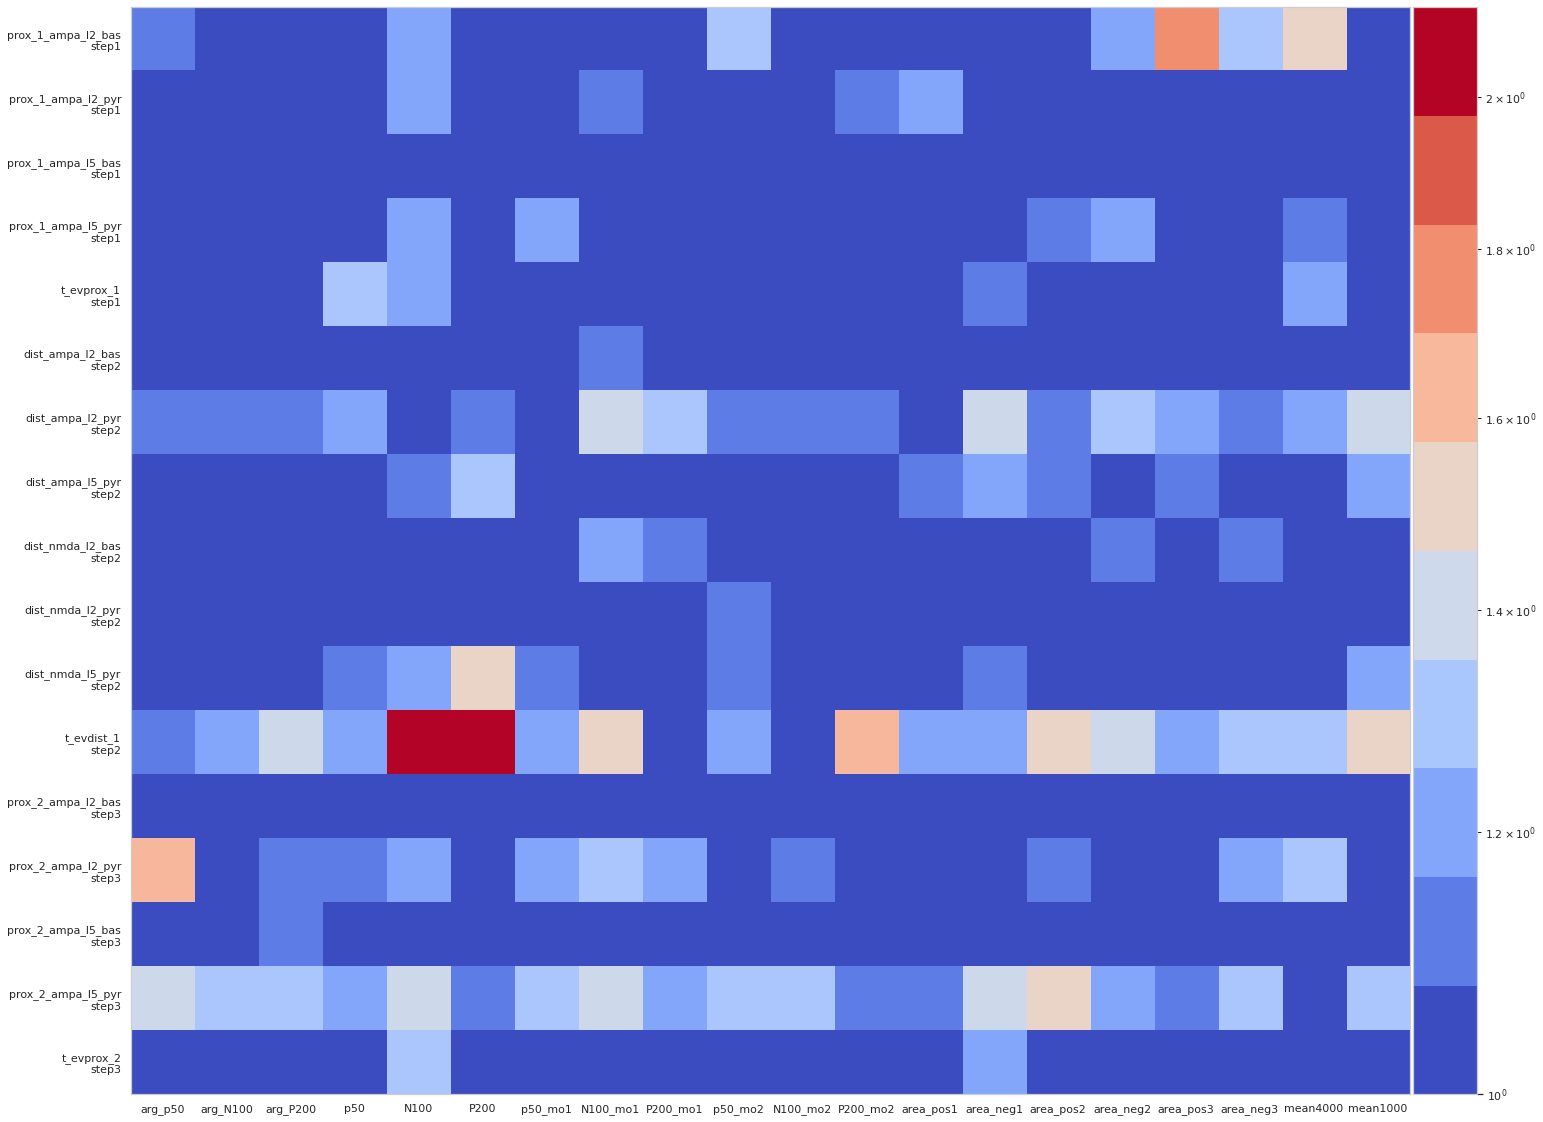

In [106]:
sum_stats_names =                 [
                    'arg_p50',
                    'arg_N100',
                    'arg_P200',
                    'p50',
                    'N100',
                    'P200',
                    'p50_mo1',
                    'N100_mo1',
                    'P200_mo1',
                    'p50_mo2',
                    'N100_mo2',
                    'P200_mo2',
                    'area_pos1',
                    'area_neg1',
                    'area_pos2',
                    'area_neg2',
                    'area_pos3',
                    'area_neg3',
                    'mean4000',
                    'mean1000'
                ]

sample_list = []
for i in range(20):
    sample_list.append(globals()['samples_%s' % i] )

    
plt.figure(figsize = (25,20))
im = plot_varchanges(sample_list, samples, xticklabels=sum_stats_names, yticklabels= parameter_names, plot_label='', batchsize=0)
plt.show(im)

In [120]:
sample_batch = []
batch_size = 5

for i in range(batch_size):

    sample_list = []
    
    for i in range(20):
        

        x = calculate_summary_stats_temporal(x_without)
        #leaving one summary statistic out
        x_c = torch.cat((x[:,:i], x[:,i+1:]), axis = 1)
        print(x_c.shape)
        print('t shape', t.shape)
        print(torch.cat((t[:i], t[i+1:]), axis = 0).shape)
        inf = SNPE(prior=prior, density_estimator = 'nsf')
        inf = inf.append_simulations(thetas, x_c)
        density_estimator = inf.train()
        posterior1 = inf.build_posterior(density_estimator)
        globals()['samples_%s' % i] = posterior1.sample((num_samples,), x=torch.cat((t[:,:i], t[:,i+1:]), axis = 1))
        
        sample_list.append(globals()['samples_%s' % i] )
        
    sample_batch.append(sample_list)

torch.Size([10000, 19])
t shape torch.Size([1, 20])
torch.Size([0, 20])
Neural network successfully converged after 32 epochs.


Drawing 100 posterior samples:   0%|          | 0/100 [00:00<?, ?it/s]

torch.Size([10000, 19])
t shape torch.Size([1, 20])
torch.Size([1, 20])
Neural network successfully converged after 33 epochs.


Drawing 100 posterior samples:   0%|          | 0/100 [00:00<?, ?it/s]

torch.Size([10000, 19])
t shape torch.Size([1, 20])
torch.Size([1, 20])
Neural network successfully converged after 31 epochs.


Drawing 100 posterior samples:   0%|          | 0/100 [00:00<?, ?it/s]

torch.Size([10000, 19])
t shape torch.Size([1, 20])
torch.Size([1, 20])
Neural network successfully converged after 33 epochs.


Drawing 100 posterior samples:   0%|          | 0/100 [00:00<?, ?it/s]

torch.Size([10000, 19])
t shape torch.Size([1, 20])
torch.Size([1, 20])
Neural network successfully converged after 36 epochs.


Drawing 100 posterior samples:   0%|          | 0/100 [00:00<?, ?it/s]

torch.Size([10000, 19])
t shape torch.Size([1, 20])
torch.Size([1, 20])
Neural network successfully converged after 32 epochs.


Drawing 100 posterior samples:   0%|          | 0/100 [00:00<?, ?it/s]

torch.Size([10000, 19])
t shape torch.Size([1, 20])
torch.Size([1, 20])
Neural network successfully converged after 31 epochs.


Drawing 100 posterior samples:   0%|          | 0/100 [00:00<?, ?it/s]

torch.Size([10000, 19])
t shape torch.Size([1, 20])
torch.Size([1, 20])
Neural network successfully converged after 32 epochs.


Drawing 100 posterior samples:   0%|          | 0/100 [00:00<?, ?it/s]

torch.Size([10000, 19])
t shape torch.Size([1, 20])
torch.Size([1, 20])
Neural network successfully converged after 34 epochs.


Drawing 100 posterior samples:   0%|          | 0/100 [00:00<?, ?it/s]

torch.Size([10000, 19])
t shape torch.Size([1, 20])
torch.Size([1, 20])
Neural network successfully converged after 32 epochs.


Drawing 100 posterior samples:   0%|          | 0/100 [00:00<?, ?it/s]

torch.Size([10000, 19])
t shape torch.Size([1, 20])
torch.Size([1, 20])
Neural network successfully converged after 34 epochs.


Drawing 100 posterior samples:   0%|          | 0/100 [00:00<?, ?it/s]

torch.Size([10000, 19])
t shape torch.Size([1, 20])
torch.Size([1, 20])
Neural network successfully converged after 31 epochs.


Drawing 100 posterior samples:   0%|          | 0/100 [00:00<?, ?it/s]

torch.Size([10000, 19])
t shape torch.Size([1, 20])
torch.Size([1, 20])
Neural network successfully converged after 32 epochs.


Drawing 100 posterior samples:   0%|          | 0/100 [00:00<?, ?it/s]

torch.Size([10000, 19])
t shape torch.Size([1, 20])
torch.Size([1, 20])
Neural network successfully converged after 31 epochs.


Drawing 100 posterior samples:   0%|          | 0/100 [00:00<?, ?it/s]

torch.Size([10000, 19])
t shape torch.Size([1, 20])
torch.Size([1, 20])
Neural network successfully converged after 31 epochs.


Drawing 100 posterior samples:   0%|          | 0/100 [00:00<?, ?it/s]

torch.Size([10000, 19])
t shape torch.Size([1, 20])
torch.Size([1, 20])
Neural network successfully converged after 33 epochs.


Drawing 100 posterior samples:   0%|          | 0/100 [00:00<?, ?it/s]

torch.Size([10000, 19])
t shape torch.Size([1, 20])
torch.Size([1, 20])
Neural network successfully converged after 31 epochs.


Drawing 100 posterior samples:   0%|          | 0/100 [00:00<?, ?it/s]

torch.Size([10000, 19])
t shape torch.Size([1, 20])
torch.Size([1, 20])
Neural network successfully converged after 33 epochs.


Drawing 100 posterior samples:   0%|          | 0/100 [00:00<?, ?it/s]

torch.Size([10000, 19])
t shape torch.Size([1, 20])
torch.Size([1, 20])
Neural network successfully converged after 31 epochs.


Drawing 100 posterior samples:   0%|          | 0/100 [00:00<?, ?it/s]

torch.Size([10000, 19])
t shape torch.Size([1, 20])
torch.Size([1, 20])
Neural network successfully converged after 31 epochs.


Drawing 100 posterior samples:   0%|          | 0/100 [00:00<?, ?it/s]

torch.Size([10000, 19])
t shape torch.Size([1, 20])
torch.Size([0, 20])
Neural network successfully converged after 34 epochs.


Drawing 100 posterior samples:   0%|          | 0/100 [00:00<?, ?it/s]

torch.Size([10000, 19])
t shape torch.Size([1, 20])
torch.Size([1, 20])
Neural network successfully converged after 37 epochs.


Drawing 100 posterior samples:   0%|          | 0/100 [00:00<?, ?it/s]

torch.Size([10000, 19])
t shape torch.Size([1, 20])
torch.Size([1, 20])
Neural network successfully converged after 31 epochs.


Drawing 100 posterior samples:   0%|          | 0/100 [00:00<?, ?it/s]

torch.Size([10000, 19])
t shape torch.Size([1, 20])
torch.Size([1, 20])
Neural network successfully converged after 35 epochs.


Drawing 100 posterior samples:   0%|          | 0/100 [00:00<?, ?it/s]

torch.Size([10000, 19])
t shape torch.Size([1, 20])
torch.Size([1, 20])
Neural network successfully converged after 29 epochs.


Drawing 100 posterior samples:   0%|          | 0/100 [00:00<?, ?it/s]

torch.Size([10000, 19])
t shape torch.Size([1, 20])
torch.Size([1, 20])
Neural network successfully converged after 32 epochs.


Drawing 100 posterior samples:   0%|          | 0/100 [00:00<?, ?it/s]

torch.Size([10000, 19])
t shape torch.Size([1, 20])
torch.Size([1, 20])
Neural network successfully converged after 34 epochs.


Drawing 100 posterior samples:   0%|          | 0/100 [00:00<?, ?it/s]

torch.Size([10000, 19])
t shape torch.Size([1, 20])
torch.Size([1, 20])
Neural network successfully converged after 33 epochs.


Drawing 100 posterior samples:   0%|          | 0/100 [00:00<?, ?it/s]

torch.Size([10000, 19])
t shape torch.Size([1, 20])
torch.Size([1, 20])
Neural network successfully converged after 32 epochs.


Drawing 100 posterior samples:   0%|          | 0/100 [00:00<?, ?it/s]

torch.Size([10000, 19])
t shape torch.Size([1, 20])
torch.Size([1, 20])
Neural network successfully converged after 33 epochs.


Drawing 100 posterior samples:   0%|          | 0/100 [00:00<?, ?it/s]

torch.Size([10000, 19])
t shape torch.Size([1, 20])
torch.Size([1, 20])
Neural network successfully converged after 35 epochs.


Drawing 100 posterior samples:   0%|          | 0/100 [00:00<?, ?it/s]

torch.Size([10000, 19])
t shape torch.Size([1, 20])
torch.Size([1, 20])
Neural network successfully converged after 30 epochs.


Drawing 100 posterior samples:   0%|          | 0/100 [00:00<?, ?it/s]

torch.Size([10000, 19])
t shape torch.Size([1, 20])
torch.Size([1, 20])
Neural network successfully converged after 31 epochs.


Drawing 100 posterior samples:   0%|          | 0/100 [00:00<?, ?it/s]

torch.Size([10000, 19])
t shape torch.Size([1, 20])
torch.Size([1, 20])
Neural network successfully converged after 32 epochs.


Drawing 100 posterior samples:   0%|          | 0/100 [00:00<?, ?it/s]

torch.Size([10000, 19])
t shape torch.Size([1, 20])
torch.Size([1, 20])
Neural network successfully converged after 28 epochs.


Drawing 100 posterior samples:   0%|          | 0/100 [00:00<?, ?it/s]

torch.Size([10000, 19])
t shape torch.Size([1, 20])
torch.Size([1, 20])
Neural network successfully converged after 30 epochs.


Drawing 100 posterior samples:   0%|          | 0/100 [00:00<?, ?it/s]

torch.Size([10000, 19])
t shape torch.Size([1, 20])
torch.Size([1, 20])
Neural network successfully converged after 30 epochs.


Drawing 100 posterior samples:   0%|          | 0/100 [00:00<?, ?it/s]

torch.Size([10000, 19])
t shape torch.Size([1, 20])
torch.Size([1, 20])
Neural network successfully converged after 32 epochs.


Drawing 100 posterior samples:   0%|          | 0/100 [00:00<?, ?it/s]

torch.Size([10000, 19])
t shape torch.Size([1, 20])
torch.Size([1, 20])
Neural network successfully converged after 33 epochs.


Drawing 100 posterior samples:   0%|          | 0/100 [00:00<?, ?it/s]

torch.Size([10000, 19])
t shape torch.Size([1, 20])
torch.Size([1, 20])
Neural network successfully converged after 32 epochs.


Drawing 100 posterior samples:   0%|          | 0/100 [00:00<?, ?it/s]

torch.Size([10000, 19])
t shape torch.Size([1, 20])
torch.Size([0, 20])
Neural network successfully converged after 34 epochs.


Drawing 100 posterior samples:   0%|          | 0/100 [00:00<?, ?it/s]

torch.Size([10000, 19])
t shape torch.Size([1, 20])
torch.Size([1, 20])
Neural network successfully converged after 32 epochs.


Drawing 100 posterior samples:   0%|          | 0/100 [00:00<?, ?it/s]

torch.Size([10000, 19])
t shape torch.Size([1, 20])
torch.Size([1, 20])
Neural network successfully converged after 29 epochs.


Drawing 100 posterior samples:   0%|          | 0/100 [00:00<?, ?it/s]

torch.Size([10000, 19])
t shape torch.Size([1, 20])
torch.Size([1, 20])
Neural network successfully converged after 32 epochs.


Drawing 100 posterior samples:   0%|          | 0/100 [00:00<?, ?it/s]

torch.Size([10000, 19])
t shape torch.Size([1, 20])
torch.Size([1, 20])
Neural network successfully converged after 31 epochs.


Drawing 100 posterior samples:   0%|          | 0/100 [00:00<?, ?it/s]

torch.Size([10000, 19])
t shape torch.Size([1, 20])
torch.Size([1, 20])
Neural network successfully converged after 31 epochs.


Drawing 100 posterior samples:   0%|          | 0/100 [00:00<?, ?it/s]

torch.Size([10000, 19])
t shape torch.Size([1, 20])
torch.Size([1, 20])
Neural network successfully converged after 35 epochs.


Drawing 100 posterior samples:   0%|          | 0/100 [00:00<?, ?it/s]

torch.Size([10000, 19])
t shape torch.Size([1, 20])
torch.Size([1, 20])
Neural network successfully converged after 28 epochs.


Drawing 100 posterior samples:   0%|          | 0/100 [00:00<?, ?it/s]

torch.Size([10000, 19])
t shape torch.Size([1, 20])
torch.Size([1, 20])
Neural network successfully converged after 32 epochs.


Drawing 100 posterior samples:   0%|          | 0/100 [00:00<?, ?it/s]

torch.Size([10000, 19])
t shape torch.Size([1, 20])
torch.Size([1, 20])
Neural network successfully converged after 33 epochs.


Drawing 100 posterior samples:   0%|          | 0/100 [00:00<?, ?it/s]

torch.Size([10000, 19])
t shape torch.Size([1, 20])
torch.Size([1, 20])
Neural network successfully converged after 33 epochs.


Drawing 100 posterior samples:   0%|          | 0/100 [00:00<?, ?it/s]

torch.Size([10000, 19])
t shape torch.Size([1, 20])
torch.Size([1, 20])
Neural network successfully converged after 32 epochs.


Drawing 100 posterior samples:   0%|          | 0/100 [00:00<?, ?it/s]

torch.Size([10000, 19])
t shape torch.Size([1, 20])
torch.Size([1, 20])
Neural network successfully converged after 32 epochs.


Drawing 100 posterior samples:   0%|          | 0/100 [00:00<?, ?it/s]

torch.Size([10000, 19])
t shape torch.Size([1, 20])
torch.Size([1, 20])
Neural network successfully converged after 34 epochs.


Drawing 100 posterior samples:   0%|          | 0/100 [00:00<?, ?it/s]

torch.Size([10000, 19])
t shape torch.Size([1, 20])
torch.Size([1, 20])
Neural network successfully converged after 29 epochs.


Drawing 100 posterior samples:   0%|          | 0/100 [00:00<?, ?it/s]

torch.Size([10000, 19])
t shape torch.Size([1, 20])
torch.Size([1, 20])
Neural network successfully converged after 32 epochs.


Drawing 100 posterior samples:   0%|          | 0/100 [00:00<?, ?it/s]

torch.Size([10000, 19])
t shape torch.Size([1, 20])
torch.Size([1, 20])
Neural network successfully converged after 31 epochs.


Drawing 100 posterior samples:   0%|          | 0/100 [00:00<?, ?it/s]

torch.Size([10000, 19])
t shape torch.Size([1, 20])
torch.Size([1, 20])
Neural network successfully converged after 36 epochs.


Drawing 100 posterior samples:   0%|          | 0/100 [00:00<?, ?it/s]

torch.Size([10000, 19])
t shape torch.Size([1, 20])
torch.Size([1, 20])
Neural network successfully converged after 33 epochs.


Drawing 100 posterior samples:   0%|          | 0/100 [00:00<?, ?it/s]

torch.Size([10000, 19])
t shape torch.Size([1, 20])
torch.Size([1, 20])
Neural network successfully converged after 29 epochs.


Drawing 100 posterior samples:   0%|          | 0/100 [00:00<?, ?it/s]

torch.Size([10000, 19])
t shape torch.Size([1, 20])
torch.Size([0, 20])
Neural network successfully converged after 33 epochs.


Drawing 100 posterior samples:   0%|          | 0/100 [00:00<?, ?it/s]

torch.Size([10000, 19])
t shape torch.Size([1, 20])
torch.Size([1, 20])
Neural network successfully converged after 30 epochs.


Drawing 100 posterior samples:   0%|          | 0/100 [00:00<?, ?it/s]

torch.Size([10000, 19])
t shape torch.Size([1, 20])
torch.Size([1, 20])
Neural network successfully converged after 32 epochs.


Drawing 100 posterior samples:   0%|          | 0/100 [00:00<?, ?it/s]

torch.Size([10000, 19])
t shape torch.Size([1, 20])
torch.Size([1, 20])
Neural network successfully converged after 33 epochs.


Drawing 100 posterior samples:   0%|          | 0/100 [00:00<?, ?it/s]

torch.Size([10000, 19])
t shape torch.Size([1, 20])
torch.Size([1, 20])
Neural network successfully converged after 31 epochs.


Drawing 100 posterior samples:   0%|          | 0/100 [00:00<?, ?it/s]

torch.Size([10000, 19])
t shape torch.Size([1, 20])
torch.Size([1, 20])
Neural network successfully converged after 31 epochs.


Drawing 100 posterior samples:   0%|          | 0/100 [00:00<?, ?it/s]

torch.Size([10000, 19])
t shape torch.Size([1, 20])
torch.Size([1, 20])
Neural network successfully converged after 32 epochs.


Drawing 100 posterior samples:   0%|          | 0/100 [00:00<?, ?it/s]

torch.Size([10000, 19])
t shape torch.Size([1, 20])
torch.Size([1, 20])
Neural network successfully converged after 33 epochs.


Drawing 100 posterior samples:   0%|          | 0/100 [00:00<?, ?it/s]

torch.Size([10000, 19])
t shape torch.Size([1, 20])
torch.Size([1, 20])
Neural network successfully converged after 29 epochs.


Drawing 100 posterior samples:   0%|          | 0/100 [00:00<?, ?it/s]

torch.Size([10000, 19])
t shape torch.Size([1, 20])
torch.Size([1, 20])
Neural network successfully converged after 30 epochs.


Drawing 100 posterior samples:   0%|          | 0/100 [00:00<?, ?it/s]

torch.Size([10000, 19])
t shape torch.Size([1, 20])
torch.Size([1, 20])
Neural network successfully converged after 31 epochs.


Drawing 100 posterior samples:   0%|          | 0/100 [00:00<?, ?it/s]

torch.Size([10000, 19])
t shape torch.Size([1, 20])
torch.Size([1, 20])
Neural network successfully converged after 31 epochs.


Drawing 100 posterior samples:   0%|          | 0/100 [00:00<?, ?it/s]

torch.Size([10000, 19])
t shape torch.Size([1, 20])
torch.Size([1, 20])
Neural network successfully converged after 30 epochs.


Drawing 100 posterior samples:   0%|          | 0/100 [00:00<?, ?it/s]

torch.Size([10000, 19])
t shape torch.Size([1, 20])
torch.Size([1, 20])
Neural network successfully converged after 32 epochs.


Drawing 100 posterior samples:   0%|          | 0/100 [00:00<?, ?it/s]

torch.Size([10000, 19])
t shape torch.Size([1, 20])
torch.Size([1, 20])
Neural network successfully converged after 34 epochs.


Drawing 100 posterior samples:   0%|          | 0/100 [00:00<?, ?it/s]

torch.Size([10000, 19])
t shape torch.Size([1, 20])
torch.Size([1, 20])
Neural network successfully converged after 34 epochs.


Drawing 100 posterior samples:   0%|          | 0/100 [00:00<?, ?it/s]

torch.Size([10000, 19])
t shape torch.Size([1, 20])
torch.Size([1, 20])
Neural network successfully converged after 30 epochs.


Drawing 100 posterior samples:   0%|          | 0/100 [00:00<?, ?it/s]

torch.Size([10000, 19])
t shape torch.Size([1, 20])
torch.Size([1, 20])
Neural network successfully converged after 33 epochs.


Drawing 100 posterior samples:   0%|          | 0/100 [00:00<?, ?it/s]

torch.Size([10000, 19])
t shape torch.Size([1, 20])
torch.Size([1, 20])
Neural network successfully converged after 33 epochs.


Drawing 100 posterior samples:   0%|          | 0/100 [00:00<?, ?it/s]

torch.Size([10000, 19])
t shape torch.Size([1, 20])
torch.Size([1, 20])
Neural network successfully converged after 31 epochs.


Drawing 100 posterior samples:   0%|          | 0/100 [00:00<?, ?it/s]

torch.Size([10000, 19])
t shape torch.Size([1, 20])
torch.Size([0, 20])
Neural network successfully converged after 33 epochs.


Drawing 100 posterior samples:   0%|          | 0/100 [00:00<?, ?it/s]

torch.Size([10000, 19])
t shape torch.Size([1, 20])
torch.Size([1, 20])
Neural network successfully converged after 30 epochs.


Drawing 100 posterior samples:   0%|          | 0/100 [00:00<?, ?it/s]

torch.Size([10000, 19])
t shape torch.Size([1, 20])
torch.Size([1, 20])
Neural network successfully converged after 34 epochs.


Drawing 100 posterior samples:   0%|          | 0/100 [00:00<?, ?it/s]

torch.Size([10000, 19])
t shape torch.Size([1, 20])
torch.Size([1, 20])
Neural network successfully converged after 30 epochs.


Drawing 100 posterior samples:   0%|          | 0/100 [00:00<?, ?it/s]

torch.Size([10000, 19])
t shape torch.Size([1, 20])
torch.Size([1, 20])
Neural network successfully converged after 29 epochs.


Drawing 100 posterior samples:   0%|          | 0/100 [00:00<?, ?it/s]

torch.Size([10000, 19])
t shape torch.Size([1, 20])
torch.Size([1, 20])
Neural network successfully converged after 37 epochs.


Drawing 100 posterior samples:   0%|          | 0/100 [00:00<?, ?it/s]

torch.Size([10000, 19])
t shape torch.Size([1, 20])
torch.Size([1, 20])
Neural network successfully converged after 32 epochs.


Drawing 100 posterior samples:   0%|          | 0/100 [00:00<?, ?it/s]

torch.Size([10000, 19])
t shape torch.Size([1, 20])
torch.Size([1, 20])
Neural network successfully converged after 33 epochs.


Drawing 100 posterior samples:   0%|          | 0/100 [00:00<?, ?it/s]

torch.Size([10000, 19])
t shape torch.Size([1, 20])
torch.Size([1, 20])
Neural network successfully converged after 33 epochs.


Drawing 100 posterior samples:   0%|          | 0/100 [00:00<?, ?it/s]

torch.Size([10000, 19])
t shape torch.Size([1, 20])
torch.Size([1, 20])
Neural network successfully converged after 31 epochs.


Drawing 100 posterior samples:   0%|          | 0/100 [00:00<?, ?it/s]

torch.Size([10000, 19])
t shape torch.Size([1, 20])
torch.Size([1, 20])
Neural network successfully converged after 34 epochs.


Drawing 100 posterior samples:   0%|          | 0/100 [00:00<?, ?it/s]

torch.Size([10000, 19])
t shape torch.Size([1, 20])
torch.Size([1, 20])
Neural network successfully converged after 29 epochs.


Drawing 100 posterior samples:   0%|          | 0/100 [00:00<?, ?it/s]

torch.Size([10000, 19])
t shape torch.Size([1, 20])
torch.Size([1, 20])
Neural network successfully converged after 33 epochs.


Drawing 100 posterior samples:   0%|          | 0/100 [00:00<?, ?it/s]

torch.Size([10000, 19])
t shape torch.Size([1, 20])
torch.Size([1, 20])
Neural network successfully converged after 31 epochs.


Drawing 100 posterior samples:   0%|          | 0/100 [00:00<?, ?it/s]

torch.Size([10000, 19])
t shape torch.Size([1, 20])
torch.Size([1, 20])
Neural network successfully converged after 32 epochs.


Drawing 100 posterior samples:   0%|          | 0/100 [00:00<?, ?it/s]

torch.Size([10000, 19])
t shape torch.Size([1, 20])
torch.Size([1, 20])
Neural network successfully converged after 37 epochs.


Drawing 100 posterior samples:   0%|          | 0/100 [00:00<?, ?it/s]

torch.Size([10000, 19])
t shape torch.Size([1, 20])
torch.Size([1, 20])


KeyboardInterrupt: 

In [119]:
sample_batch

[]

/home/ubuntu/miniconda3/envs/sbi_env/lib/python3.7/site-packages/ipykernel_launcher.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  


Text(0, 0.5, 'voltage ($\\mu V$)')

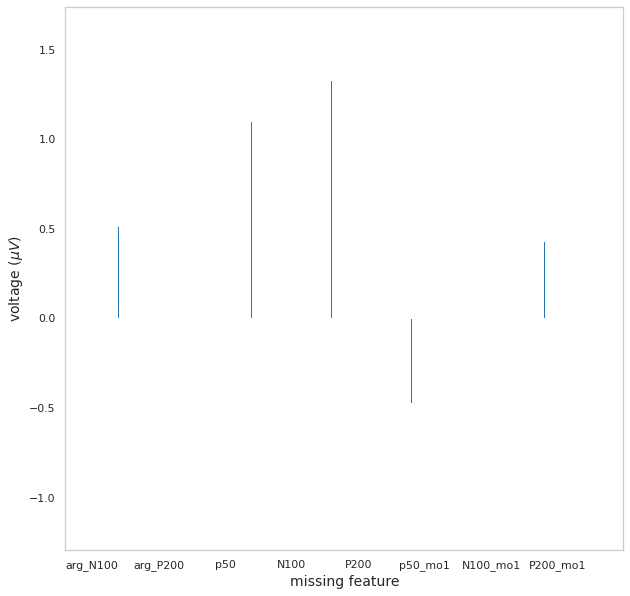

In [117]:
fig, axes = plt.subplots(1, 1, figsize=(10, 10), sharex=True)


plot_KLs(sample_list,
        samples,
        idx=0,
        batchsize=0,
         kind='bar',
        agg_with='mean'
    )


axes.set_xlabel("missing feature", size=14)
axes.set_xticklabels(sum_stats_names)
ax.tick_params(axis="both", which="major", labelsize=12)
ylabel = ax.get_ylabel()
axes.set_ylabel(ylabel, size=14)


In [16]:
#s_x_prior_stat = calculate_summary_stats_temporal(s_x_prior)
#s_x_stat = calculate_summary_stats_temporal(s_x)
posterior.set_default_x(obs_real_stat)
    
s_x_prior_stat = prior.sample((1000,))

s_x_stat = posterior.sample((1000,))

Drawing 1000 posterior samples:   0%|          | 0/1000 [00:00<?, ?it/s]

In [17]:
s_x_prior_stat.shape

torch.Size([1000, 25])

In [20]:
obs_real_stat[0][1]

tensor(2856., dtype=torch.float64)

In [ ]:
import matplotlib.gridspec as gridspec

sum_stats_names =                  [
                    'arg_p50',
                    'arg_N100',
                    'arg_P200',
                    'p50',
                    'N100',
                    'P200',
                    'p50_moment1',
                    'N100_moment1',
                    'P200_moment1',
                    'p50_moment2',
                    'N100_moment2',
                    'P200_moment2',
                    'area_pos1',
                    'area_neg1',
                    'area_pos2',
                    'area_neg2',
                    'area_pos3',
                    'area_neg3',
                    'mean4000',
                    'mean1000'
                ]

fig = plt.figure(figsize=(10,5*s_x_prior_stat.shape[1]), tight_layout=True)

gs = gridspec.GridSpec(nrows=len(sum_stats_names), ncols=1)



#fig.suptitle('Summary stats histogram from posterior predictions.', y=0.2, fontsize=16)


for i in range(len(sum_stats_names)):

    globals()['ax%s' % i] = fig.add_subplot(gs[i])

    globals()['sum_stats%s' % i] = []
    globals()['x%s' % i] = []

    for j in range(s_x_prior_stat.shape[0]):
        globals()['sum_stats%s' % i].append(s_x_stat[j][i])
        globals()['x%s' % i].append(s_x_prior_stat[j][i])

    sum_stat = globals()['sum_stats%s' % i]
    
    
    ##define bins such that we get an equal number of bins at the end
    
    binsteps = np.abs(max(sum_stat)-min(sum_stat))*0.03 + 0.001
    
   
    binrange = np.arange(min(sum_stat), max(sum_stat) + binsteps, binsteps)
    
   
    
    globals()['ax%s' % i].hist(globals()['sum_stats%s' % i],  density=True, bins = binrange,  facecolor='g', alpha=0.75, histtype='barstacked', label='from posterior')
    globals()['ax%s' % i].hist(globals()['x%s' % i],  density=True, bins = binrange,   facecolor='b', alpha=0.5, histtype='barstacked', label='from proposal/prior')
    
  
    globals()['ax%s' % i].set_title('Histogram of summary stat "{}" '.format(sum_stats_names[i]), pad=20)
    #ax0.set(ylim=(-500, 7000))

    globals()['ax%s' % i].axvline(obs_real_stat[0][i].detach().numpy(), color='red', label='ground truth')
    globals()['ax%s' % i].legend(loc='upper right')